# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import numpy as np
from scipy import stats
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from migration_metrics_functions import *

# Load datasets

In [2]:
tracks_dataset = {}

# Load datasets
manual_tracks_df_2024_09_09 = pd.read_csv(r'D:\David\THESIS\tracks_dataframes\manual_tracks_df_2024_09_09_FoxA2_tdTom_c211to300_BmpAct_day2To3.csv')
btrack_tracks_df_2024_09_09 = pd.read_csv(r'D:\David\THESIS\tracks_dataframes\tracks_df_2024_09_09_FoxA2_tdTom_c211to300_BmpAct_day2To3.csv')
btrack_tracks_df_2024_07_21 = pd.read_csv(r'D:\David\THESIS\tracks_dataframes\tracks_df_2024_07_21_FOXA2_1to100_TdTom_c21_day2To3.csv')
btrack_tracks_df_2025_01_22_2DFACS = pd.read_csv(r'D:\David\THESIS\tracks_dataframes\centers_segmentation_tracks_df_2025_01_22_2DFACS_FOXA2positive_lateday2.csv')
manual_tracks_df_2025_01_22_2DFACS = pd.read_csv(r'D:\David\THESIS\tracks_dataframes\manual_tracks_df_2025_01_22_2DFACS_FOXA2positive_lateday2.csv')
btrack_tracks_df_2025_09_30_NIH3T3_migration_on_laminin = pd.read_csv(r'D:\David\THESIS\tracks_dataframes\tracks_df_2025_09_30_NIH3T3_migration_on_laminin.csv')

# Store datasets in a dictionary
tracks_dataset['manual_tracks_df_2024_09_09'] = manual_tracks_df_2024_09_09
tracks_dataset['btrack_tracks_df_2024_09_09'] = btrack_tracks_df_2024_09_09
tracks_dataset['btrack_tracks_df_2024_07_21'] = btrack_tracks_df_2024_07_21
tracks_dataset['btrack_tracks_df_2025_01_22_2DFACS'] = btrack_tracks_df_2025_01_22_2DFACS
tracks_dataset['manual_tracks_df_2025_01_22_2DFACS'] = manual_tracks_df_2025_01_22_2DFACS
tracks_dataset['btrack_tracks_df_2025_09_30_NIH3T3_migration_on_laminin'] = btrack_tracks_df_2025_09_30_NIH3T3_migration_on_laminin

# Get 4 distinct colors from Seaborn's Set2 palette
colors = sns.color_palette("colorblind", 4)

# Assign colors to each dataset
color_map = {
    "3D Manual Tracking": colors[1],
    "3D BTrack Tracking": colors[3], 
    "2D BTrack Tracking": colors[2], 
    "Simulation": colors[0],
}

# Add metadata about each dataset
dataset_metadata = {
    'manual_tracks_df_2024_09_09': {'interval_minutes': 5, 'pixel_to_micron': 0.32, 'pattern': True, 'color': 'blue', 'short_name': 'Cells in Micropattern Manual Tracking', 'nucleus_length_microns': 14.6},
    'btrack_tracks_df_2024_09_09': {'interval_minutes': 5, 'pixel_to_micron': 0.32, 'pattern': True, 'color': color_map['3D BTrack Tracking'], 'short_name': 'Cells in Micropattern', 'nucleus_length_microns': 14.6},
    'btrack_tracks_df_2024_07_21': {'interval_minutes': 12, 'pixel_to_micron': 0.32, 'pattern': True, 'color': 'green', 'short_name': 'Cells in Micropattern, 07/21'},
    'btrack_tracks_df_2025_01_22_2DFACS': {'interval_minutes': 5, 'pixel_to_micron': 0.32, 'pattern': False, 'color': color_map['2D BTrack Tracking'], 'short_name': 'Cells in 2D', 'nucleus_length_microns': 21.86},
    'manual_tracks_df_2025_01_22_2DFACS': {'interval_minutes': 5, 'pixel_to_micron': 0.32, 'pattern': False, 'color': 'purple', 'short_name': 'Cells in 2D Manual Tracking', 'nucleus_length_microns': 21.86},
    'btrack_tracks_df_2025_09_30_NIH3T3_migration_on_laminin': {'interval_minutes': 5, 'pixel_to_micron': 0.32, 'pattern': False, 'color': 'grey', 'short_name': 'NIH-3T3 Cells in 2D', 'nucleus_length_microns': 16.28},
}

In [3]:
tracks_dataset['manual_tracks_df_2024_09_09'].head()

file  ID                           track_id   t  \
0  2024_09_09_manual_tracks_01.csv   1  2024_09_09_manual_tracks_01.csv_1   5   
1  2024_09_09_manual_tracks_01.csv   1  2024_09_09_manual_tracks_01.csv_1  10   
2  2024_09_09_manual_tracks_01.csv   1  2024_09_09_manual_tracks_01.csv_1  15   
3  2024_09_09_manual_tracks_01.csv   1  2024_09_09_manual_tracks_01.csv_1  20   
4  2024_09_09_manual_tracks_01.csv   1  2024_09_09_manual_tracks_01.csv_1  25   

   normalized_time  x_pixels  y_pixels  x_microns  y_microns  \
0                0      1436      1074     459.52     343.68   
1                5      1450      1078     464.00     344.96   
2               10      1456      1078     465.92     344.96   
3               15      1452      1062     464.64     339.84   
4               20      1444      1068     462.08     341.76   

   mask_center_x_pixels  mask_center_y_pixels  mask_center_x_microns  \
0                1002.0                1868.0                 320.64   
1                1002.0                1868.0                 320.64   
2                1002.0                1868.0                 320.64   
3                1002.0                1868.0                 320.64   
4                1002.0                1868.0                 320.64   

   mask_center_y_microns  distance_from_edge_pixels  \
0                 597.76                 231.000000   
1                 597.76                 217.000000   
2                 597.76                 211.000000   
3                 597.76                 214.841802   
4                 597.76                 223.000000   

   distance_from_edge_microns  
0                   73.920000  
1                   69.440000  
2                   67.520000  
3                   68.749377  
4                   71.360000

# Preprocess

In [4]:
min_track_length = 50 # Minimum number of steps in a track to be included

for name, df in tracks_dataset.items():
    # Get metadata for this dataset
    meta = dataset_metadata.get(name, {})
    step_duration_min = meta.get('interval_minutes', 1)
    is_patterned = meta.get('pattern', False)

    # Only process if required columns exist
    if 'track_id' in df.columns and 'x_microns' in df.columns and 'y_microns' in df.columns:
        print(f"Processing dataset: {name}")
        df = df.sort_values(['track_id', df.columns[df.columns.str.contains('step|t')][0]]).copy()
        # Use 'step' if present, otherwise fallback to 't'
        step_col = 'step' if 'step' in df.columns else 't'

        # Add step column if not present
        df['step'] = df.groupby('track_id').cumcount()
        
        # Filter out tracks with less than 5 steps
        df = df.groupby('track_id').filter(lambda x: len(x) >= min_track_length).copy()

        # Displacements
        df['dx'] = df.groupby('track_id')['x_microns'].diff().fillna(0)
        df['dy'] = df.groupby('track_id')['y_microns'].diff().fillna(0)
        df['dt'] = df.groupby('track_id')['t'].diff().fillna(0)

        # Velocity
        valid_dt_mask = df['dt'] == step_duration_min
        df['v'] = np.nan
        df.loc[valid_dt_mask, 'v'] = ((df.loc[valid_dt_mask, 'dx']**2 + df.loc[valid_dt_mask, 'dy']**2)**0.5) / step_duration_min
        df['v'] = df['v'].replace([np.inf, -np.inf], np.nan)
        df['v_micron_per_hour'] = df['v'] * 60
        df['v_x'] = df['dx'] / df['dt'].replace(0, 1)
        df['v_y'] = df['dy'] / df['dt'].replace(0, 1)

        # Movement angles
        df['angle_relative_to_common_axis'] = np.arctan2(df['dy'], df['dx'])

        # Previous positions
        df['prev_x_microns'] = df.groupby('track_id')['x_microns'].shift()
        df['prev_y_microns'] = df.groupby('track_id')['y_microns'].shift()

        # Primary axis
        primary_axes = df.groupby('track_id').apply(compute_primary_axis).rename('primary_axis')
        df = df.merge(primary_axes, on='track_id')

        # Angles relative to primary axis
        df['angle_relative_to_primary_axis'] = df.apply(calculate_relative_angles, axis=1)

        # Angle to center (only for patterned dishes)
        if is_patterned and 'mask_center_x_microns' in df.columns and 'mask_center_y_microns' in df.columns:
            df['angle_to_center'] = df.apply(calculate_angle_to_center, axis=1)
        else:
            df['angle_to_center'] = np.nan

        # Save back to dictionary
        tracks_dataset[name] = df

Processing dataset: manual_tracks_df_2024_09_09


C:\Users\davidzi\AppData\Local\Temp\ipykernel_29844\3570868292.py:44: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  primary_axes = df.groupby('track_id').apply(compute_primary_axis).rename('primary_axis')
d:\David\THESIS\code\migration_metrics_functions.py:74: RuntimeWarning: invalid value encountered in scalar divide
  cos_theta = dot_product / (magnitude_r * magnitude_v)


Processing dataset: btrack_tracks_df_2024_09_09


C:\Users\davidzi\AppData\Local\Temp\ipykernel_29844\3570868292.py:44: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  primary_axes = df.groupby('track_id').apply(compute_primary_axis).rename('primary_axis')
d:\David\THESIS\code\migration_metrics_functions.py:74: RuntimeWarning: invalid value encountered in scalar divide
  cos_theta = dot_product / (magnitude_r * magnitude_v)


Processing dataset: btrack_tracks_df_2024_07_21


C:\Users\davidzi\AppData\Local\Temp\ipykernel_29844\3570868292.py:44: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  primary_axes = df.groupby('track_id').apply(compute_primary_axis).rename('primary_axis')
d:\David\THESIS\code\migration_metrics_functions.py:74: RuntimeWarning: invalid value encountered in scalar divide
  cos_theta = dot_product / (magnitude_r * magnitude_v)


Processing dataset: btrack_tracks_df_2025_01_22_2DFACS


C:\Users\davidzi\AppData\Local\Temp\ipykernel_29844\3570868292.py:44: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  primary_axes = df.groupby('track_id').apply(compute_primary_axis).rename('primary_axis')


Processing dataset: manual_tracks_df_2025_01_22_2DFACS
Processing dataset: btrack_tracks_df_2025_09_30_NIH3T3_migration_on_laminin


C:\Users\davidzi\AppData\Local\Temp\ipykernel_29844\3570868292.py:44: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  primary_axes = df.groupby('track_id').apply(compute_primary_axis).rename('primary_axis')
C:\Users\davidzi\AppData\Local\Temp\ipykernel_29844\3570868292.py:44: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  primary_axes = df.groupby('track_id').apply(compute_primary_axis).rename('primary_axis')


In [5]:
tracks_dataset['manual_tracks_df_2024_09_09'].groupby('file').size()

file
2024_09_09_manual_tracks_01.csv    1735
2024_09_09_manual_tracks_02.csv    1937
2024_09_09_manual_tracks_06.csv    1670
2024_09_09_manual_tracks_07.csv    1743
2024_09_09_manual_tracks_09.csv     851
2024_09_09_manual_tracks_11.csv    1223
dtype: int64

## Calculate angles

In [6]:
# Prepare dictionaries to store results for each dataset
angles_relative_to_primary_axis_dict = {}
angles_to_center_dict = {}
angles_relative_to_common_axis_dict = {}
angles_between_consecutive_steps_dict = {}
velocities_dict = {}

for name, df in tracks_dataset.items():
    # Only process if required columns exist
    if all(col in df.columns for col in ['v', 'angle_relative_to_primary_axis', 'angle_relative_to_common_axis', 'v_micron_per_hour']):
        valid_mask = df['v'].notna() & (df['v'] != 0)
        angles_relative_to_primary_axis_dict[name] = df.loc[valid_mask, 'angle_relative_to_primary_axis'].values
        angles_relative_to_common_axis_dict[name] = df.loc[valid_mask, 'angle_relative_to_common_axis'].values
        angles_between_consecutive_steps_dict[name] = compute_turning_angles(df)
        velocities_dict[name] = df['v_micron_per_hour'].replace(0, np.nan).dropna().values

        # Only add angle_to_center if dataset is patterned and column exists
        is_patterned = dataset_metadata.get(name, {}).get('pattern', False)
        if is_patterned and 'angle_to_center' in df.columns:
            angles_to_center_dict[name] = df.loc[valid_mask, 'angle_to_center'].values
        
        else:
            # If not patterned, calculate angle to dish center assuming center is at the average x,y
            center_x = df['x_microns'].mean()
            center_y = df['y_microns'].mean()
            df['angle_to_center'] = np.arctan2(df['y_microns'] - center_y, df['x_microns'] - center_x)
            angles_to_center_dict[name] = df.loc[valid_mask, 'angle_to_center'].values

In [7]:
# save the processed dataframe to a new CSV file
# btrack_tracks_df.to_csv('processed_btrack_tracks_df_2024_09_09_FoxA2_tdTom_c211to300_BmpAct_day2To3.csv', index=False)

In [8]:
step_length_distributions = {}
for name, df in tracks_dataset.items():
    step_length_distributions[name] = compute_step_length_distribution(df)

# Plots

## number of tracks in each experinment

Text(0.5, 1.0, 'Number of Tracks in Each Experiment (Min Length = 50 steps)')

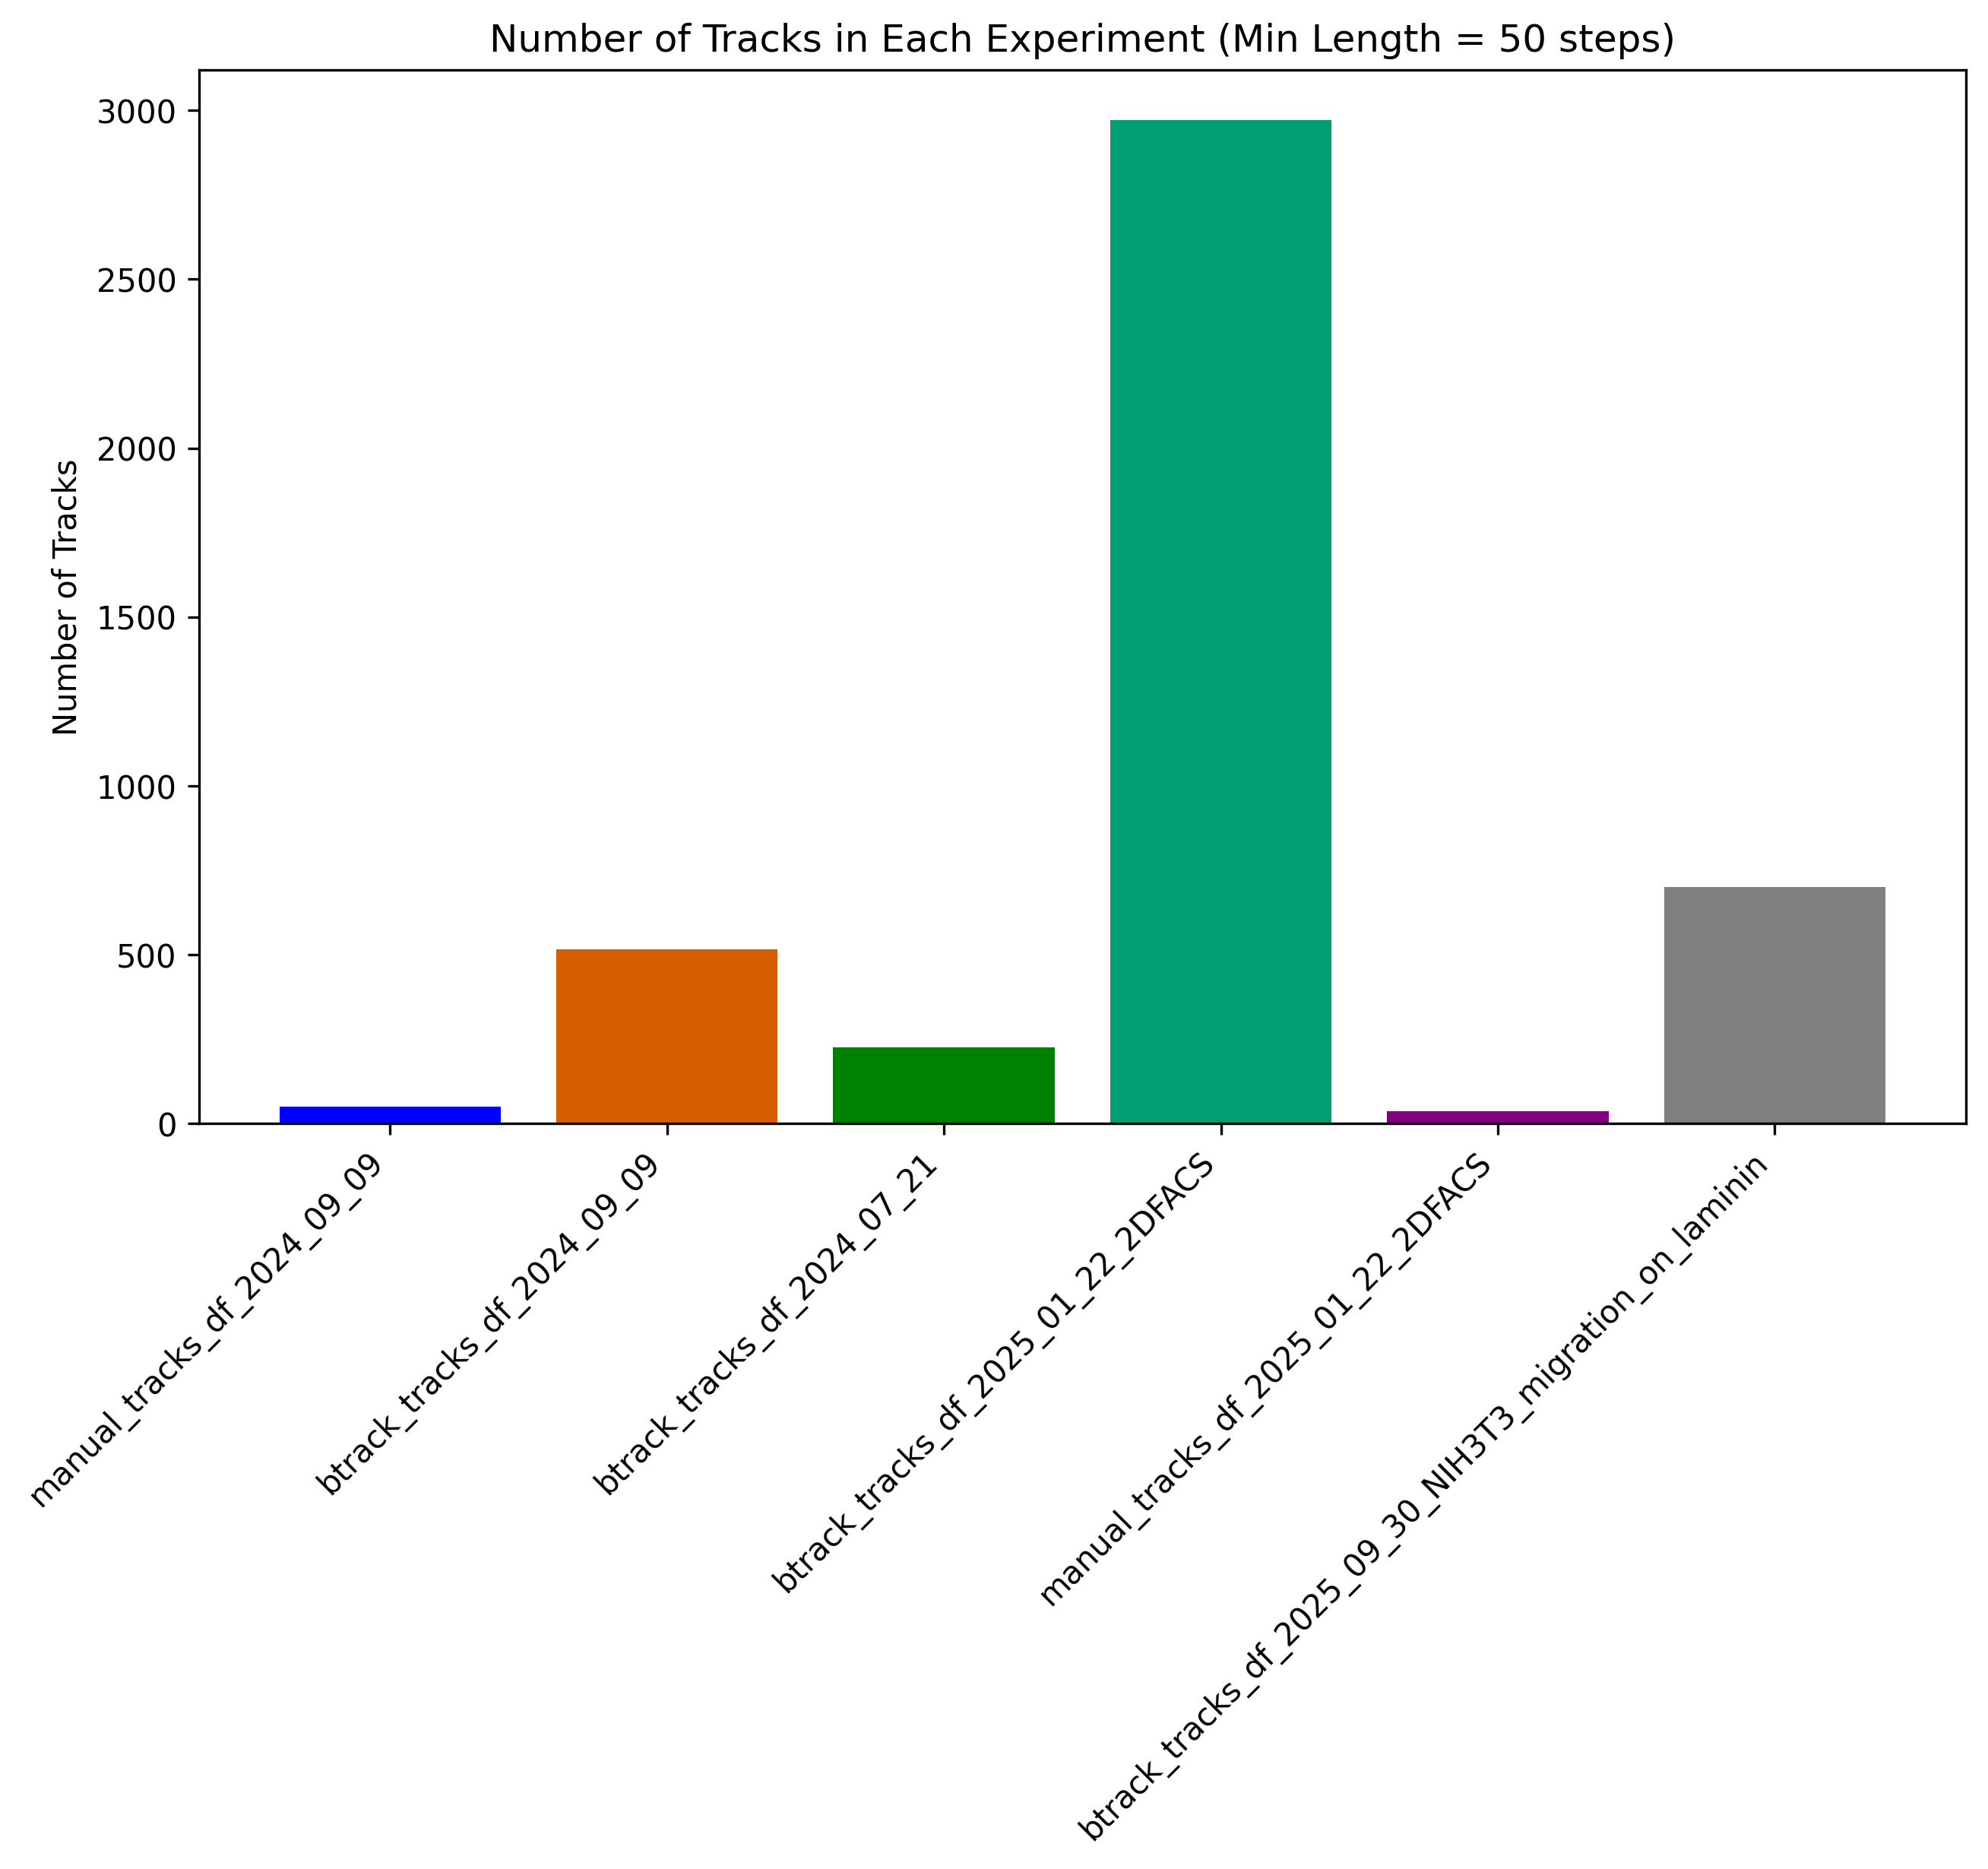

In [9]:
# plot number of tracks in each experinment (after filtering for min track length)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=300)
dataset_names = list(tracks_dataset.keys())
num_tracks = [tracks_dataset[name]['track_id'].nunique() for name in dataset_names]
plt.bar(dataset_names, num_tracks, color=[dataset_metadata.get(name, {}).get('color', 'gray') for name in dataset_names])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Tracks')
plt.title(f'Number of Tracks in Each Experiment (Min Length = {min_track_length} steps)')

In [10]:
num_tracks

[51, 517, 226, 2970, 37, 700]

In [11]:
datasets_to_plot = [
    # 'btrack_tracks_df_2025_09_30_NIH3T3_migration_on_laminin',
    # 'manual_tracks_df_2025_01_22_2DFACS',
    'btrack_tracks_df_2024_09_09',
    'btrack_tracks_df_2025_01_22_2DFACS'
]

## velocity distribution

C:\Users\davidzi\AppData\Local\Temp\ipykernel_29844\967739672.py:6: UserWarning: Using the axes or figure transform requires a bounding box in the respective coordinates. Using bbox_to_anchor=(0, 0, 1, 1) now.
  ax_inset = inset_axes(ax, width="50%", height="50%", loc='upper right', bbox_transform=ax.transAxes)


btrack_tracks_df_2024_09_09 ln(velocity) fit: mu=2.82, sigma=0.77
btrack_tracks_df_2025_01_22_2DFACS ln(velocity) fit: mu=2.31, sigma=0.86


C:\Users\davidzi\AppData\Local\Temp\ipykernel_29844\967739672.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)


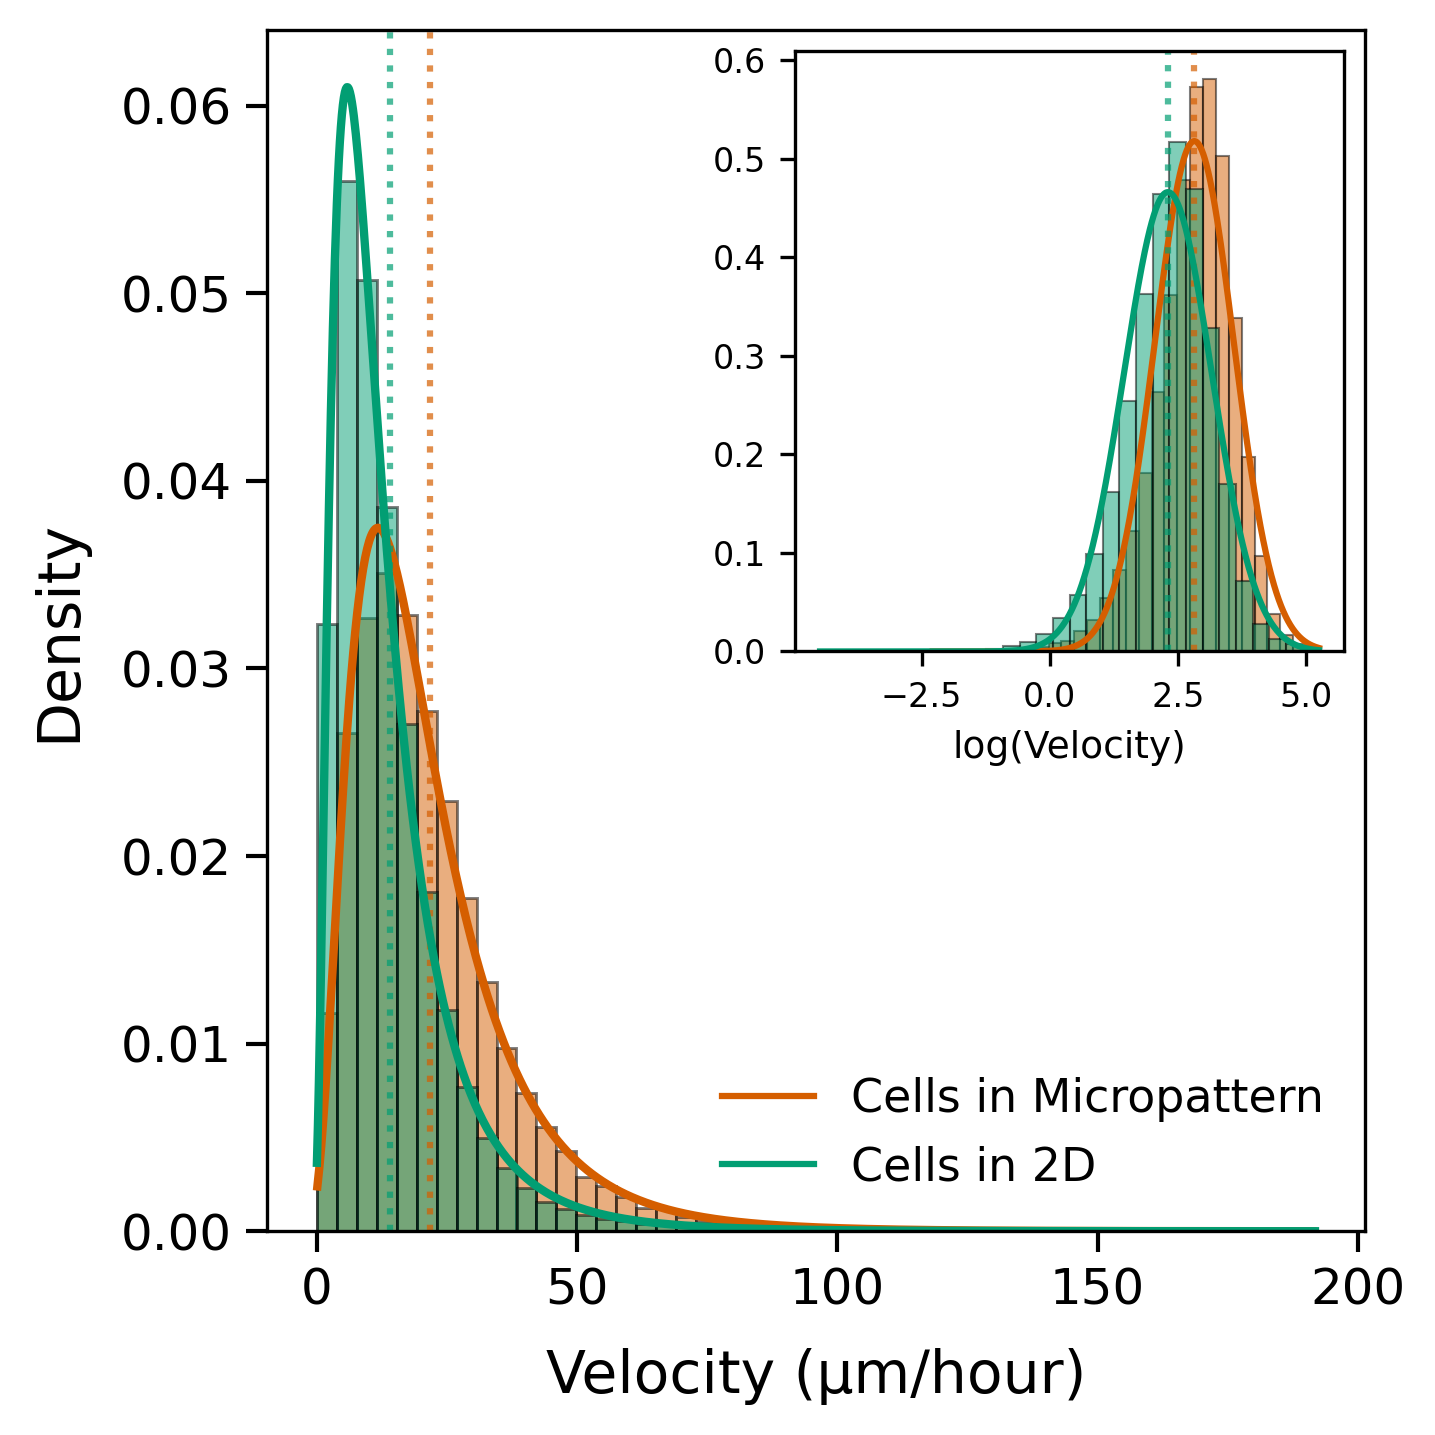

In [12]:
# Plot velocity distributions for datasets in datasets_to_plot on the same plot
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

# Create inset for log(velocity)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ax_inset = inset_axes(ax, width="50%", height="50%", loc='upper right', bbox_transform=ax.transAxes)

for i, name in enumerate(datasets_to_plot):
    velocities = velocities_dict.get(name, None)
    if velocities is None or len(velocities) == 0:
        print(f"No velocity data for {name}")
        continue
    
    # get color from metadata
    color = dataset_metadata.get(name, {}).get('color', 'blue')
    
    # Main plot: Histogram of velocities
    n, bins_hist, patches = ax.hist(
        velocities, bins=50, density=True, alpha=0.5,
        color=color, label=None, edgecolor='black', linewidth=0.7
    )
    
    # Fit lognormal distribution
    dist = stats.lognorm
    params = dist.fit(velocities)
    x = np.linspace(min(velocities), max(velocities), 1000)
    ax.plot(x, dist.pdf(x, *params), color=color, linestyle='-', linewidth=2)
    
    # Add vertical line for mean velocity
    mean_velocity = np.mean(velocities)
    ax.axvline(mean_velocity, color=color, linestyle=':', linewidth=1.5, alpha=0.7)
    
    # Inset: Histogram of log(velocities)
    log_velocities = np.log(velocities)
    ax_inset.hist(log_velocities, bins=30, density=True, alpha=0.5,
                  color=color, edgecolor='black', linewidth=0.5)
    
    # Fit normal distribution to log(velocities)
    mu, sigma = stats.norm.fit(log_velocities)
    print(f"{name} ln(velocity) fit: mu={mu:.2f}, sigma={sigma:.2f}")
    x_log = np.linspace(min(log_velocities), max(log_velocities), 1000)
    ax_inset.plot(x_log, stats.norm.pdf(x_log, mu, sigma), 
                  color=color, linestyle='-', linewidth=1.5)
    
    # Add vertical line for mean log(velocity) in inset
    ax_inset.axvline(np.mean(log_velocities), color=color, 
                     linestyle=':', linewidth=1.5, alpha=0.7)


    # Count tracks and velocity entries
    df = tracks_dataset[name]
    n_tracks = df['track_id'].nunique() if 'track_id' in df.columns else None
    n_velocities = len(velocities)
    short_name = dataset_metadata.get(name, {}).get('short_name', name)
    label = f"{short_name}"
    # label = f"{short_name}\nTracks: {n_tracks}, Velocity Entries: {n_velocities}"
    ax.plot([], [], color=color, label=label)  # dummy for legend

# Main plot formatting
ax.set_xlabel('Velocity (μm/hour)', fontsize=14, labelpad=8)
ax.set_ylabel('Density', fontsize=14, labelpad=8)
ax.tick_params(axis='both', which='major', labelsize=12, length=5, width=1)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

ax.legend(loc='lower right', frameon=False, fontsize=11)

# Inset formatting
# add text with mean and stddev to inset
ax_inset.set_xlabel('log(Velocity)', fontsize=9)
ax_inset.tick_params(axis='both', which='major', labelsize=8)
# ax_inset.spines['top'].set_visible(False)
# ax_inset.spines['right'].set_visible(False)

plt.tight_layout(pad=1.5)
plt.show()

In [13]:
import numpy as np
from scipy import stats
import warnings
from tqdm import trange  # optional; nice progress bar if installed

def compare_velocities_one_sided(
    name1,
    name2,
    velocities_dict,
    n_max = 5000,
    n_repeats = 100,
    n_perm = 5000,
    alpha = 0.05,
    random_state = 42,
    verbose = True
):
    """
    Compare velocities in name1 vs name2. Tests whether name1 is significantly faster than name2.
    Returns a summary dict with p-values and counts.
    """
    rng = np.random.RandomState(random_state)
    v1 = np.asarray(velocities_dict.get(name1, []))
    v2 = np.asarray(velocities_dict.get(name2, []))
    # Filter invalid entries: remove NaN, non-positive (log requires > 0)
    v1 = v1[np.isfinite(v1)]
    v2 = v2[np.isfinite(v2)]
    v1 = v1[v1 > 0]
    v2 = v2[v2 > 0]

    if len(v1) == 0 or len(v2) == 0:
        raise ValueError("One of the velocity arrays is empty (after filtering).")

    n = min(len(v1), len(v2), n_max)
    if n < 10:
        warnings.warn(f"Very small sample size after subsampling: n={n}")

    # Storage
    results = {
        'shapiro_p1': [],
        'shapiro_p2': [],
        'levene_p': [],
        'test_used': [],   # 't' or 'mw'
        'p_ttest_one_sided': [],   # may be np.nan if not used
        'p_mwu': [],
        'p_perm': [],
        'obs_mean_diff': [],
    }

    # Use a progress loop
    iterator = range(n_repeats)
    try:
        iterator = trange(n_repeats, desc='Repeats')  # if tqdm installed
    except Exception:
        iterator = range(n_repeats)

    for _ in iterator:
        # Subsample WITHOUT replacement for both groups
        s1 = rng.choice(v1, size=n, replace=False)
        s2 = rng.choice(v2, size=n, replace=False)

        # Work on log velocities for normality
        log1 = np.log(s1)
        log2 = np.log(s2)

        # Shapiro normality test (valid since n <= 5000)
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            sh1_stat, sh1_p = stats.shapiro(log1)
            sh2_stat, sh2_p = stats.shapiro(log2)

        results['shapiro_p1'].append(sh1_p)
        results['shapiro_p2'].append(sh2_p)

        # Levene for equal variance on log data
        lev_stat, lev_p = stats.levene(log1, log2, center='median')
        results['levene_p'].append(lev_p)

        # Decide which test to use:
        use_ttest = (sh1_p > 0.05) and (sh2_p > 0.05)  # both roughly normal in log-space
        p_ttest_one_sided = np.nan
        p_mwu = np.nan

        if use_ttest:
            # Use t-test on log-values (normal approximation)
            # scipy.stats.ttest_ind may return two-sided p; convert to one-sided
            t_stat, p_two = stats.ttest_ind(log1, log2, equal_var=(lev_p>0.05))
            # convert to one-sided p for alternative (mean(log1) > mean(log2))
            if t_stat > 0:
                p_ttest_one_sided = p_two / 2.0
            else:
                p_ttest_one_sided = 1.0 - p_two / 2.0  # large if opposite direction
            results['test_used'].append('t')
            results['p_ttest_one_sided'].append(p_ttest_one_sided)
        else:
            # Use Mann-Whitney U (one-sided)
            try:
                u_stat, p_mwu = stats.mannwhitneyu(s1, s2, alternative='greater')
            except TypeError:
                # Older scipy may not support alternative param: fallback to two-sided then convert
                u_stat, p_two = stats.mannwhitneyu(s1, s2)
                # heuristic conversion: if median(s1) > median(s2) then one-sided = p_two/2 else = 1 - p_two/2
                if np.median(s1) > np.median(s2):
                    p_mwu = p_two / 2.0
                else:
                    p_mwu = 1.0 - p_two / 2.0
            results['test_used'].append('mw')
            results['p_mwu'].append(p_mwu)

        # Permutation test for mean difference (one-sided: mean(s1) > mean(s2))
        obs_diff = np.mean(s1) - np.mean(s2)
        results['obs_mean_diff'].append(obs_diff)

        # Do permutation test (random shuffles of combined)
        combined = np.concatenate([s1, s2])
        perm_diffs = np.empty(n_perm)
        for i_perm in range(n_perm):
            rng_perm_idx = rng.permutation(len(combined))
            perm = combined[rng_perm_idx]
            perm_s1 = perm[:n]
            perm_s2 = perm[n:]
            perm_diffs[i_perm] = perm_s1.mean() - perm_s2.mean()
        # one-sided p-value: fraction permuted diffs >= observed
        p_perm = (np.sum(perm_diffs >= obs_diff) + 1) / (n_perm + 1)
        results['p_perm'].append(p_perm)

        # If t-test was used but we also want to record mwu slot consistency:
        if use_ttest:
            # compute mwu also (just for reporting) but don't use it for decision
            try:
                _, p_mwu_alt = stats.mannwhitneyu(s1, s2, alternative='greater')
            except TypeError:
                u_stat, p_two_alt = stats.mannwhitneyu(s1, s2)
                if np.median(s1) > np.median(s2):
                    p_mwu_alt = p_two_alt / 2.0
                else:
                    p_mwu_alt = 1.0 - p_two_alt / 2.0
            results['p_mwu'].append(p_mwu_alt)

    # Convert lists to arrays
    for k in results:
        results[k] = np.asarray(results[k])

    # Summaries
    # Determine significance per repeat:
    # For repeats where test_used == 't' check p_ttest_one_sided < alpha
    t_mask = (results['test_used'] == 't')
    mw_mask = (results['test_used'] == 'mw')

    t_significant = np.sum(results['p_ttest_one_sided'][t_mask] < alpha) if np.any(t_mask) else 0
    mw_significant = np.sum(results['p_mwu'][mw_mask] < alpha) if np.any(mw_mask) else 0
    perm_significant = np.sum(results['p_perm'] < alpha)

    summary = {
        'n_subsample': n,
        'n_repeats': n_repeats,
        'n_perm_each': n_perm,
        'n_used_ttest': int(np.sum(t_mask)),
        'n_used_mwu': int(np.sum(mw_mask)),
        't_significant_count': int(t_significant),
        'mw_significant_count': int(mw_significant),
        'perm_significant_count': int(perm_significant),
        'prop_repeats_t_significant': float(t_significant / max(1, np.sum(t_mask))),
        'prop_repeats_mw_significant': float(mw_significant / max(1, np.sum(mw_mask))),
        'prop_repeats_perm_significant': float(perm_significant / n_repeats),
        'median_p_ttest': float(np.nanmedian(results['p_ttest_one_sided'])),
        'median_p_mwu': float(np.nanmedian(results['p_mwu'])),
        'median_p_perm': float(np.median(results['p_perm'])),
        'median_obs_mean_diff': float(np.median(results['obs_mean_diff'])),
        'mean_obs_mean_diff': float(np.mean(results['obs_mean_diff'])),
    }

    if verbose:
        print(f"Subsample size (each): n = {n}")
        print(f"Repeats: {n_repeats}, Permutations per repeat: {n_perm}")
        print(f"Used t-test in {summary['n_used_ttest']} repeats, Mann-Whitney in {summary['n_used_mwu']} repeats.")
        if summary['n_used_ttest'] > 0:
            print(f" - t-test: {summary['t_significant_count']}/{summary['n_used_ttest']} repeats significant (one-sided, alpha={alpha}).")
        if summary['n_used_mwu'] > 0:
            print(f" - Mann-Whitney: {summary['mw_significant_count']}/{summary['n_used_mwu']} repeats significant (one-sided, alpha={alpha}).")
        print(f" - Permutation test: {summary['perm_significant_count']}/{n_repeats} repeats significant (one-sided, alpha={alpha}).")
        print()
        print("Median p-values across repeats:")
        print(f"  median p (t-test one-sided)  = {summary['median_p_ttest']:.4g}")
        print(f"  median p (Mann-Whitney)     = {summary['median_p_mwu']:.4g}")
        print(f"  median p (permutation)       = {summary['median_p_perm']:.4g}")
        print(f"Median observed mean difference (v1 - v2): {summary['median_obs_mean_diff']:.4g} (units same as velocity)")

        # Simple interpretation heuristic:
        strong_evidence = (summary['prop_repeats_perm_significant'] > 0.8) or \
                          ( (summary['n_used_ttest'] > 0 and summary['prop_repeats_t_significant'] > 0.8) ) or \
                          ( (summary['n_used_mwu'] > 0 and summary['prop_repeats_mw_significant'] > 0.8) )
        if strong_evidence:
            print("\nInterpretation: Strong and consistent evidence that", name1, "is faster than", name2)
        else:
            print("\nInterpretation: Evidence is mixed or weak — examine medians, p-value distribution and effect size.")

    # Attach the detailed results arrays for further inspection
    summary['detailed'] = results
    return summary

# Example call (use the names you already have)
summary = compare_velocities_one_sided(
    'btrack_tracks_df_2024_09_09',
    'btrack_tracks_df_2025_01_22_2DFACS',
    velocities_dict,
    n_max=5000,
    n_repeats=100,
    n_perm=2000,   # reduce if you want it faster; 2000 perms is usually adequate
    alpha=0.05,
    random_state=20251028,
    verbose=True
)

# If you want to annotate your existing matplotlib plot with a short summary:
txt = (f"Subsample n={summary['n_subsample']}\n"
       f"perm sig prop: {summary['prop_repeats_perm_significant']:.2f}\n"
       f"median mean diff: {summary['median_obs_mean_diff']:.3g}")
# put this somewhere on the plot, e.g. top-left:
try:
    ax.text(0.02, 0.98, txt, transform=ax.transAxes, va='top', fontsize=9,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.7, edgecolor='none'))
except Exception:
    # If your plotting variables differ, just print the text
    print(txt)


Repeats: 100%|██████████| 100/100 [01:01<00:00,  1.61it/s]

Subsample size (each): n = 5000
Repeats: 100, Permutations per repeat: 2000
Used t-test in 0 repeats, Mann-Whitney in 100 repeats.
 - Mann-Whitney: 100/100 repeats significant (one-sided, alpha=0.05).
 - Permutation test: 100/100 repeats significant (one-sided, alpha=0.05).

Median p-values across repeats:
  median p (t-test one-sided)  = nan
  median p (Mann-Whitney)     = 2.436e-223
  median p (permutation)       = 0.0004998
Median observed mean difference (v1 - v2): 7.772 (units same as velocity)

Interpretation: Strong and consistent evidence that btrack_tracks_df_2024_09_09 is faster than btrack_tracks_df_2025_01_22_2DFACS



c:\Users\davidzi\AppData\Local\anaconda3\envs\btrack-env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [14]:
import numpy as np
from scipy import stats
import warnings

# --- CONFIG ---
name1 = 'btrack_tracks_df_2024_09_09'
name2 = 'btrack_tracks_df_2025_01_22_2DFACS'
n_max = 5000
n_perm = 2000
seed = 20251028
alpha = 0.05

# --- get & clean data ---
v1 = np.asarray(velocities_dict.get(name1, []))
v2 = np.asarray(velocities_dict.get(name2, []))
v1 = v1[np.isfinite(v1)]
v2 = v2[np.isfinite(v2)]
v1 = v1[v1 > 0]
v2 = v2[v2 > 0]

if len(v1) == 0 or len(v2) == 0:
    raise ValueError("One of the datasets has no positive, finite velocities after filtering.")

n_sub = min(len(v1), len(v2), n_max)
rng = np.random.RandomState(seed)
s1 = rng.choice(v1, size=n_sub, replace=False)
s2 = rng.choice(v2, size=n_sub, replace=False)

# --- normality on log scale (Shapiro) ---
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sh1_stat, sh1_p = stats.shapiro(np.log(s1))
    sh2_stat, sh2_p = stats.shapiro(np.log(s2))

# --- Anderson-Darling (normal) on log scale for more info ---
ad1 = stats.anderson(np.log(s1), dist='norm')
ad2 = stats.anderson(np.log(s2), dist='norm')

# --- Mann-Whitney U (one-sided: is s1 > s2?) ---
try:
    u_stat, p_mwu = stats.mannwhitneyu(s1, s2, alternative='greater')
except TypeError:
    # older SciPy fallback
    u_stat, p_two = stats.mannwhitneyu(s1, s2)
    # heuristic one-sided conversion:
    if np.median(s1) > np.median(s2):
        p_mwu = p_two / 2.0
    else:
        p_mwu = 1.0 - p_two / 2.0

# --- permutation test on mean difference (one-sided) ---
obs_diff = np.mean(s1) - np.mean(s2)
combined = np.concatenate([s1, s2])
perm_diffs = np.empty(n_perm)
for i in range(n_perm):
    perm = combined[rng.permutation(len(combined))]
    perm_s1 = perm[:n_sub]
    perm_s2 = perm[n_sub:]
    perm_diffs[i] = perm_s1.mean() - perm_s2.mean()
p_perm = (np.sum(perm_diffs >= obs_diff) + 1) / (n_perm + 1)

# --- effect sizes ---
median_diff = np.median(s1) - np.median(s2)
# Cohen's d on log scale:
log1 = np.log(s1)
log2 = np.log(s2)
pooled_sd = np.sqrt(((log1.std(ddof=1)**2 + log2.std(ddof=1)**2) / 2.0))
cohens_d_log = (log1.mean() - log2.mean()) / (pooled_sd if pooled_sd != 0 else np.nan)

# --- decide star for permutation p (best assumption-free) ---
def stars(p):
    if p < 0.001: return '***'
    if p < 0.01:  return '**'
    if p < 0.05:  return '*'
    return 'ns'
sig_star = stars(p_perm)

# --- build text block ---
txt = (
    f"Subsample n={n_sub}\n"
    f"Median diff (v1 - v2) = {median_diff:.3g}\n"
    f"Mean diff (v1 - v2)   = {obs_diff:.3g}\n"
    f"Cohen's d (log-scale) = {cohens_d_log:.3g}\n\n"
    f"Shapiro p (log v1) = {sh1_p:.3g}\n"
    f"Shapiro p (log v2) = {sh2_p:.3g}\n"
    f"AD stat (log v1)   = {ad1.statistic:.3g}\n"
    f"AD stat (log v2)   = {ad2.statistic:.3g}\n\n"
    f"Mann-Whitney p (one-sided) = {p_mwu:.3g}\n"
    f"Permutation p (one-sided)   = {p_perm:.6g}  {sig_star}"
)

# --- annotate your existing axes `ax` (assumes ax exists) ---
ax.text(0.02, 0.98, txt, transform=ax.transAxes, va='top', fontsize=9,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.85, edgecolor='none'))

# (Optional) add a compact summary near legend / title:
summary_small = f"{sig_star} perm p={p_perm:.3g}, medianΔ={median_diff:.1f}"
ax.text(0.98, 0.98, summary_small, transform=ax.transAxes, va='top', ha='right',
        fontsize=10, fontweight='bold', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))


Text(0.98, 0.98, '*** perm p=0.0005, medianΔ=7.3')

In [15]:
from scipy.stats import ttest_ind, mannwhitneyu

# Compare two log10(velocity) distributions for statistical difference


# Get log10(velocity) arrays for the two datasets
log_velocities_1 = np.log10(velocities_dict[datasets_to_plot[0]])
log_velocities_2 = np.log10(velocities_dict[datasets_to_plot[1]])

# Remove NaNs
log_velocities_1 = log_velocities_1[~np.isnan(log_velocities_1)]
log_velocities_2 = log_velocities_2[~np.isnan(log_velocities_2)]

# Perform independent t-test (assumes normality)
t_stat, p_value_ttest = ttest_ind(log_velocities_1, log_velocities_2, equal_var=False)

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(log_velocities_1, log_velocities_2, alternative='two-sided')

print(f"T-test p-value: {p_value_ttest:.4g}")
print(f"Mann-Whitney U test p-value: {p_value_mwu:.4g}")

if p_value_ttest < 0.05:
    print("Significant difference (t-test)")
else:
    print("No significant difference (t-test)")

if p_value_mwu < 0.05:
    print("Significant difference (Mann-Whitney U test)")
else:
    print("No significant difference (Mann-Whitney U test)")

T-test p-value: 0
Mann-Whitney U test p-value: 0
Significant difference (t-test)
Significant difference (Mann-Whitney U test)


## step length distribution

Fitted power-law for Cells in Micropattern: alpha = 1.88
Fitted power-law for Cells in 2D: alpha = 1.66


C:\Users\davidzi\AppData\Local\Temp\ipykernel_29844\3794334771.py:59: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string " " (-> linestyle=' '). The keyword argument will take precedence.
  ax.plot([], [], ' ', label="Power Law Tail", linestyle='--', color='black')  # dummy for legend


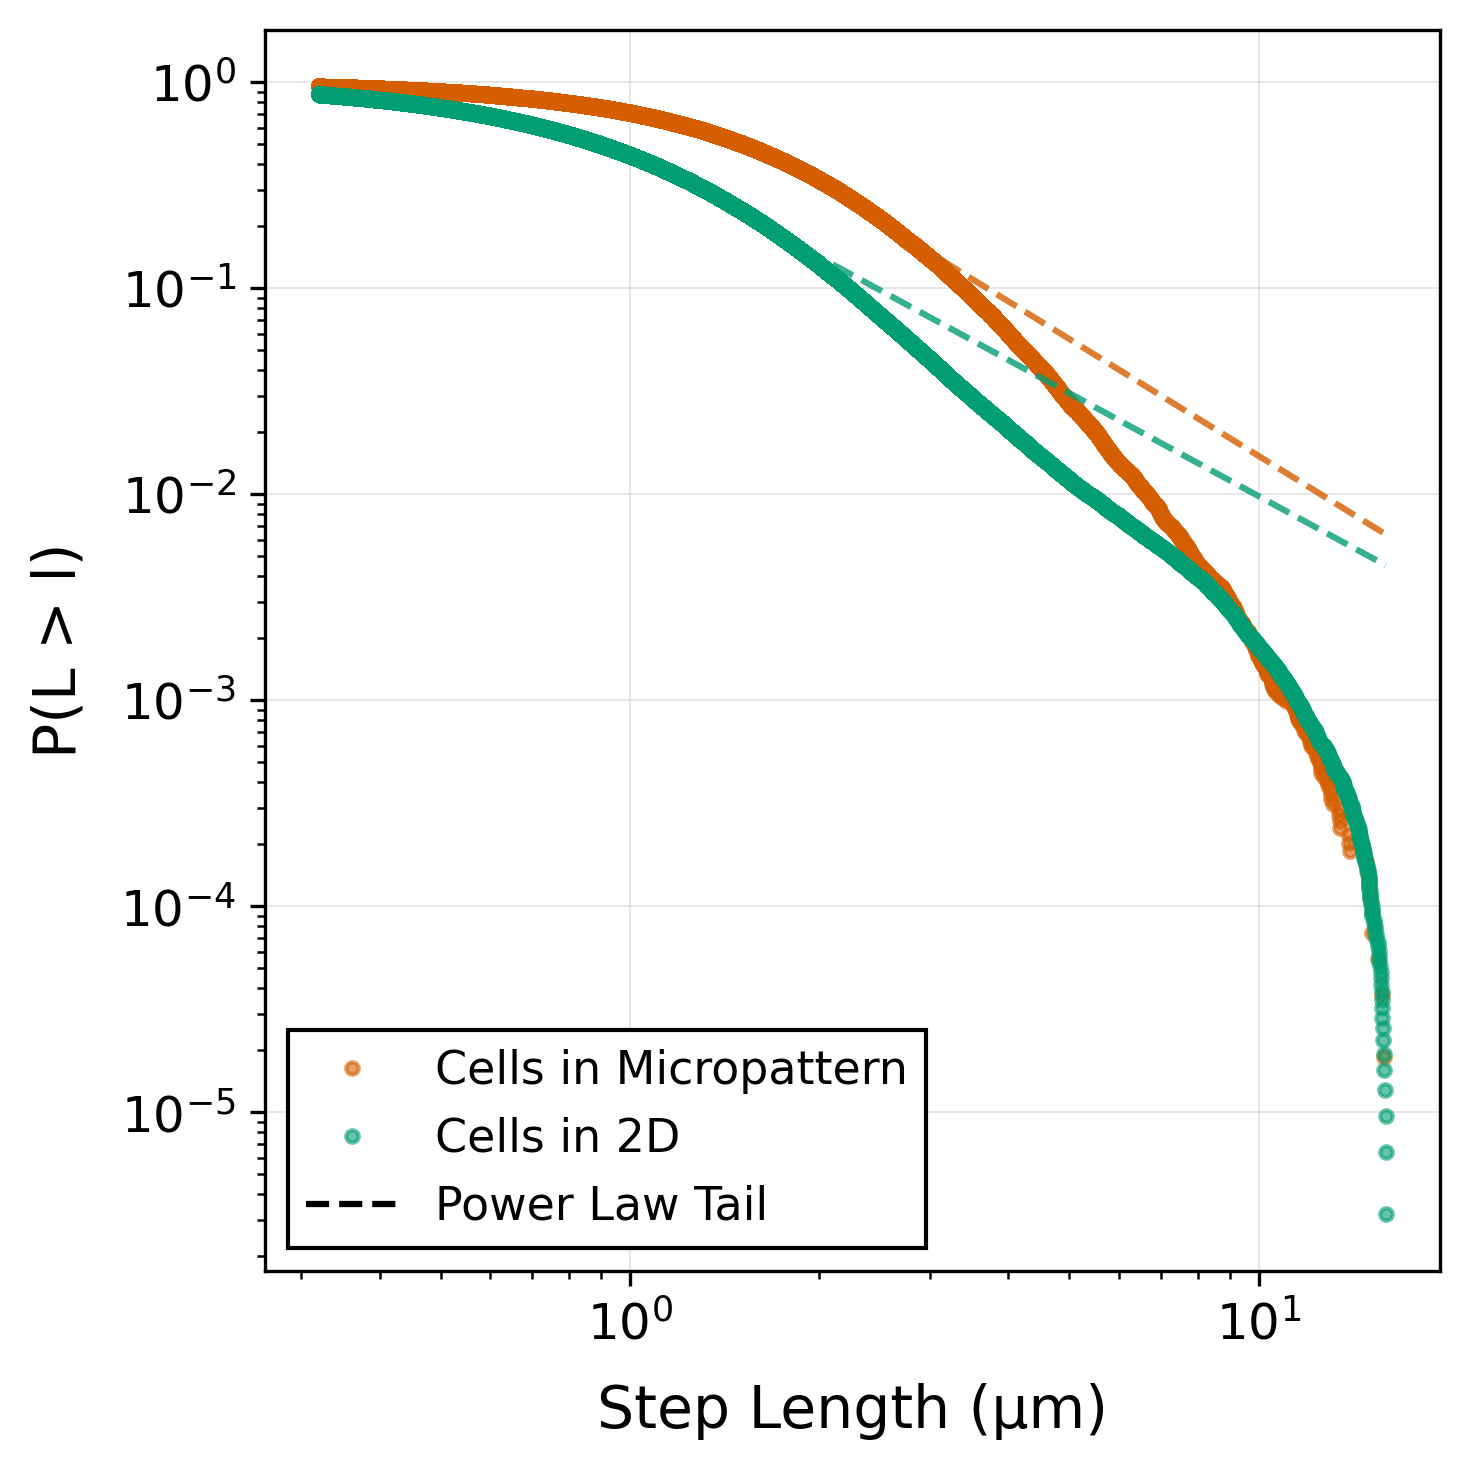

In [16]:
def compute_ccdf(data):
    # Example: compute the complementary cumulative distribution function
    sorted_data = np.sort(data)
    ccdf = 1.0 - np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, ccdf

# Plot only CCDF (P(L > l)) with power law fit to the tail
def power_law(x, alpha, c):
    return c * x**(-alpha)

fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

x_min = 0.32  # Minimum step length to display (10^-1)

for name in datasets_to_plot:
    step_lengths_df = step_length_distributions[name]
    step_lengths = step_lengths_df['step_length'].values

    color = dataset_metadata.get(name, {}).get('color', 'blue')
    short_name = dataset_metadata.get(name, {}).get('short_name', name)

    # Compute CCDF
    sorted_lengths, ccdf = compute_ccdf(step_lengths)
    
    # Filter data to show only x >= x_min
    plot_mask = sorted_lengths >= x_min
    sorted_lengths_filtered = sorted_lengths[plot_mask]
    ccdf_filtered = ccdf[plot_mask]
    
    ax.loglog(sorted_lengths_filtered, ccdf_filtered, 'o', color=color, 
              markersize=3, alpha=0.6, label=short_name)

    # Fit power-law to tail (top 50% of FULL data)
    threshold_idx = len(sorted_lengths) // 2
    x_fit = sorted_lengths[threshold_idx:]
    y_fit = ccdf[threshold_idx:]

    try:
        mask = (x_fit > 0) & (y_fit > 0)
        if np.sum(mask) > 10:
            popt_power, _ = curve_fit(power_law, x_fit[mask], y_fit[mask], 
                                     p0=[2.0, 1.0], maxfev=5000)
            alpha = popt_power[0]
            
            # Plot theory line only in visible range
            x_theory = np.logspace(np.log10(max(x_fit[mask].min(), x_min)), 
                                  np.log10(x_fit[mask].max()), 100)
            y_theory = power_law(x_theory, *popt_power)
            ax.loglog(x_theory, y_theory, '--', color=color, linewidth=1.5, alpha=0.8)
            print(f"Fitted power-law for {short_name}: alpha = {alpha:.2f}")

            
    except Exception as e:
        print(f"Could not fit power-law for {short_name}: {e}")

ax.set_xlabel('Step Length (μm)', fontsize=14, labelpad=8)
ax.set_ylabel('P(L > l)', fontsize=14, labelpad=8)
# ax.set_title('Step Length CCDF with Power Law Fit', fontsize=12, fontweight='bold')
ax.plot([], [], ' ', label="Power Law Tail", linestyle='--', color='black')  # dummy for legend
ax.legend(fontsize=11, frameon=True, edgecolor='black', fancybox=False, framealpha=1, loc='lower left')
ax.grid(alpha=0.3, which='major', linestyle='-', linewidth=.5)
ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

Fitted power-law for Cells in Micropattern: alpha = 1.88
Fitted power-law for Cells in 2D: alpha = 1.66


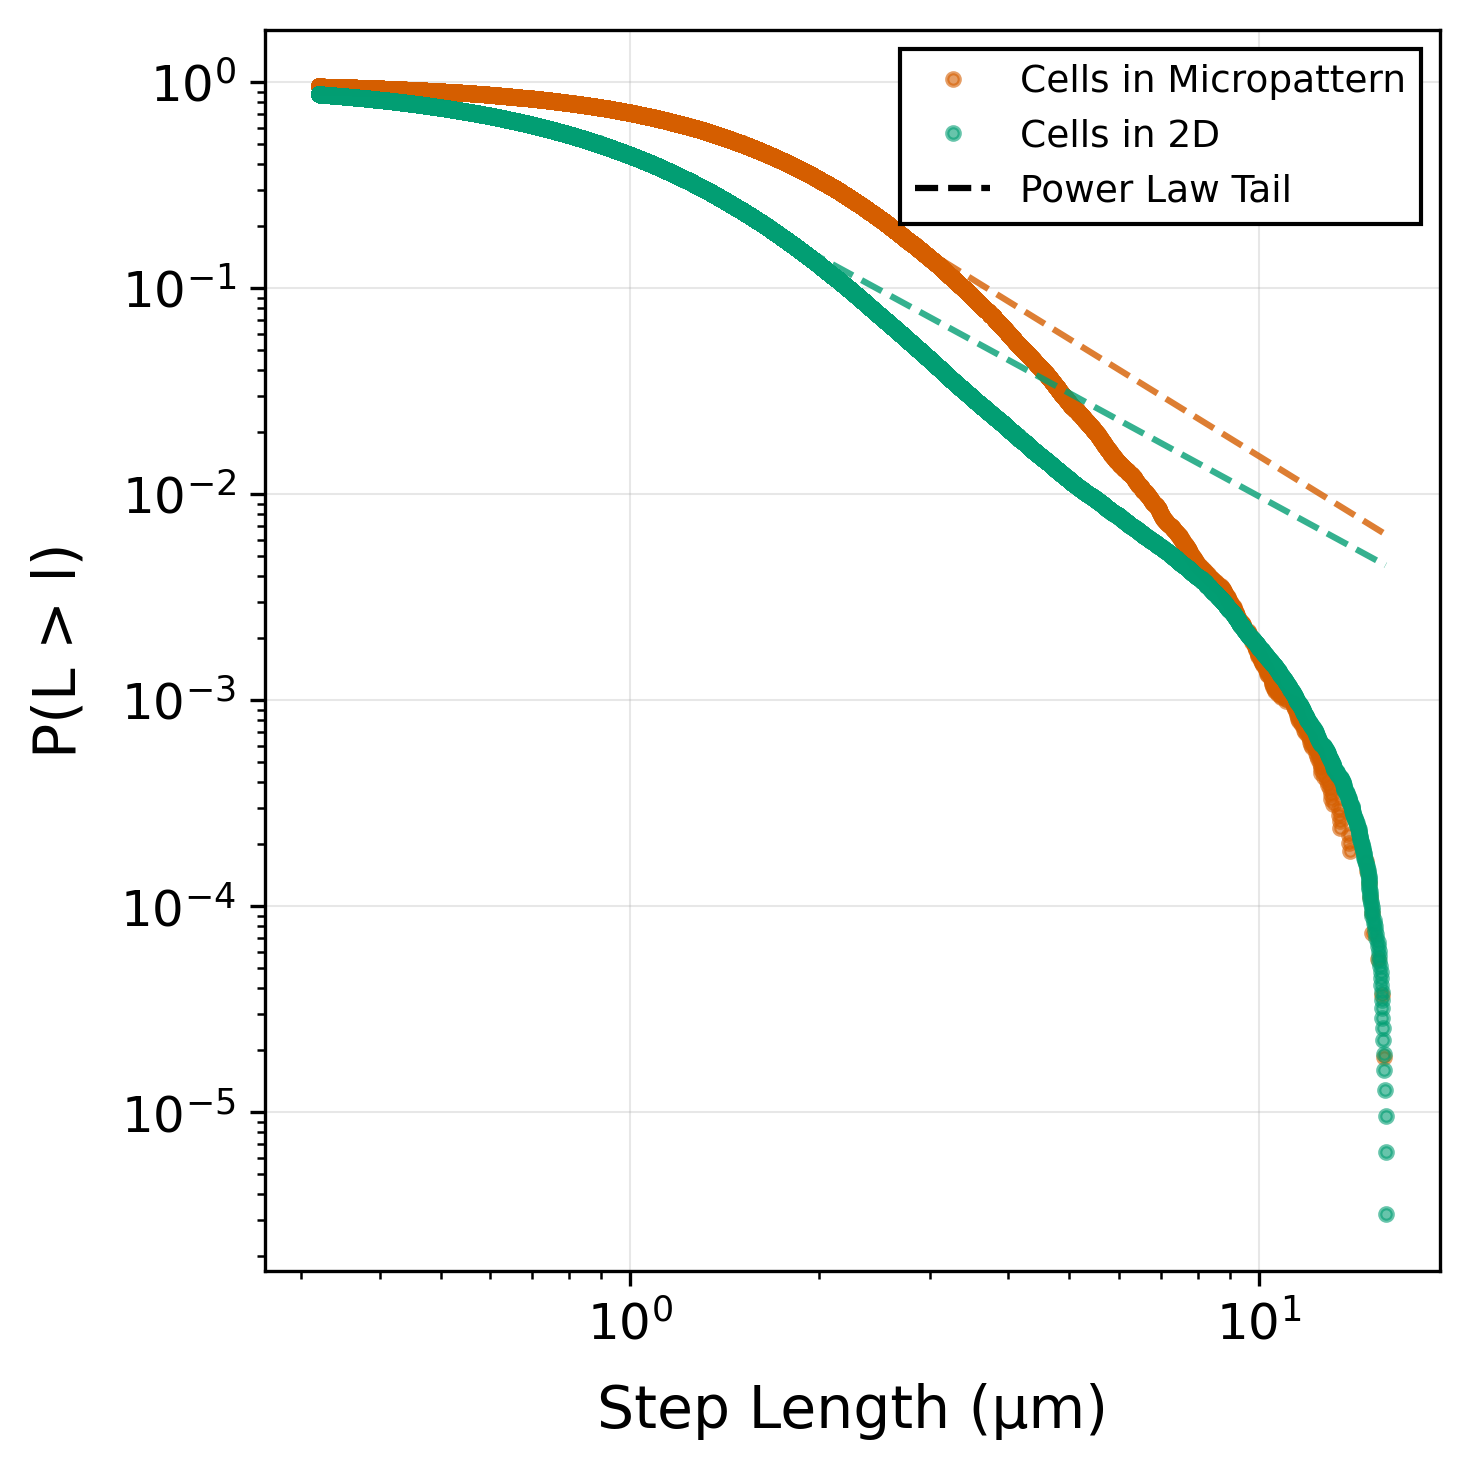

In [17]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
x_min = 0.32  # Minimum step length to display (10^-1)

for name in datasets_to_plot:
    step_lengths_df = step_length_distributions[name]
    step_lengths = step_lengths_df['step_length'].values
    color = dataset_metadata.get(name, {}).get('color', 'blue')
    short_name = dataset_metadata.get(name, {}).get('short_name', name)
    
    # Compute CCDF
    sorted_lengths, ccdf = compute_ccdf(step_lengths)
    
    # Filter data to show only x >= x_min
    plot_mask = sorted_lengths >= x_min
    sorted_lengths_filtered = sorted_lengths[plot_mask]
    ccdf_filtered = ccdf[plot_mask]
    
    ax.loglog(sorted_lengths_filtered, ccdf_filtered, 'o', color=color, 
              markersize=3, alpha=0.6, label=short_name)
    
    # Fit power-law to tail (top 50% of FULL data)
    threshold_idx = len(sorted_lengths) // 2
    x_fit = sorted_lengths[threshold_idx:]
    y_fit = ccdf[threshold_idx:]
    
    try:
        mask = (x_fit > 0) & (y_fit > 0)
        if np.sum(mask) > 10:
            # Fit with proper initial guess for all parameters
            popt_power, _ = curve_fit(power_law, x_fit[mask], y_fit[mask], 
                                     p0=[2.0, 1.0], maxfev=5000)
            alpha = popt_power[0]
            
            # Plot theory line only in visible range
            x_theory = np.logspace(np.log10(max(x_fit[mask].min(), x_min)), 
                                  np.log10(x_fit[mask].max()), 100)
            y_theory = power_law(x_theory, *popt_power)
            ax.loglog(x_theory, y_theory, '--', color=color, linewidth=1.5, alpha=0.8)
            print(f"Fitted power-law for {short_name}: alpha = {alpha:.2f}")
            
    except Exception as e:
        print(f"Could not fit power-law for {short_name}: {e}")

ax.set_xlabel('Step Length (μm)', fontsize=14, labelpad=8)
ax.set_ylabel('P(L > l)', fontsize=14, labelpad=8)
# ax.set_title('Step Length CCDF with Power Law Fit', fontsize=12, fontweight='bold')

# Fix for the legend warning - use proper approach
ax.plot([], [], linestyle='--', color='black', linewidth=1.5, label="Power Law Tail")
ax.legend(fontsize=9, frameon=True, edgecolor='black', fancybox=False, framealpha=1)
ax.grid(alpha=0.3, which='major', linestyle='-', linewidth=.5)
ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

In [18]:
step_length_distributions['btrack_tracks_df_2025_01_22_2DFACS']

step_length  turning_angle step_type
0          0.294433       1.768622   turning
1          1.478302       1.749056   turning
2          2.583245      -0.556264  straight
3          1.371447      -0.916372   turning
4          1.377305      -0.500407  straight
...             ...            ...       ...
312813     0.608812      -2.374538   turning
312814     2.713861      -0.068846  straight
312815     3.106159      -0.127157  straight
312816     1.979152      -0.564518  straight
312817     0.431207      -0.229015  straight

[312818 rows x 3 columns]

## angles

In [19]:
# Plot angle distributions for all datasets
fig, axes = plt.subplots(len(tracks_dataset), 4, figsize=(20, 5 * len(tracks_dataset)), dpi=300)

for i, (name, df) in enumerate(tracks_dataset.items()):
    if name not in datasets_to_plot:
        continue  # Skip datasets already plotted in velocity distributions
    color = dataset_metadata.get(name, {}).get('color', 'blue')
    # Angles relative to primary axis
    angles_primary = angles_relative_to_primary_axis_dict.get(name, None)
    # Angles relative to common axis
    angles_common = angles_relative_to_common_axis_dict.get(name, None)
    # Angles to center 
    angles_center = angles_to_center_dict.get(name, None)
    # Angle between consecutive steps
    angles_consecutive = angles_between_consecutive_steps_dict.get(name, None)

    # Row axes
    ax_primary = axes[i, 0] if len(tracks_dataset) > 1 else axes[0]
    ax_center = axes[i, 1] if len(tracks_dataset) > 1 else axes[1]
    ax_common = axes[i, 2] if len(tracks_dataset) > 1 else axes[2]
    ax_consecutive = axes[i, 3] if len(tracks_dataset) > 1 else axes[3]

    # Plot angles relative to primary axis
    if angles_primary is not None and len(angles_primary) > 0:
        ax_primary.hist(angles_primary, bins=50, density=True, color=color, alpha=0.7, edgecolor='black', linewidth=0.7)
    ax_primary.set_title(f"{name}\nAngle relative to primary axis", fontsize=12)
    ax_primary.set_xlabel("Angle (radians)")
    ax_primary.set_ylabel("Density")

    # Plot angles to center (for patterned dishes the center is the center of the pattern, for unpatterned it's the dish center)
    if angles_center is not None and len(angles_center) > 0:
        ax_center.hist(angles_center, bins=50, density=True, color=color, alpha=0.7, edgecolor='black', linewidth=0.7)
        ax_center.set_title(f"{name}\nAngle to center", fontsize=12)

    # Plot angles relative to common axis
    if angles_common is not None and len(angles_common) > 0:
        ax_common.hist(angles_common, bins=50, density=True, color=color, alpha=0.7, edgecolor='black', linewidth=0.7)
    ax_common.set_title(f"{name}\nAngle relative to common axis", fontsize=12)
    ax_common.set_xlabel("Angle (radians)")

    # Plot angles between consecutive steps
    if angles_consecutive is not None and len(angles_consecutive) > 0:
        ax_consecutive.hist(angles_consecutive, bins=50, density=True, color=color, alpha=0.7, edgecolor='black', linewidth=0.7)
    ax_consecutive.set_title(f"{name}\nAngle between consecutive steps", fontsize=12)
    ax_consecutive.set_xlabel("Angle (radians)")
    ax_consecutive.set_ylabel("Density")

plt.tight_layout(pad=2)
plt.show()


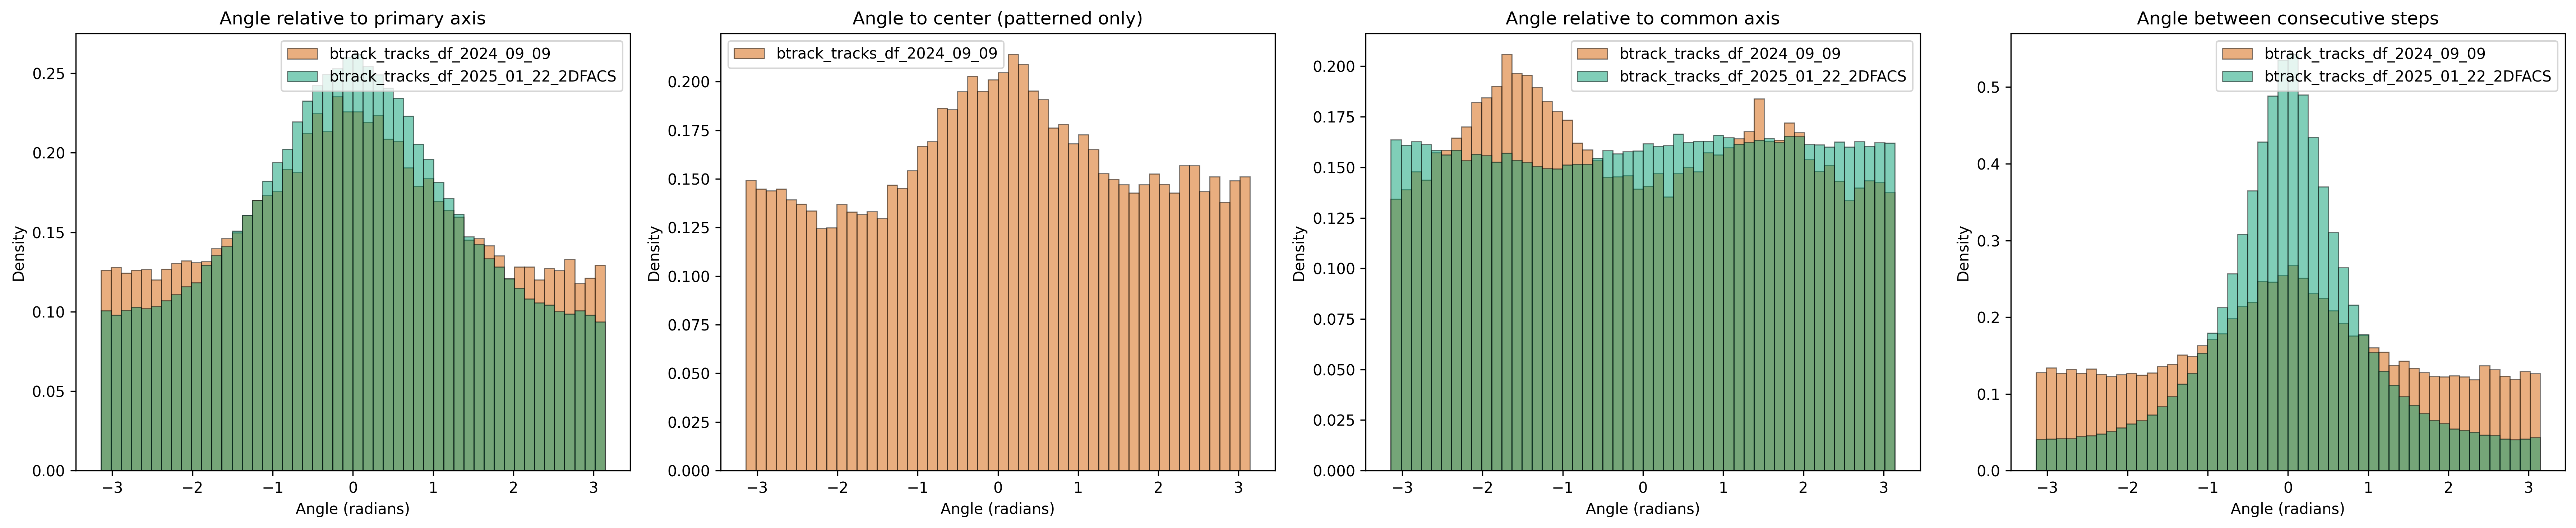

In [20]:

fig, axes = plt.subplots(1, 4, figsize=(24, 5), dpi=300)

ax_primary, ax_center, ax_common, ax_consecutive = axes

# Plot each dataset
for i, (name, df) in enumerate(tracks_dataset.items()):
    if name not in datasets_to_plot:
        continue  # Skip datasets not in datasets_to_plot

    color = dataset_metadata.get(name, {}).get('color', 'blue')
    
    # Angles relative to primary axis
    angles_primary = angles_relative_to_primary_axis_dict.get(name, None)
    if angles_primary is not None and len(angles_primary) > 0:
        ax_primary.hist(angles_primary, bins=50, density=True, color=color, 
                       alpha=0.5, edgecolor='black', linewidth=0.7, label=name)
    
    # Angles to center (patterned only)
    is_patterned = dataset_metadata.get(name, {}).get('pattern', False)
    angles_center = angles_to_center_dict.get(name, None) if is_patterned else None
    if is_patterned and angles_center is not None and len(angles_center) > 0:
        ax_center.hist(angles_center, bins=50, density=True, color=color, 
                      alpha=0.5, edgecolor='black', linewidth=0.7, label=name)
    
    # Angles relative to common axis
    angles_common = angles_relative_to_common_axis_dict.get(name, None)
    if angles_common is not None and len(angles_common) > 0:
        ax_common.hist(angles_common, bins=50, density=True, color=color, 
                      alpha=0.5, edgecolor='black', linewidth=0.7, label=name)
        
    # Angles between consecutive steps
    angles_consecutive = angles_between_consecutive_steps_dict.get(name, None)
    if angles_consecutive is not None and len(angles_consecutive) > 0:
        ax_consecutive.hist(angles_consecutive, bins=50, density=True, color=color, 
                      alpha=0.5, edgecolor='black', linewidth=0.7, label=name)

# Configure axes
ax_primary.set_title("Angle relative to primary axis", fontsize=12)
ax_primary.set_xlabel("Angle (radians)")
ax_primary.set_ylabel("Density")
ax_primary.legend()

ax_center.set_title("Angle to center (patterned only)", fontsize=12)
ax_center.set_xlabel("Angle (radians)")
ax_center.set_ylabel("Density")
ax_center.legend()

ax_common.set_title("Angle relative to common axis", fontsize=12)
ax_common.set_xlabel("Angle (radians)")
ax_common.set_ylabel("Density")
ax_common.legend()

ax_consecutive.set_title("Angle between consecutive steps", fontsize=12)
ax_consecutive.set_xlabel("Angle (radians)")
ax_consecutive.set_ylabel("Density")
ax_consecutive.legend()

plt.tight_layout()
plt.show()

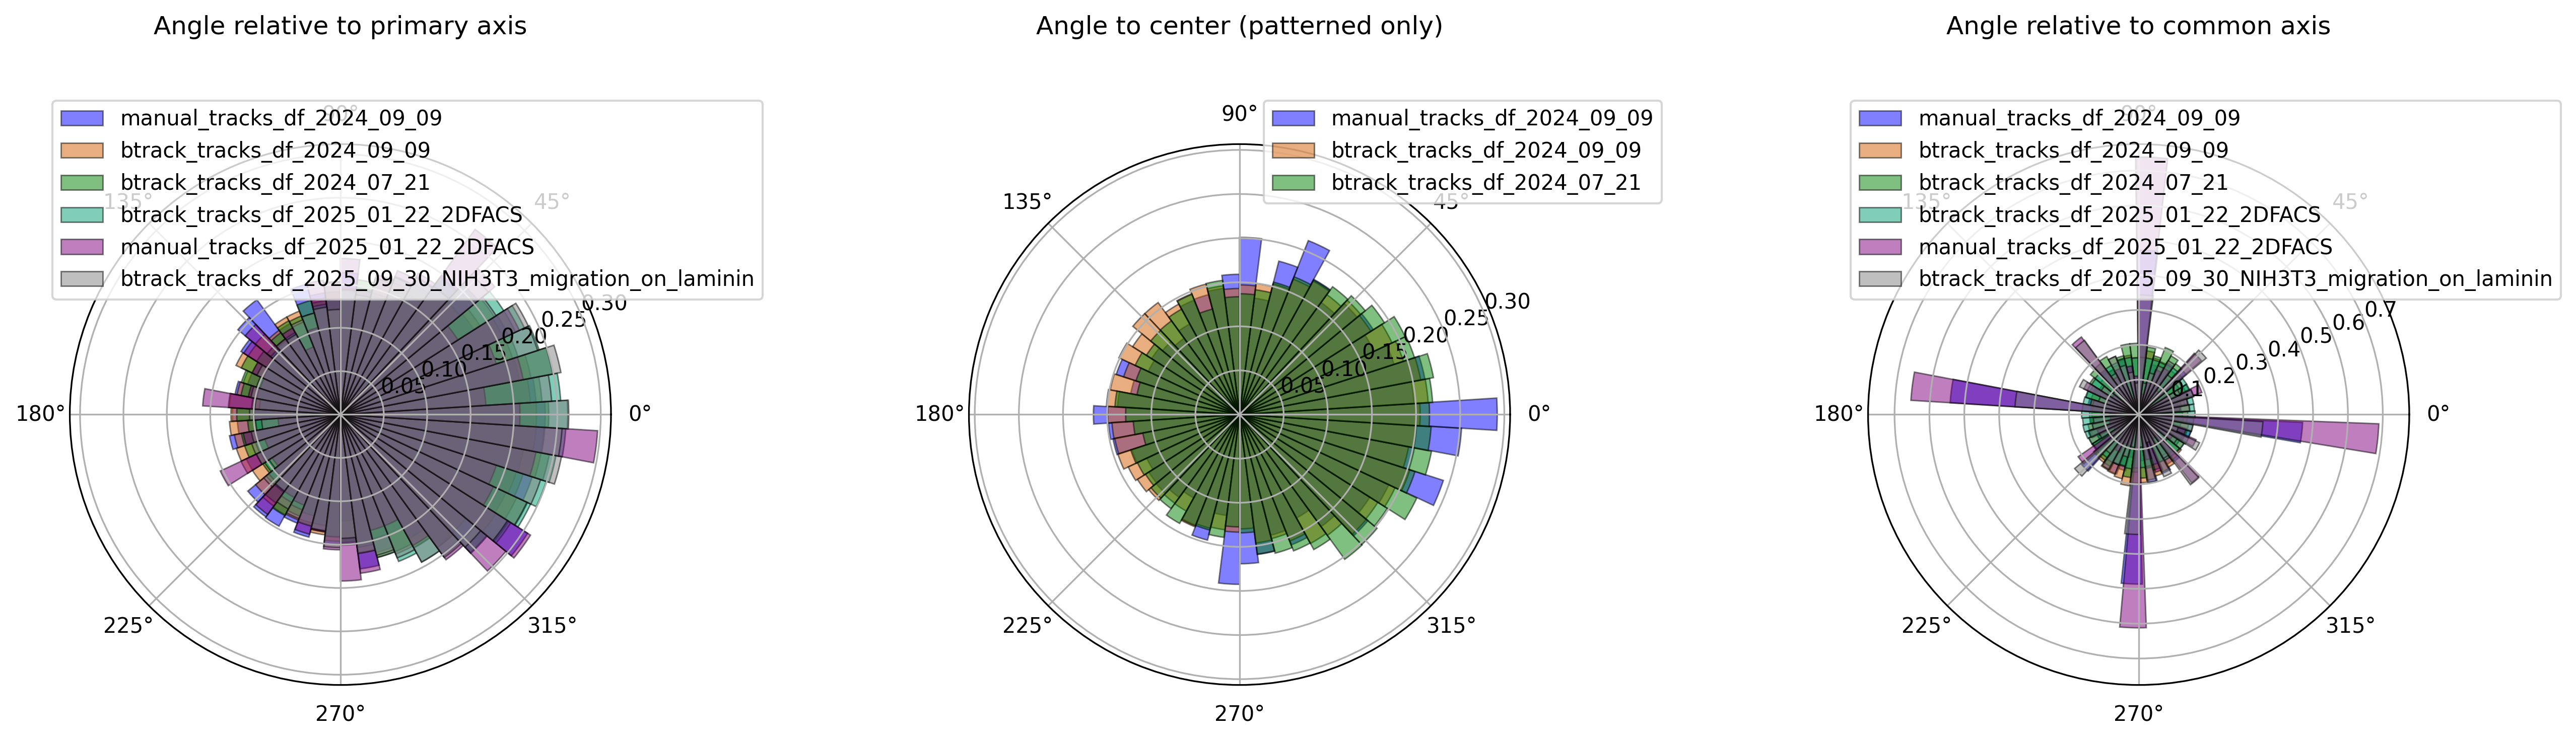

In [21]:
# Plot all angle distributions as circular plots
fig = plt.figure(figsize=(18, 5), dpi=300)

# Create polar subplots
ax_primary = fig.add_subplot(131, projection='polar')
ax_center = fig.add_subplot(132, projection='polar')
ax_common = fig.add_subplot(133, projection='polar')

# Plot each dataset
for i, (name, df) in enumerate(tracks_dataset.items()):
    color = dataset_metadata.get(name, {}).get('color', 'blue')
    
    # Angles relative to primary axis
    angles_primary = angles_relative_to_primary_axis_dict.get(name, None)
    if angles_primary is not None and len(angles_primary) > 0:
        counts, bins = np.histogram(angles_primary, bins=50, density=True)
        width = bins[1] - bins[0]
        ax_primary.bar(bins[:-1], counts, width=width, alpha=0.5, 
                      color=color, edgecolor='black', linewidth=0.7, label=name)
    
    # Angles to center (patterned only)
    is_patterned = dataset_metadata.get(name, {}).get('pattern', False)
    angles_center = angles_to_center_dict.get(name, None) if is_patterned else None
    if is_patterned and angles_center is not None and len(angles_center) > 0:
        counts, bins = np.histogram(angles_center, bins=50, density=True)
        width = bins[1] - bins[0]
        ax_center.bar(bins[:-1], counts, width=width, alpha=0.5, 
                     color=color, edgecolor='black', linewidth=0.7, label=name)
    
    # Angles relative to common axis
    angles_common = angles_relative_to_common_axis_dict.get(name, None)
    if angles_common is not None and len(angles_common) > 0:
        counts, bins = np.histogram(angles_common, bins=50, density=True)
        width = bins[1] - bins[0]
        ax_common.bar(bins[:-1], counts, width=width, alpha=0.5, 
                     color=color, edgecolor='black', linewidth=0.7, label=name)

# Configure axes
ax_primary.set_title("Angle relative to primary axis\n", fontsize=12, pad=20)
ax_primary.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

ax_center.set_title("Angle to center (patterned only)\n", fontsize=12, pad=20)
ax_center.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

ax_common.set_title("Angle relative to common axis\n", fontsize=12, pad=20)
ax_common.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

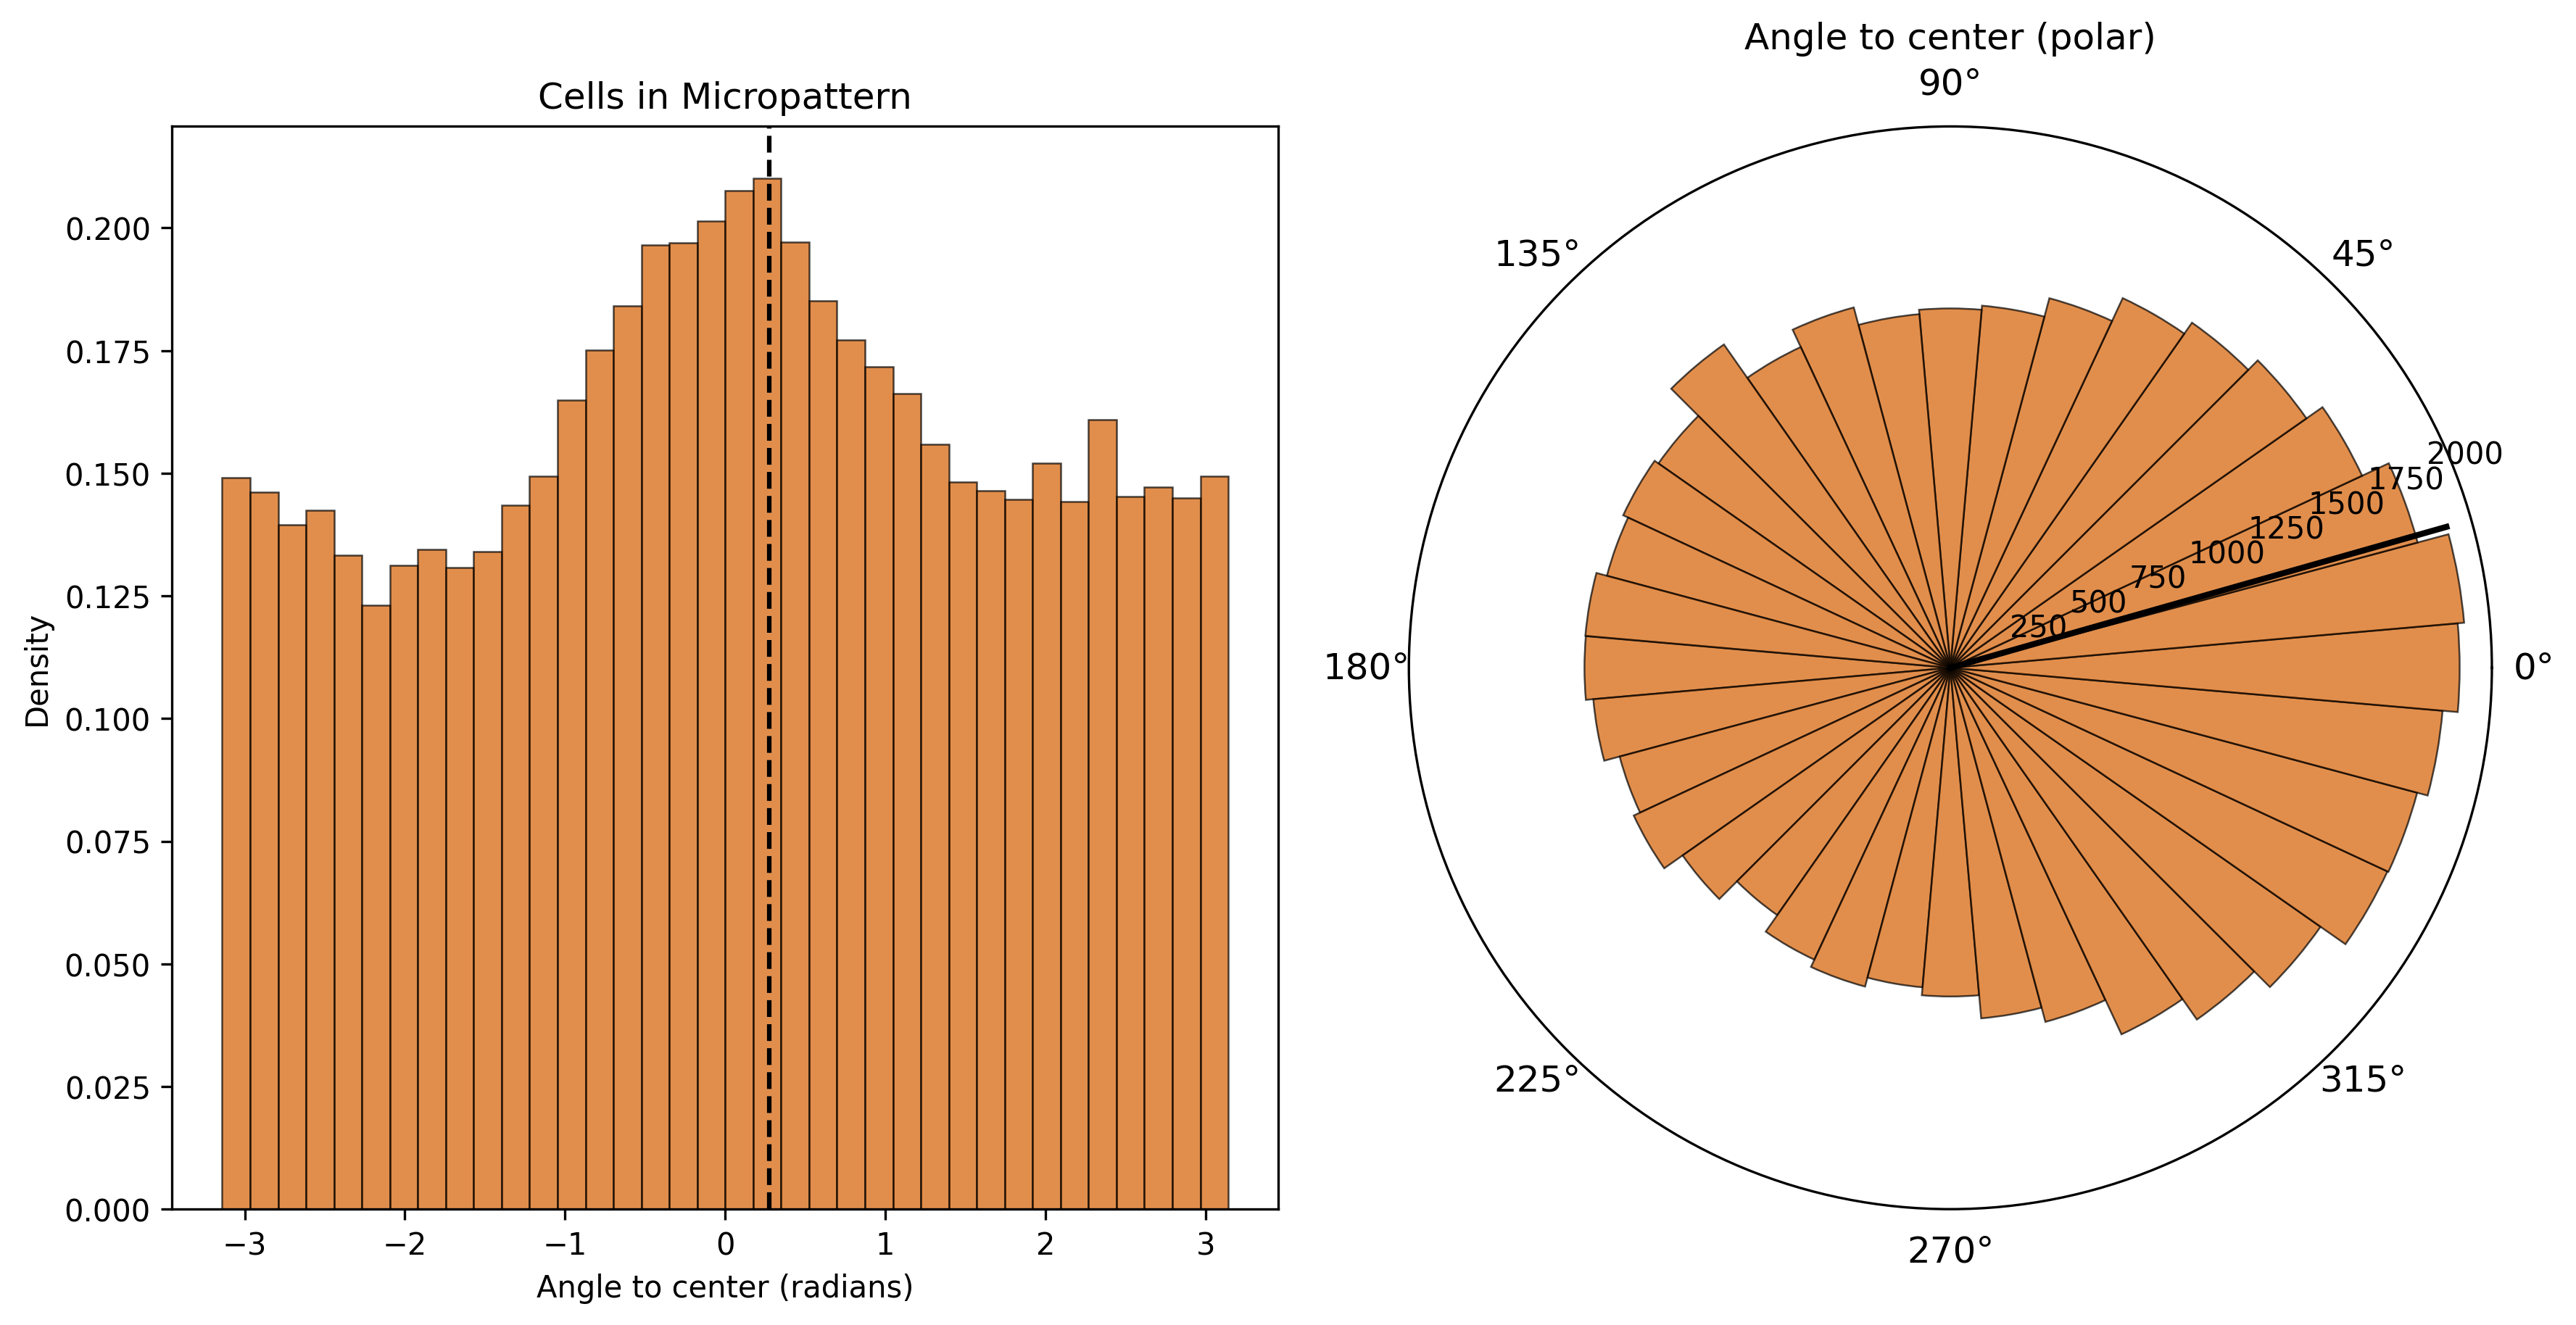

In [22]:
# Plot angles to center for a selected dataset
# Change selected_name to the dataset you want to plot
selected_name = 'btrack_tracks_df_2024_09_09'

# Get dataframe and angles (compute fallback if needed)
df = tracks_dataset.get(selected_name)
if df is None:
    raise KeyError(f"Dataset '{selected_name}' not found in tracks_dataset")

if 'angle_to_center' in df.columns and df['angle_to_center'].notna().any():
    angles = df['angle_to_center'].dropna().values
else:
    # fallback: assume center at mean x,y
    center_x = df['x_microns'].mean()
    center_y = df['y_microns'].mean()
    angles = np.arctan2(df['y_microns'] - center_y, df['x_microns'] - center_x)
    angles = angles[~np.isnan(angles)]

if len(angles) == 0:
    print(f"No angle_to_center data available for {selected_name}")
else:
    color = dataset_metadata.get(selected_name, {}).get('color', 'blue')

    # Circular mean
    mean_angle = np.angle(np.mean(np.exp(1j * angles)))

    # Linear histogram + polar (rose) plot
    fig, (ax_hist, ax_polar) = plt.subplots(1, 2, figsize=(12, 6), dpi=300,
                                            subplot_kw={ 'polar': False })
    # Left: linear histogram
    ax_hist.hist(angles, bins=36, density=True, color=color, alpha=0.7, edgecolor='black', linewidth=0.6)
    ax_hist.axvline(mean_angle, color='k', linestyle='--', linewidth=1.5)
    ax_hist.set_xlabel('Angle to center (radians)')
    ax_hist.set_ylabel('Density')
    ax_hist.set_title(dataset_metadata.get(selected_name, {}).get('short_name', selected_name))

    # Right: polar (rose) plot
    plt.sca(ax_polar)
    # remove existing ticks and labels and spines
    plt.xticks([])
    plt.yticks([])
    for spine in ax_polar.spines.values():
        spine.set_visible(False)

    ax_polar = plt.subplot(122, projection='polar')
    bins = 36
    counts, bin_edges = np.histogram(angles, bins=bins)
    widths = np.diff(bin_edges)
    ax_polar.bar(bin_edges[:-1], counts, width=widths, bottom=0.0,
                 color=color, alpha=0.7, edgecolor='black', linewidth=0.6)
    # remove grid lines
    ax_polar.grid(False)
    # remove counter labels
    # ax_polar.set_yticklabels([])
    # x tick fonts
    ax_polar.tick_params(axis='x', which='major', labelsize=12)
    # plot mean direction
    ax_polar.plot([mean_angle, mean_angle], [0, counts.max()], color='k', lw=2)
    ax_polar.set_title('Angle to center (polar)')

    plt.tight_layout()
    plt.show()

### Fit von mises combination for the distribution of angle between consecutive steps

Fitted parameters for btrack_tracks_df_2025_01_22_2DFACS: W1=0.3245, kappa1=6.1288, kappa2=0.8959


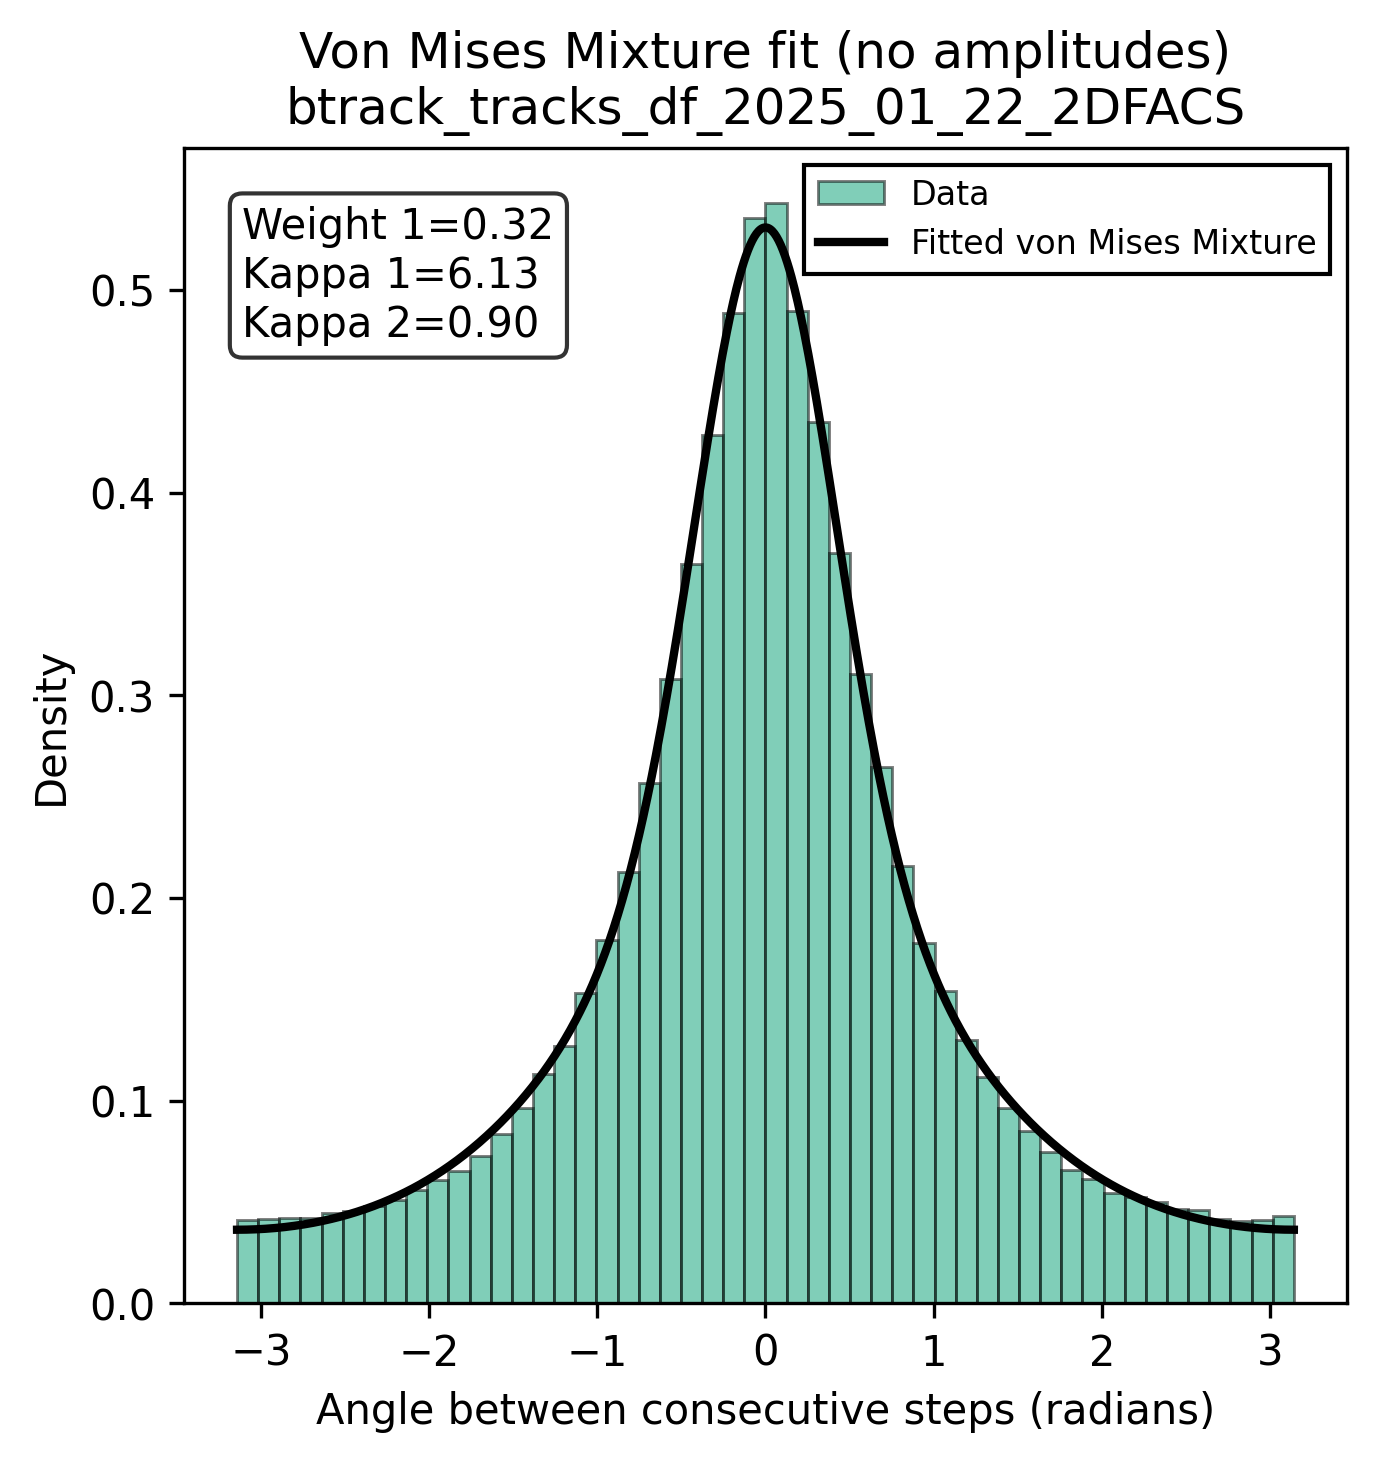

In [23]:
# Fit von mises combination for the distribution of angle between consecutive steps
# the data is in angles_between_consecutive_steps_dict
# This distribution should be describes as a composition of two von mises distributions both centered at 0 but with different concentration parameters (kappa).
from scipy.special import i0

def von_mises_mixture_no_amplitudes(x, W1, kappa1, kappa2):
    """Mixture of two von Mises distributions centered at 0 without amplitude parameters.
    W1: weight of the first component (0..1)
    kappa1, kappa2: concentration parameters (>=0)
    """
    vm1 = np.exp(kappa1 * np.cos(x)) / (2 * np.pi * i0(kappa1))
    vm2 = np.exp(kappa2 * np.cos(x)) / (2 * np.pi * i0(kappa2))
    return W1 * vm1 + (1.0 - W1) * vm2

# Example fit for one dataset (only kappas returned)
example_dataset_name = 'btrack_tracks_df_2025_01_22_2DFACS'
angles_consecutive = angles_between_consecutive_steps_dict.get(example_dataset_name, None)

if angles_consecutive is not None and len(angles_consecutive) > 0:
    counts, bin_edges = np.histogram(angles_consecutive, bins=50, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    initial_guesses = [0.5, 1.0, 0.5]  # W1, kappa1, kappa2
    bounds = ([0.0, 0.0, 0.0], [1.0, 1e3, 1e3])

    try:
        params, covariance = curve_fit(von_mises_mixture_no_amplitudes, bin_centers, counts,
                                       p0=initial_guesses, bounds=bounds, maxfev=10000)
        W1_fit, kappa1_fit, kappa2_fit = params
        print(f"Fitted parameters for {example_dataset_name}: W1={W1_fit:.4f}, kappa1={kappa1_fit:.4f}, kappa2={kappa2_fit:.4f}")

        x_fit = np.linspace(-np.pi, np.pi, 1000)
        y_fit = von_mises_mixture_no_amplitudes(x_fit, *params)

        plt.figure(figsize=(5, 5), dpi=300)
        plt.hist(angles_consecutive, bins=50, density=True, alpha=0.5,
                 color=color_map['2D BTrack Tracking'], edgecolor='black', linewidth=0.7, label='Data')
        plt.plot(x_fit, y_fit, 'k-', label='Fitted von Mises Mixture', linewidth=2)
        plt.text(0.05, 0.95, f'Weight 1={W1_fit:.2f}\nKappa 1={kappa1_fit:.2f}\nKappa 2={kappa2_fit:.2f}',
                 transform=plt.gca().transAxes, verticalalignment='top', fontsize=10,
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor=None))
        plt.xlabel('Angle between consecutive steps (radians)')
        plt.ylabel('Density')
        plt.title(f'Von Mises Mixture fit (no amplitudes)\n{example_dataset_name}')
        plt.legend(loc='upper right', frameon=True, fontsize=8, edgecolor='black', fancybox=False, framealpha=1)
        plt.show()

    except RuntimeError as e:
        print(f"Could not fit data for {example_dataset_name}: {e}")
else:
    print(f"No angle data for {example_dataset_name}")

Lag=1: 311909 angles
Lag=10: 285260 angles
Lag=30: 225984 angles
Lag=60: 140569 angles
Lag=90: 84371 angles
Fit (lag=1): W1=0.324, kappa1=6.130, kappa2=0.896


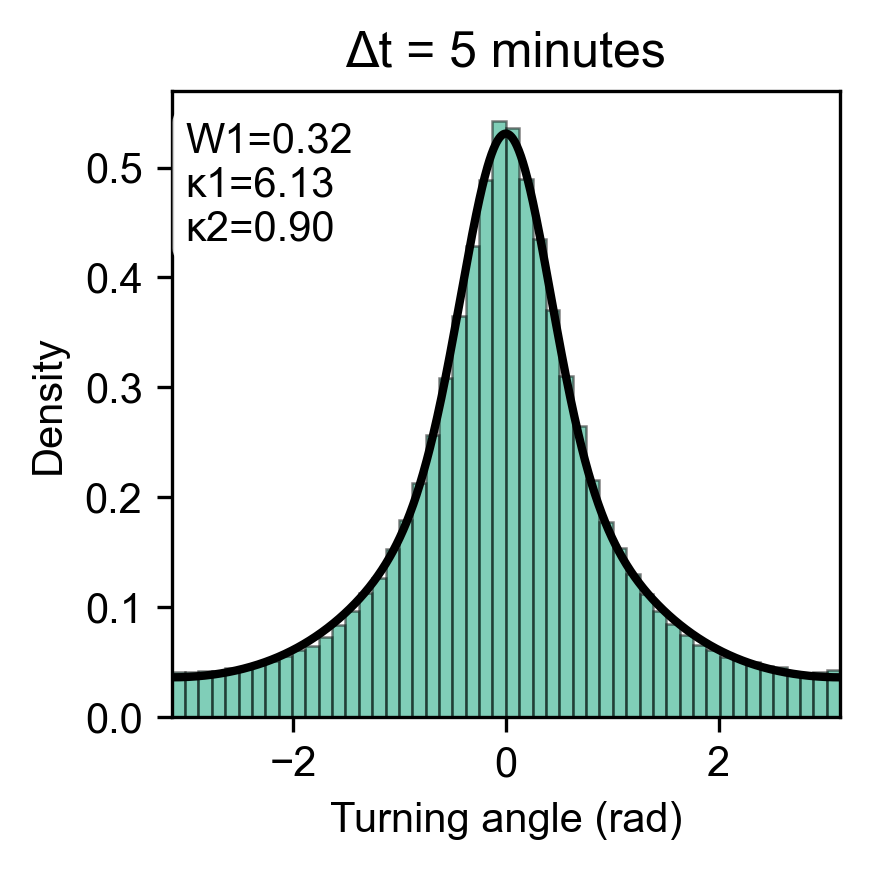

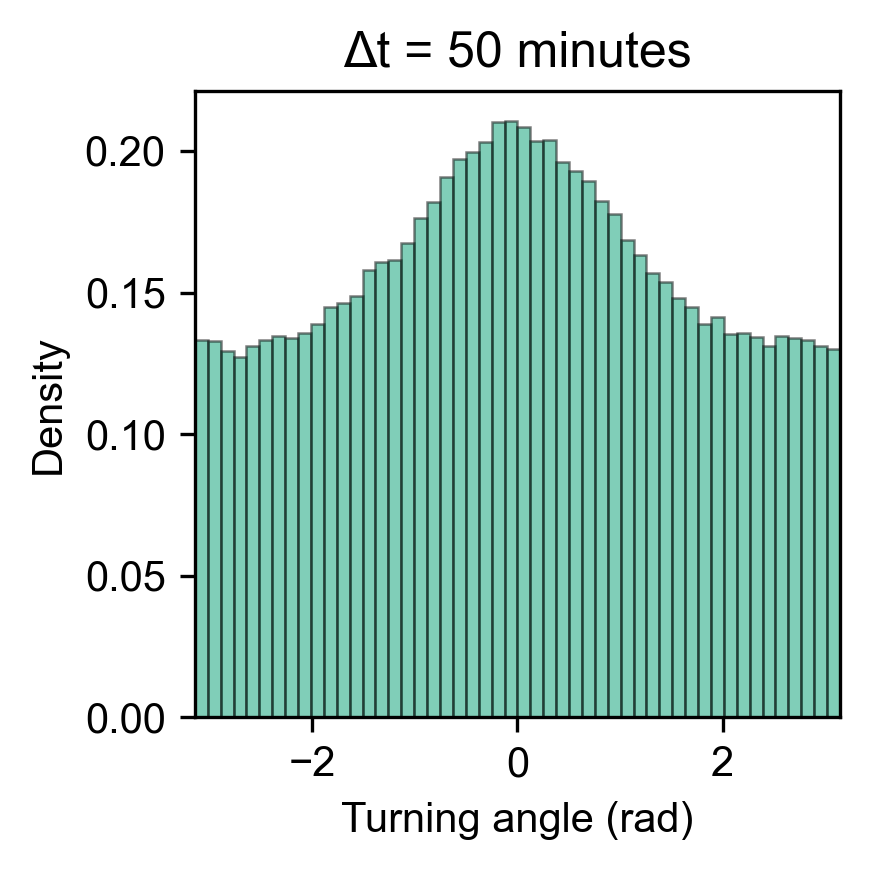

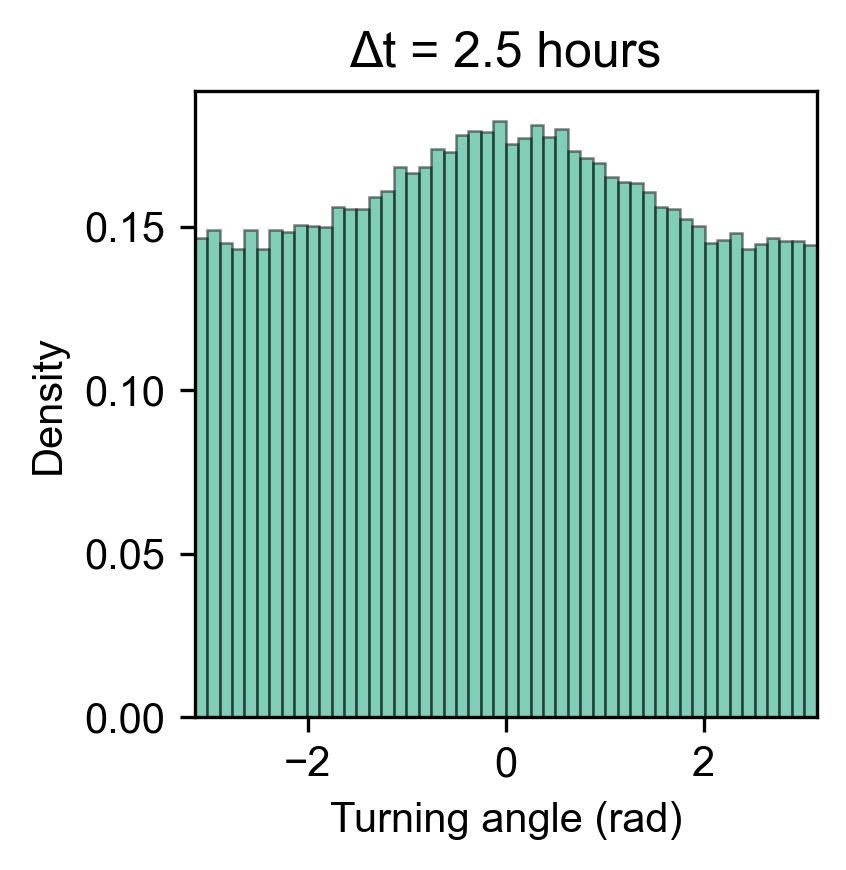

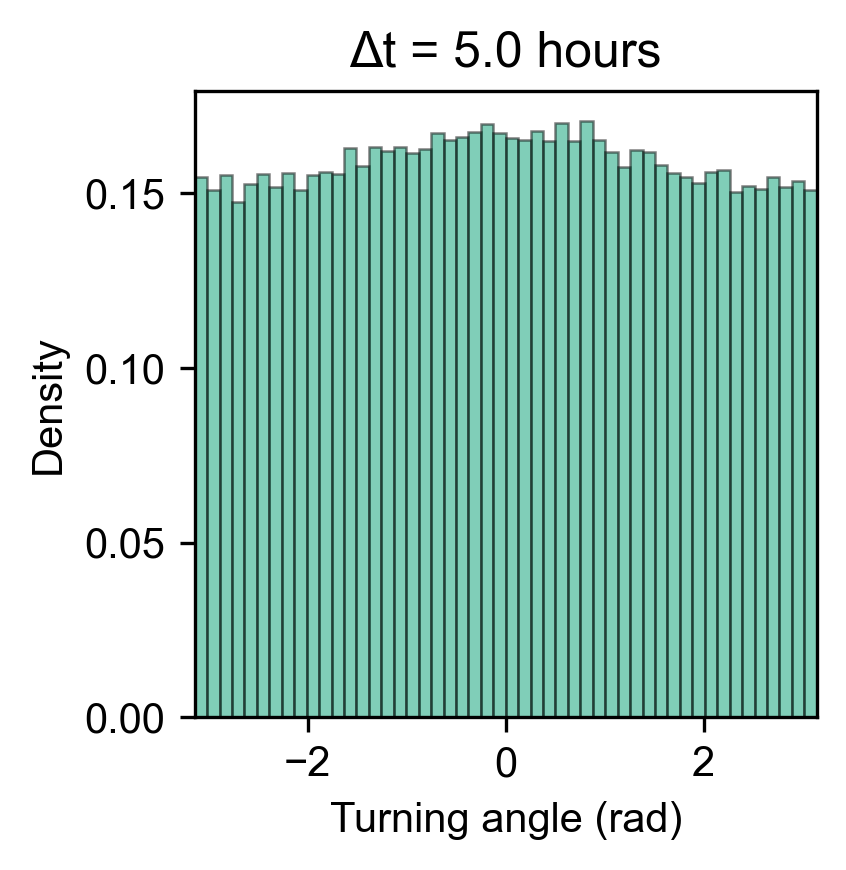

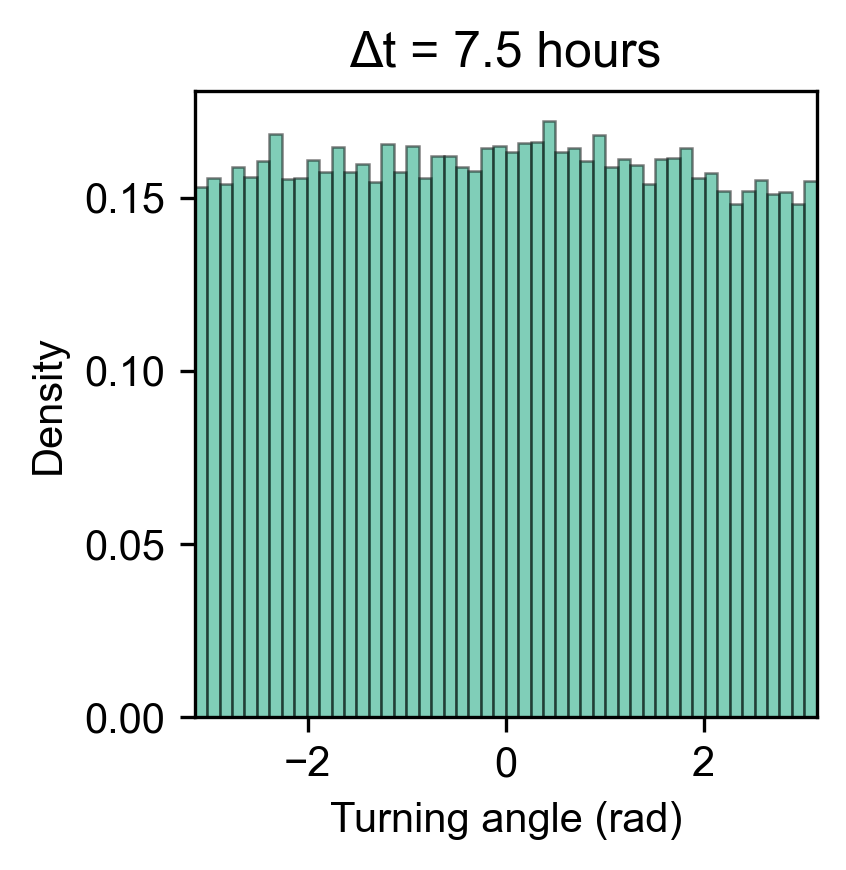

In [132]:
# Split plotting into 4 separate figures (one per lag) for more flexibility

# --- configuration ---
dataset_name = 'btrack_tracks_df_2025_01_22_2DFACS'
lags = [1, 10, 30, 60, 90]
bins = 50
hist_range = (-np.pi, np.pi)
plot_color = color_map.get('2D BTrack Tracking', 'C0')

# obtain dataframe
if 'tracks_dataset' in globals() and dataset_name in tracks_dataset:
    df = tracks_dataset[dataset_name]
elif dataset_name in globals():
    df = globals()[dataset_name]
else:
    raise RuntimeError(f"Could not find dataframe for dataset '{dataset_name}'.")

# compute angle lists for each lag
angles_by_lag = {}
for lag in lags:
    angles = compute_turning_angles(df, track_col='track_id', x_col='x_microns', y_col='y_microns', step_col='step', lag=lag)
    angles = np.array(angles)
    angles_by_lag[lag] = angles
    print(f"Lag={lag}: {len(angles)} angles")

# Fit only for lag = 1 (if available)
fit_params = None
angles1 = angles_by_lag.get(1, np.array([]))
if angles1.size > 0:
    counts, bin_edges = np.histogram(angles1, bins=bins, range=hist_range, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    p0 = [0.5, 1.0, 0.5]
    bounds = ([0.0, 0.0, 0.0], [1.0, 1e3, 1e3])
    try:
        params, cov = curve_fit(von_mises_mixture_no_amplitudes, bin_centers, counts, p0=p0, bounds=bounds, maxfev=20000)
        fit_params = params
        print(f"Fit (lag=1): W1={params[0]:.3f}, kappa1={params[1]:.3f}, kappa2={params[2]:.3f}")
    except Exception as e:
        print(f"Von Mises mixture fit for lag=1 failed: {e}")

# Create one figure per lag
figs = {}
for lag in lags:
    angles = angles_by_lag.get(lag, np.array([]))

    fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
    figs[lag] = fig

    if angles.size == 0:
        ax.text(0.5, 0.5, f"No data for lag={lag}", transform=ax.transAxes, ha='center', va='center')
        ax.set_xlim(hist_range)
        ax.set_ylim(0, 1)
        ax.set_title(f'Lag {lag}')
        plt.show()
        continue

    ax.hist(angles, bins=bins, range=hist_range, density=True, alpha=0.5,
            color=plot_color, edgecolor='black', linewidth=0.6, label='Data')

    # overlay fit if this is lag=1 and fit succeeded
    if lag == 1 and fit_params is not None:
        x_fit = np.linspace(-np.pi, np.pi, 1000)
        y_fit = von_mises_mixture_no_amplitudes(x_fit, *fit_params)
        ax.plot(x_fit, y_fit, color='k', linewidth=2.0, label='Von Mises mixture fit')
        W1, k1, k2 = fit_params
        ax.text(0.02, 0.95, f"W1={W1:.2f}\nκ1={k1:.2f}\nκ2={k2:.2f}",
                transform=ax.transAxes, verticalalignment='top', fontsize=10,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='none'))

    ax.set_xlim(hist_range)
    ax.set_xlabel('Turning angle (rad)')
    ax.set_ylabel('Density')
    if lag*5/60 >= 1:
        ax.set_title(f'Δt = {lag*5/60:.1f} hours')
    else:
        ax.set_title(f'Δt = {lag*5} minutes')
    # ax.legend(fontsize=8, loc='upper right', frameon=True, edgecolor='black', fancybox=False)
    plt.tight_layout()
    plt.show()


# MSD and DACF

In [25]:
# Calculate MSD and DACF for all datasets
msd_std_from_position = {}
dacf_std_from_position = {}

for name, df in tracks_dataset.items():
   # if name not in datasets_to_include:
   #     continue
   print(f"Calculating MSD and DACF for dataset: {name}")
   msd_summary, dacf_summary,  = compute_msd_dacf_per_movie(df)
   msd_std_from_position[name] = msd_summary
   dacf_std_from_position[name] = dacf_summary

Calculating MSD and DACF for dataset: manual_tracks_df_2024_09_09
Calculating MSD and DACF for dataset: btrack_tracks_df_2024_09_09
Calculating MSD and DACF for dataset: btrack_tracks_df_2024_07_21
Calculating MSD and DACF for dataset: btrack_tracks_df_2025_01_22_2DFACS
Calculating MSD and DACF for dataset: manual_tracks_df_2025_01_22_2DFACS
Calculating MSD and DACF for dataset: btrack_tracks_df_2025_09_30_NIH3T3_migration_on_laminin


## MSD

### Calculation

In [26]:
# calculate MSD for each dataset
# msd_results = {}
# for name, df in tracks_dataset.items():
#     msd_results[name] = calculate_msd(df)
#     print(f"Calculated MSD for {name}")

# # Export MSD results to CSV with columns: tau, value, sigma, dataset
# for name, msd_df in msd_results.items():
#     msd_df_export = msd_df.rename(columns={
#         'msd': 'value',
#         'msd_std': 'sigma'
#     })[['dt', 'value', 'sigma']].copy()
#     msd_df_export['dataset'] = name
#     msd_df_export.to_csv(f'msd_{name}.csv', index=False)
#     print(f"Exported MSD for {name} to msd_{name}.csv")

### Plots

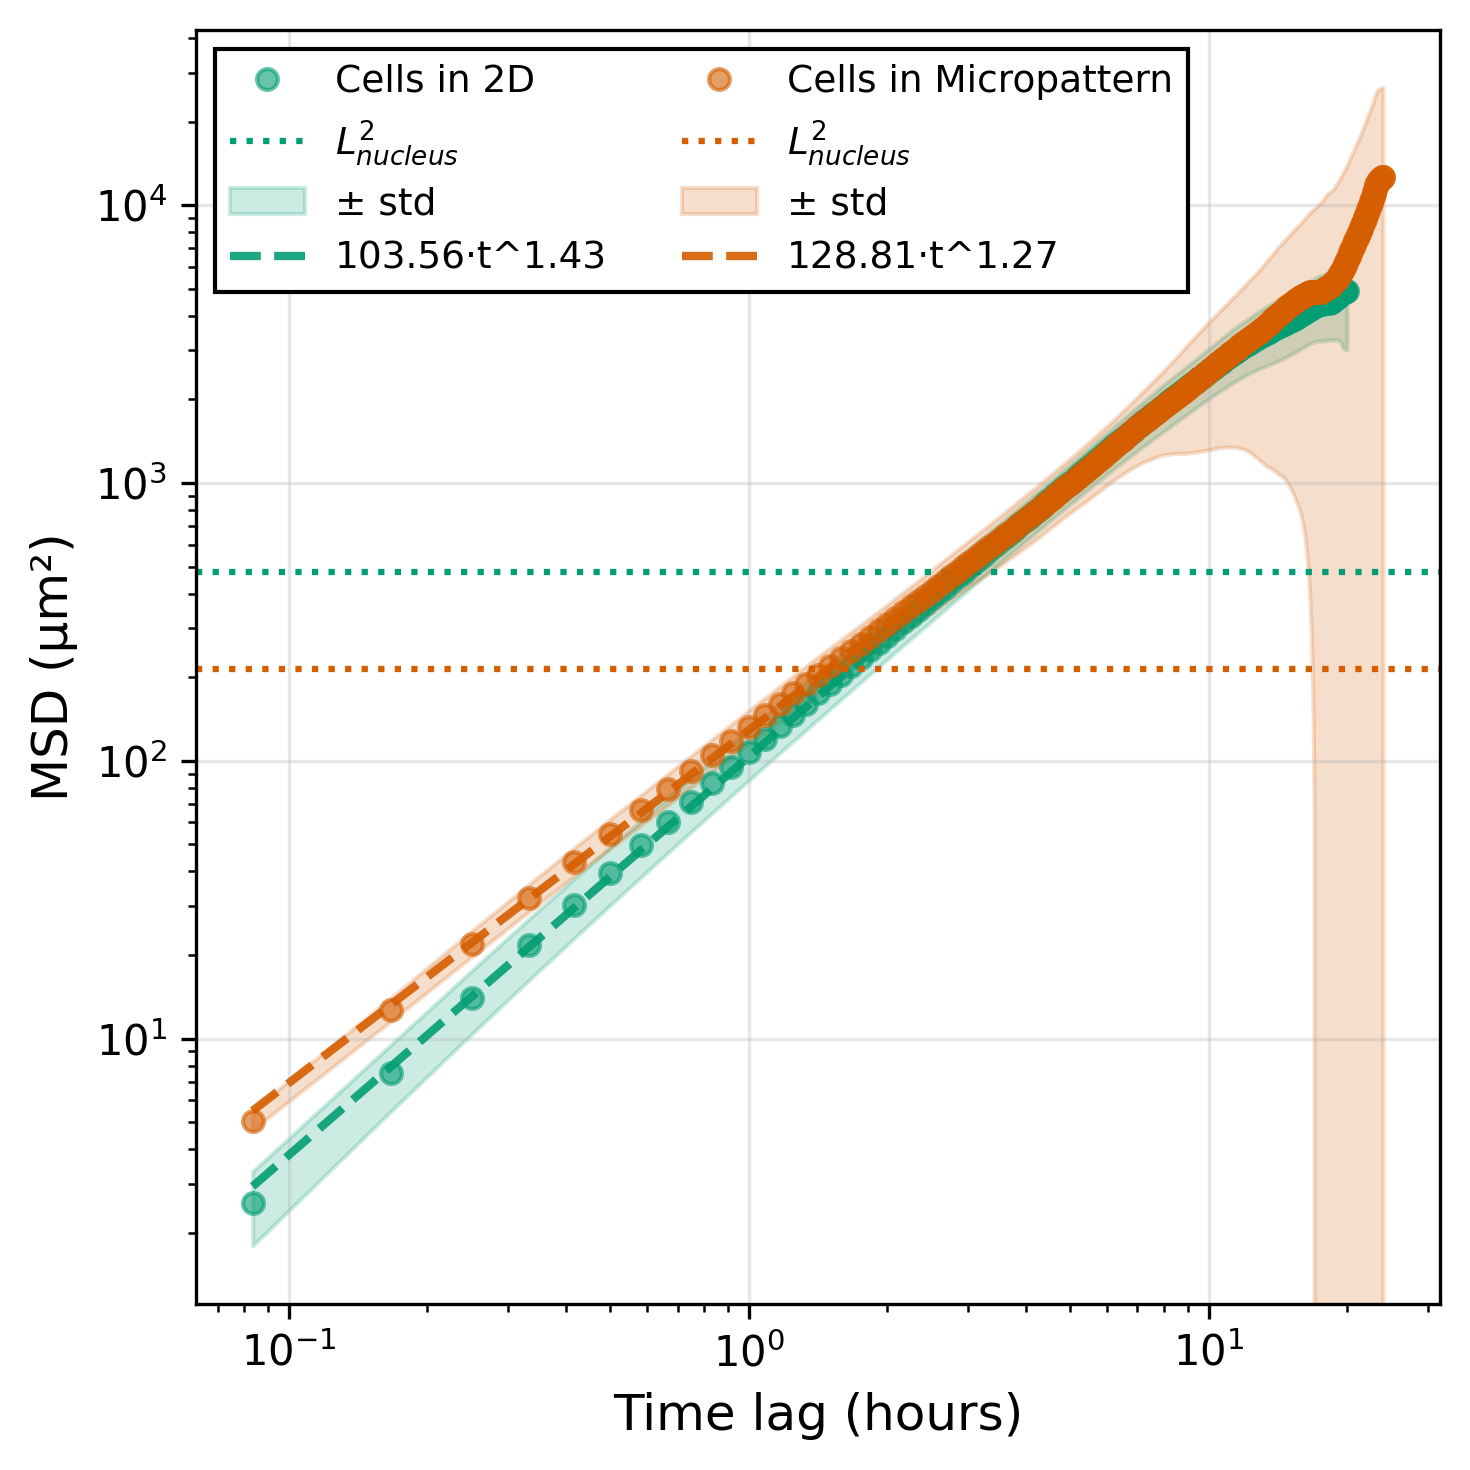

In [27]:
# plot MSD results for selected datasets (x axis in hours, 2-column legend)
datasets_to_plot_msd = [
    # 'manual_tracks_df_2025_01_22_2DFACS',
    'btrack_tracks_df_2025_01_22_2DFACS',
    # 'btrack_tracks_df_2025_09_30_NIH3T3_migration_on_laminin',
    'btrack_tracks_df_2024_09_09'
]

fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
steps_to_fit = 50

for i, name in enumerate(datasets_to_plot_msd):
    msd_df = msd_std_from_position.get(name, None)
    short_name = dataset_metadata.get(name, {}).get('short_name', name)
    if msd_df is None or msd_df['msd_mean'].isna().all():
        print(f"No MSD data for {name}")
        continue

    # interval (minutes) for this dataset
    interval_minutes = dataset_metadata.get(name, {}).get('interval_minutes', 1)

    # convert dt from minutes to hours
    dt_minutes = msd_df['dt'].values
    dt_hours = dt_minutes / 60.0

    # get color from metadata
    color = dataset_metadata.get(name, {}).get('color', 'blue')

    # Plot mean MSD vs time (hours)
    ax.plot(dt_hours, msd_df['msd_mean'], 'o', color=color, markersize=5, label=short_name, alpha=0.6)

    # add a horizontal line at the mean major axis length if available
    if 'nucleus_length_microns' in dataset_metadata.get(name, {}):
        mean_major_axis_length = dataset_metadata[name]['nucleus_length_microns']
        ax.axhline(mean_major_axis_length**2, color=color, linestyle=':', linewidth=1.5,
                   label=f"$L_{{nucleus}}^2$")

    # add std shading (use hours on x-axis)
    if 'msd_std' in msd_df.columns:
        ax.fill_between(dt_hours,
                        msd_df['msd_mean'] - msd_df['msd_std'],
                        msd_df['msd_mean'] + msd_df['msd_std'],
                        color=color, alpha=0.2, label="± std")

    # Using log-log linear regression: log(MSD) = log(A) + α*log(t)
    # limit fit to first `steps_to_fit` steps (in minutes)
    max_dt_minutes = steps_to_fit * interval_minutes
    valid_mask = (msd_df['msd_mean'] > 0) & (~msd_df['msd_mean'].isna()) & (dt_minutes <= max_dt_minutes)
    if valid_mask.sum() > 1:
        # perform fit using t in hours so A reported is for hours
        log_dt = np.log(dt_hours[valid_mask])
        log_msd = np.log(msd_df.loc[valid_mask, 'msd_mean'].values)
        slope, intercept, r_value, p_value, std_err = stats.linregress(log_dt, log_msd)

        A = np.exp(intercept)  # prefactor when t is in hours
        alpha = slope

        # Generate fit line on the subset used for fitting
        fit_x = dt_hours[valid_mask]
        fit_line = A * fit_x**alpha
        # sort for plotting (in case)
        sort_idx = np.argsort(fit_x)
        ax.plot(fit_x[sort_idx], fit_line[sort_idx], linestyle='--', color=color, linewidth=2, alpha=0.9,
                label=f"{A:.2f}·t^{alpha:.2f}")

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time lag (hours)', fontsize=12)
ax.set_ylabel('MSD (μm²)', fontsize=12)
ax.legend(frameon=True, fontsize=9, edgecolor='black', fancybox=False, framealpha=1, ncol=2)
ax.grid(True, alpha=0.3, which='major')
plt.tight_layout()
plt.show()

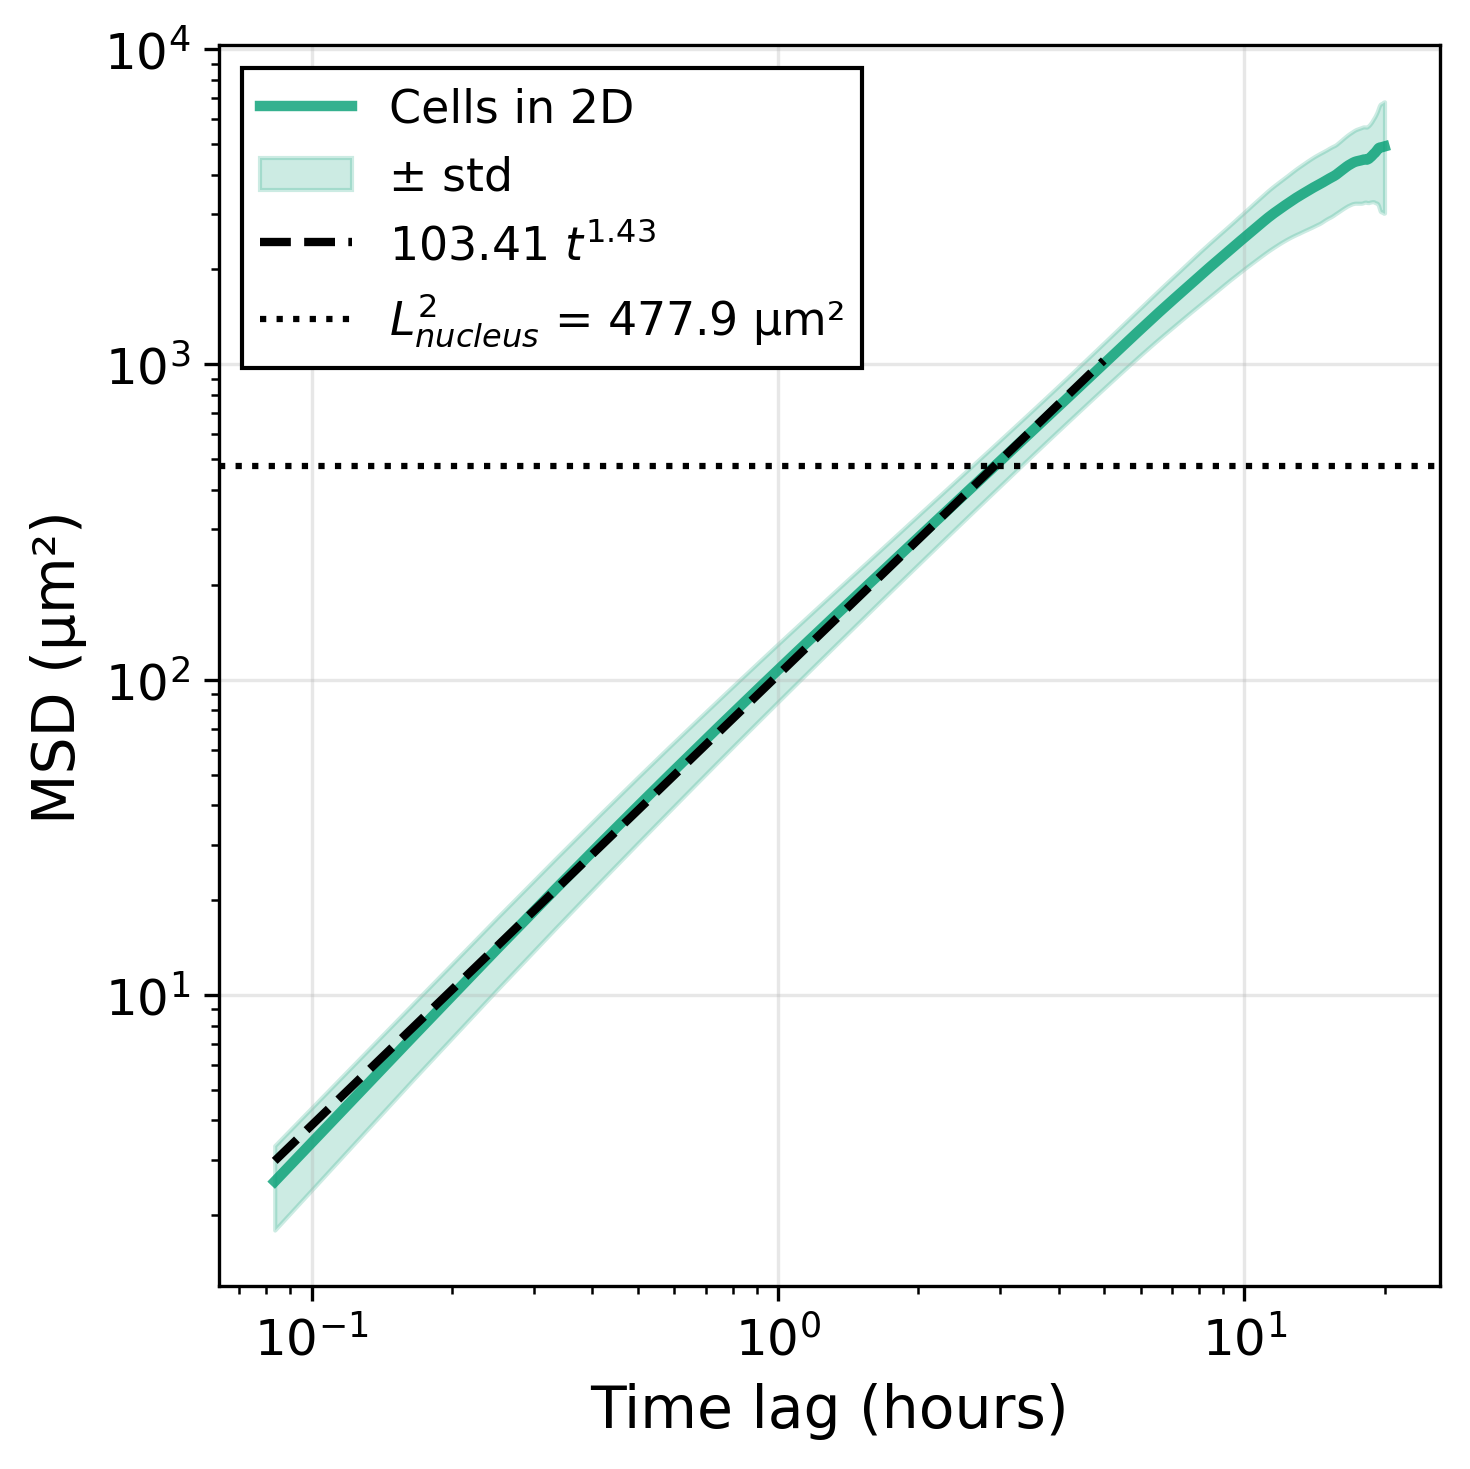

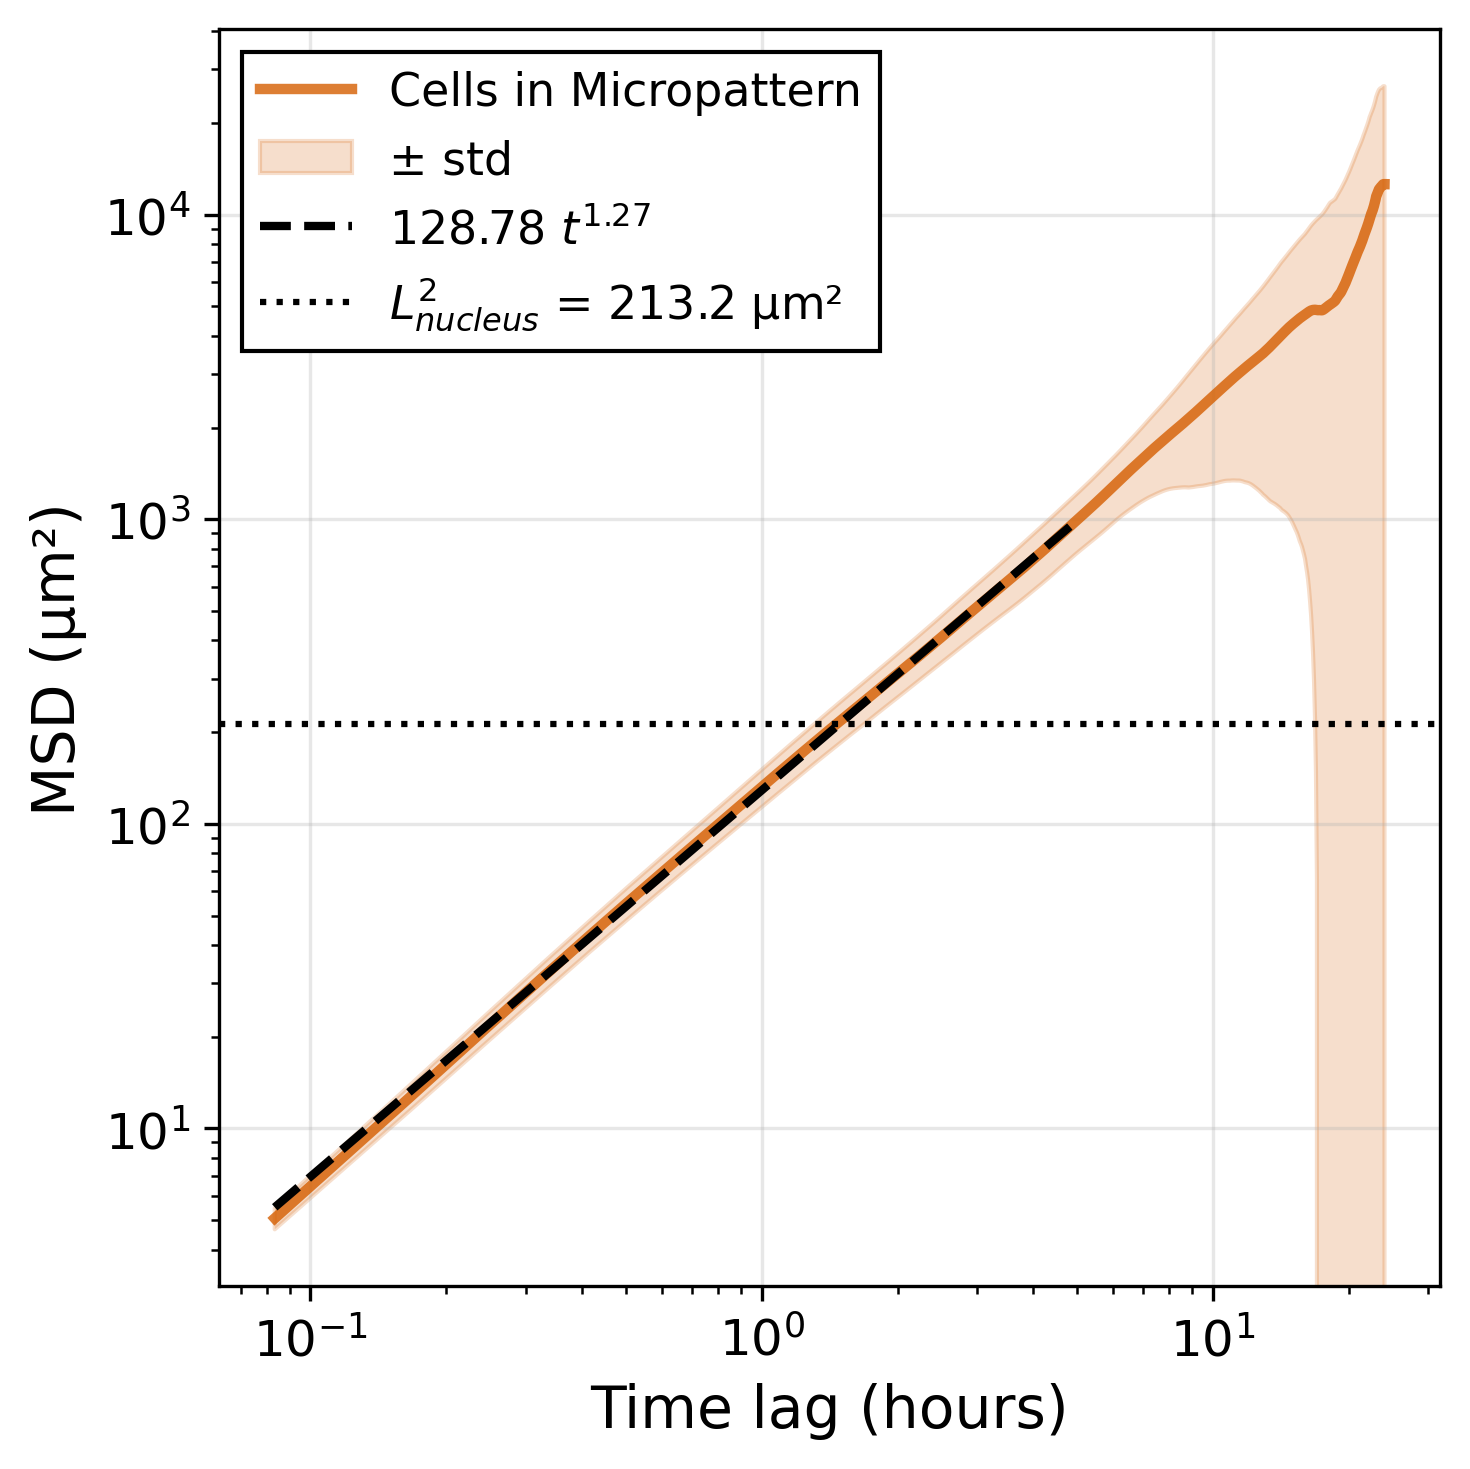

In [28]:
# Split into separate figures per dataset and convert x-axis from minutes to hours
steps_to_fit = 60

for name in datasets_to_plot_msd:
    msd_df = msd_std_from_position.get(name, None)
    short_name = dataset_metadata.get(name, {}).get('short_name', name)
    if msd_df is None or msd_df['msd_mean'].isna().all():
        print(f"No MSD data for {name}")
        continue

    # convert dt from minutes to hours
    interval_min = dataset_metadata.get(name, {}).get('interval_minutes', 1)
    dt_minutes = msd_df['dt'].astype(float)
    dt_hours = dt_minutes / 60.0

    color = dataset_metadata.get(name, {}).get('color', 'blue')

    fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
    ax.plot(dt_hours, msd_df['msd_mean'], '-', color=color, linewidth=2.5, alpha=0.8, label=short_name)

    # add std shading if available
    if 'msd_std' in msd_df.columns:
        ax.fill_between(dt_hours,
                        msd_df['msd_mean'] - msd_df['msd_std'],
                        msd_df['msd_mean'] + msd_df['msd_std'],
                        color=color, alpha=0.2, label="± std")

    # Fit power law on log-log using dt in hours, limiting by steps_to_fit * interval_min
    max_lag_minutes = steps_to_fit * interval_min
    valid_mask = (msd_df['msd_mean'] > 0) & (~msd_df['msd_mean'].isna()) & (dt_minutes <= max_lag_minutes)
    if valid_mask.sum() > 1:
        log_dt = np.log(dt_hours.loc[valid_mask])
        log_msd = np.log(msd_df.loc[valid_mask, 'msd_mean'])
        slope, intercept, r_value, p_value, std_err = stats.linregress(log_dt, log_msd)

        A = np.exp(intercept)
        alpha = slope

        fit_line = A * dt_hours**alpha
        # plot fit only in the range used for fitting
        fit_mask = dt_minutes <= max_lag_minutes
        ax.plot(dt_hours[fit_mask], fit_line[fit_mask], linestyle='--', color='k', linewidth=2,
                label=rf"{A:.2f} $t^{{{alpha:.2f}}}$")

    # add nucleus length squared line if available
    nucleus_length = dataset_metadata.get(name, {}).get('nucleus_length_microns', None)
    if nucleus_length is not None:
        ax.axhline(nucleus_length**2, color='k', linestyle=':', linewidth=1.5,
                   label=f'$L_{{nucleus}}^2$ = {nucleus_length**2:.1f} μm²')

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Time lag (hours)', fontsize=14)
    ax.set_ylabel('MSD (μm²)', fontsize=14)
    # ax.set_title(short_name, fontsize=14)
    ax.legend(frameon=True, fontsize=11, edgecolor='black', fancybox=False, framealpha=1)
    ax.grid(True, alpha=0.3, which='major')
    ax.tick_params(axis='both', which='major', labelsize=12)

    plt.tight_layout()
    plt.show()

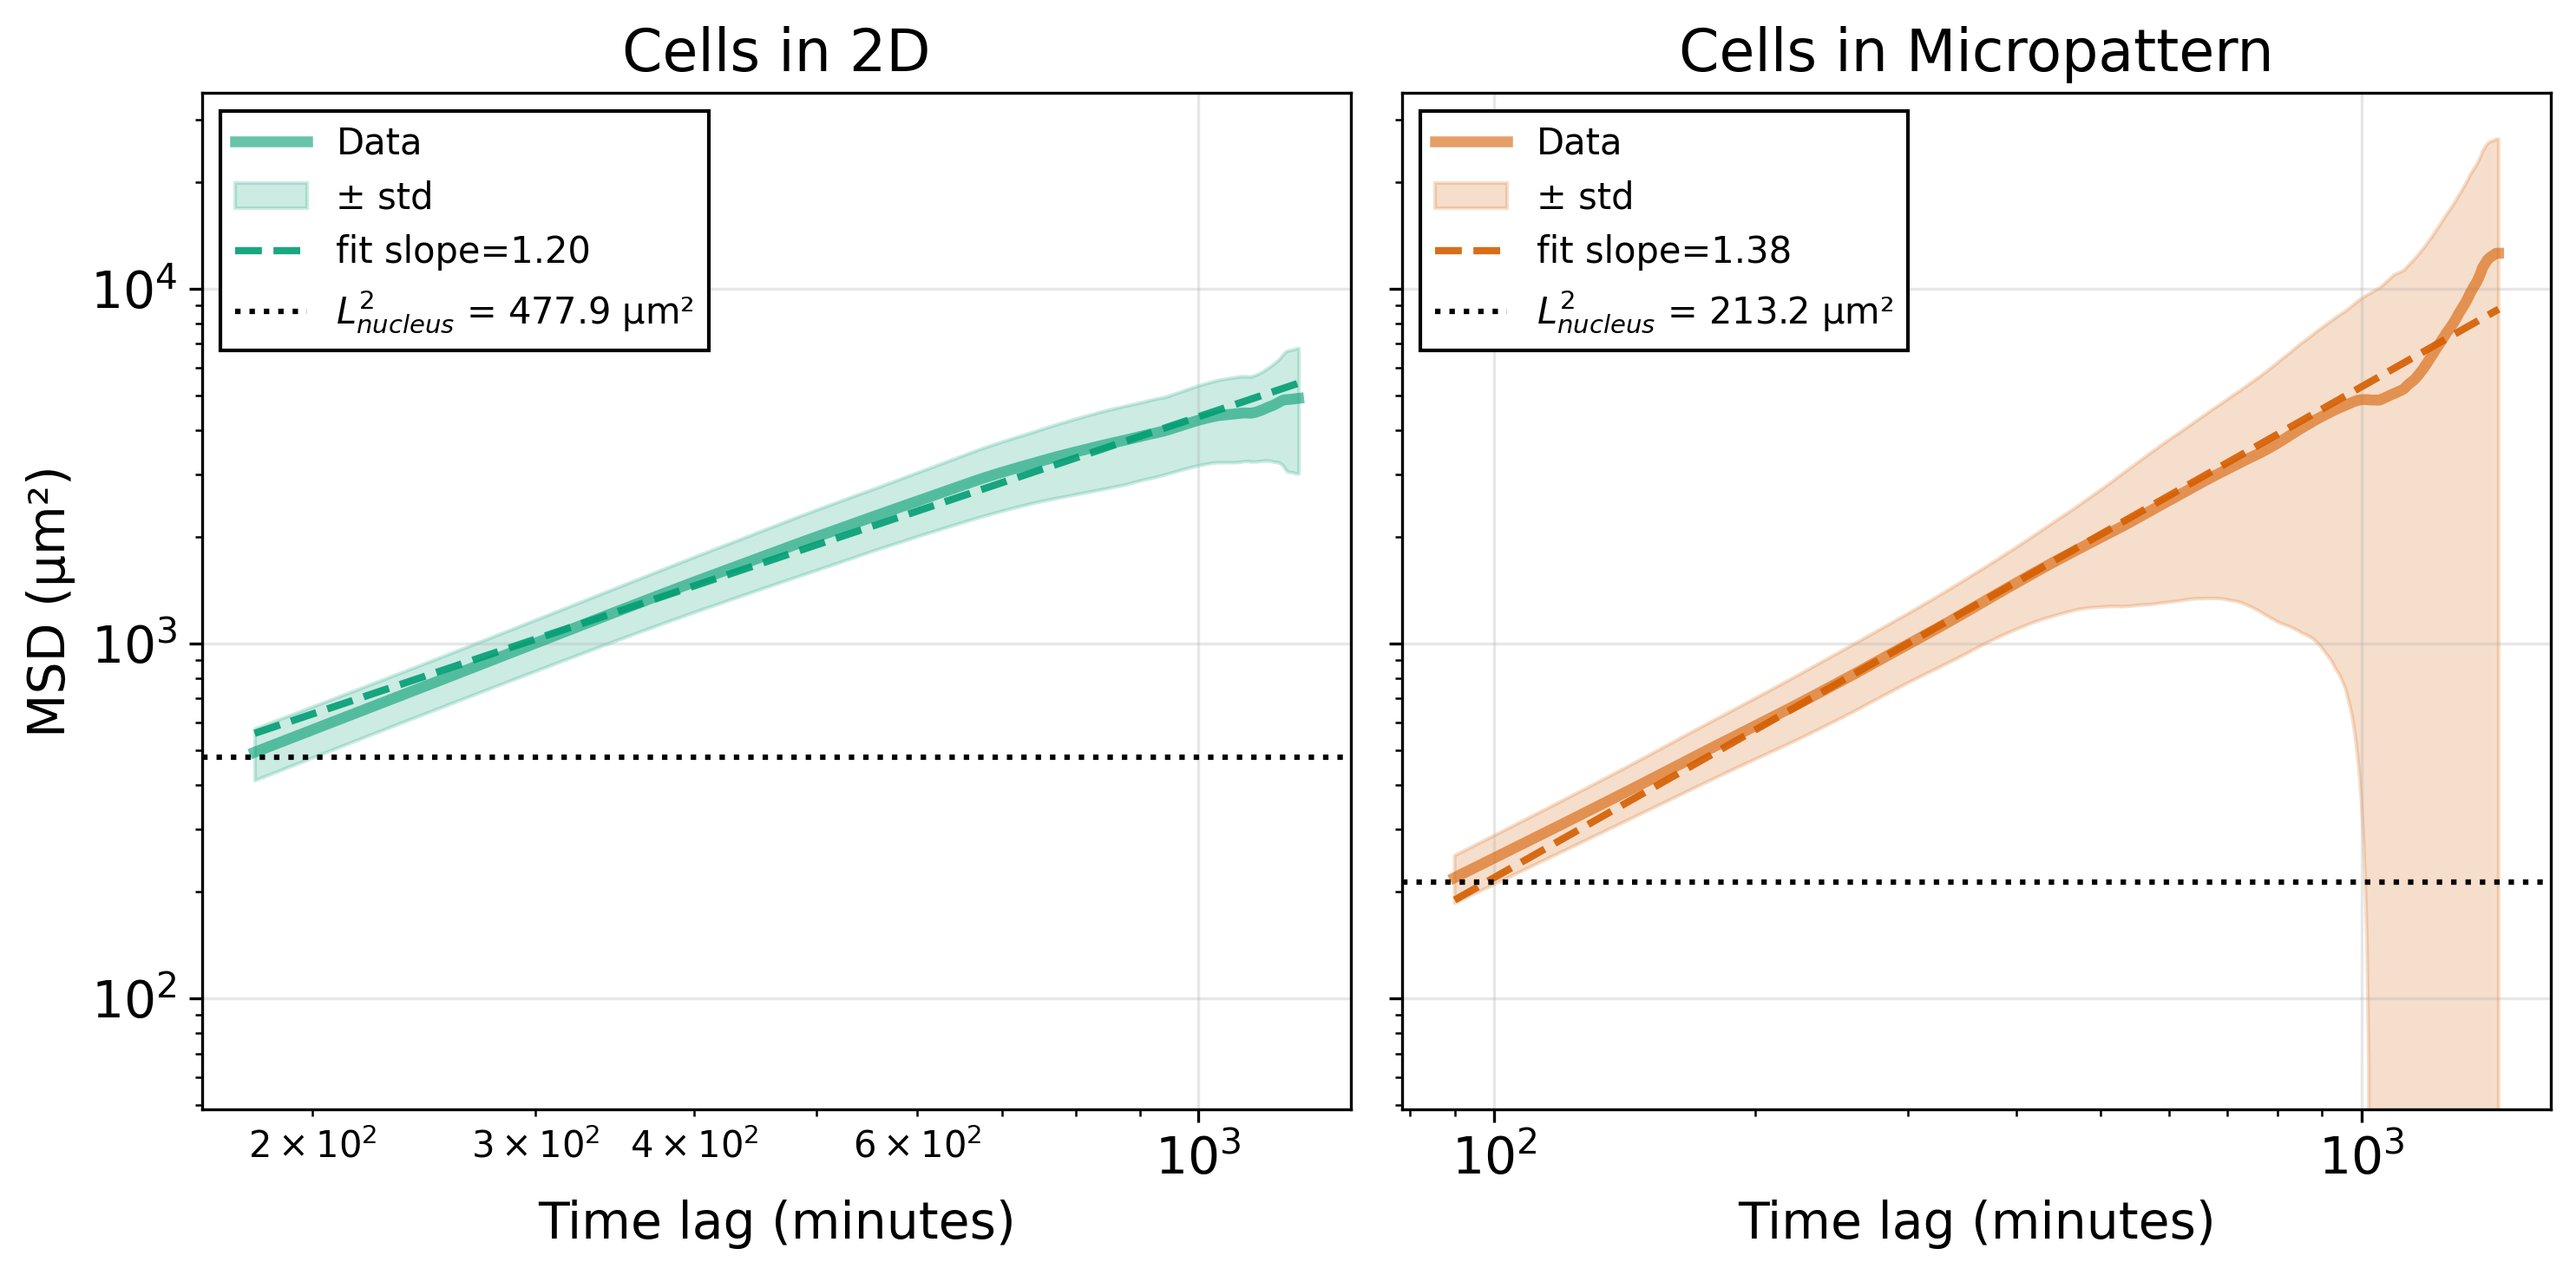

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=300, sharey=True)
for i, name in enumerate(datasets_to_plot_msd):
    ax = axes[i]
    msd_df = msd_std_from_position.get(name, None)
    short_name = dataset_metadata.get(name, {}).get('short_name', name)
    if msd_df is None or msd_df['msd_mean'].isna().all():
        print(f"No MSD data for {name}")
        continue

    color = dataset_metadata.get(name, {}).get('color', 'blue')
    nucleus_length = dataset_metadata.get(name, {}).get('nucleus_length_microns', None)
    if nucleus_length is not None:
        nucleus_length_sq = nucleus_length ** 2
        # Filter data above nucleus length squared
        filtered_mask = msd_df['msd_mean'] >= nucleus_length_sq
        filtered_msd_df = msd_df[filtered_mask]

        # Plot mean MSD
        ax.plot(filtered_msd_df['dt'], filtered_msd_df['msd_mean'], '-', color=color, linewidth=3, alpha=0.6, label="Data")

        # add std shading
        if 'msd_std' in filtered_msd_df.columns:
            ax.fill_between(filtered_msd_df['dt'],
                            filtered_msd_df['msd_mean'] - filtered_msd_df['msd_std'],
                            filtered_msd_df['msd_mean'] + filtered_msd_df['msd_std'],
                            color=color, alpha=0.2, label="± std")

        # Fit a line to the log-log data
        valid_mask = (filtered_msd_df['msd_mean'] > 0) & (~filtered_msd_df['msd_mean'].isna())
        if valid_mask.sum() > 1:
            log_dt = np.log(filtered_msd_df.loc[valid_mask, 'dt'])
            log_msd = np.log(filtered_msd_df.loc[valid_mask, 'msd_mean'])
            slope, intercept, r_value, p_value, std_err = stats.linregress(log_dt, log_msd)
            fit_line = np.exp(intercept) * filtered_msd_df['dt']**slope
            ax.plot(filtered_msd_df['dt'], fit_line, linestyle='--', color=color, linewidth=2, alpha=0.9,
                    label=f"fit slope={slope:.2f}")

        ax.axhline(nucleus_length_sq, color='k', linestyle=':', linewidth=1.5,
                   label=f'$L_{{nucleus}}^2$ = {nucleus_length_sq:.1f} μm²')

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Time lag (minutes)', fontsize=14)
    if i == 0:
        ax.set_ylabel('MSD (μm²)', fontsize=14)
    ax.legend(frameon=True, fontsize=10, edgecolor='black', fancybox=False, framealpha=1)
    ax.grid(True, alpha=0.3, which='major')
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(short_name, fontsize=16)

plt.tight_layout()
plt.show()

## DACF

### Calculation

In [30]:
# # cacculate DACF for each dataset
# autocorr_results = {}
# for name, df in tracks_dataset.items():
#     autocorr_results[name] = calculate_autocorrelation(df, directional=True)
#     print(f"Calculated DACF for {name}")

# # Export autocorrelation results to CSV with columns: tau, value, sigma, dataset
# for name, acorr_df in autocorr_results.items():
#     acorr_df_export = acorr_df.rename(columns={
#         'dacf': 'value',
#         'dacf_std': 'sigma'
#     })[['dt', 'value', 'sigma']].copy()
#     acorr_df_export['dataset'] = name
#     acorr_df_export.to_csv(f'dacf_{name}.csv', index=False)
#     print(f"Exported DACF for {name} to dacf_{name}.csv")

### Plot

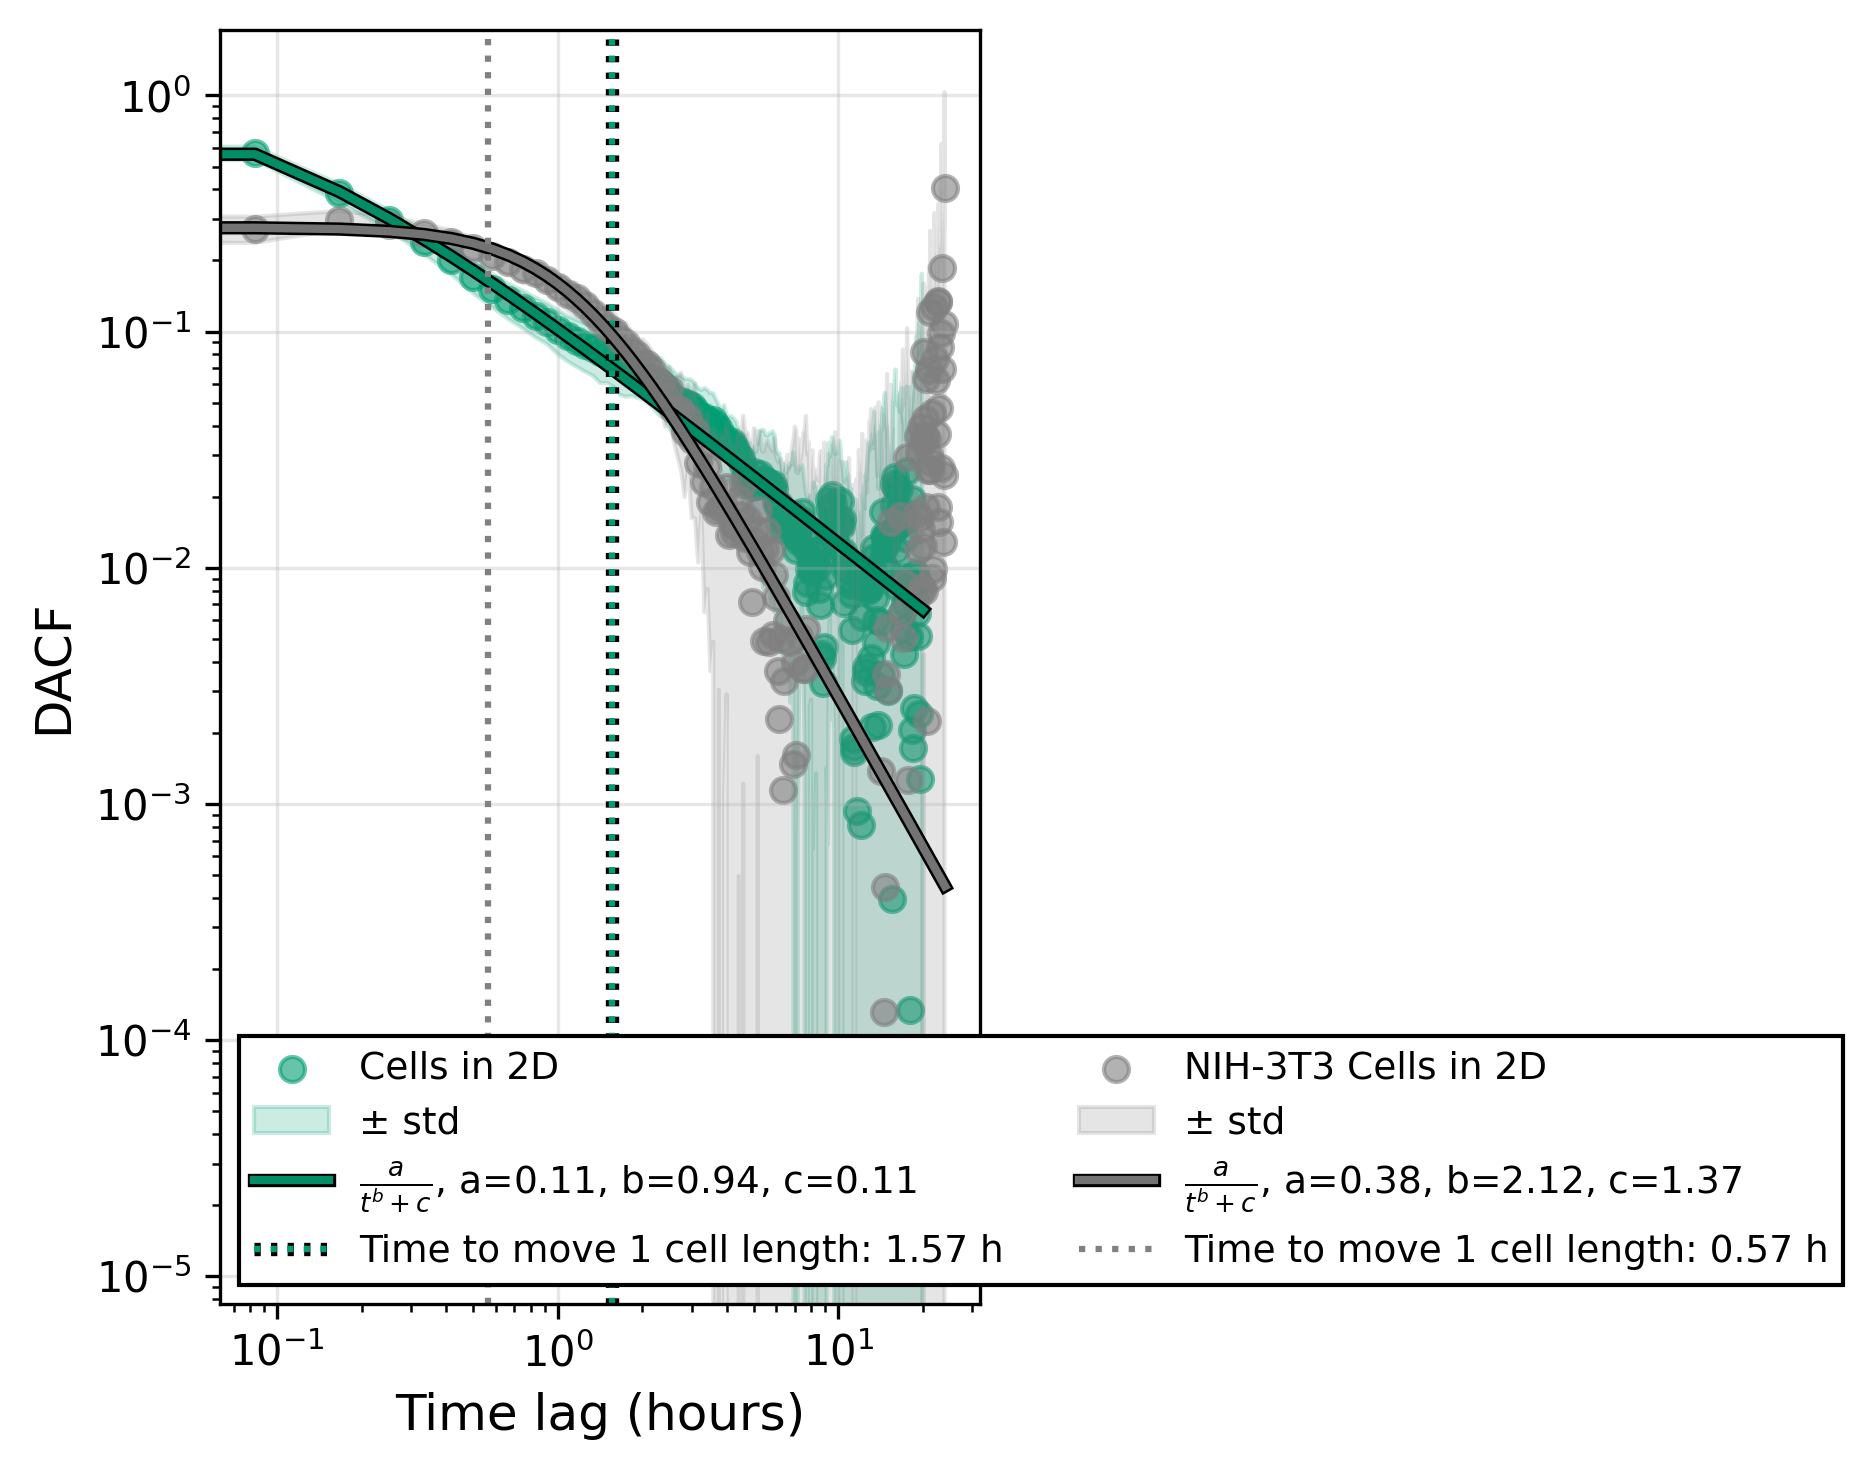

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.patheffects as pe  # <<-- for the black outline


# plot DACF results for selected datasets (same style as the MSD plot)
datasets_to_plot_dacf = [
    'btrack_tracks_df_2025_01_22_2DFACS',
    'btrack_tracks_df_2025_09_30_NIH3T3_migration_on_laminin'
]

fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

for i, name in enumerate(datasets_to_plot_dacf):
    acorr_df = dacf_std_from_position.get(name, None)
    short_name = dataset_metadata.get(name, {}).get('short_name', name)

    if acorr_df is None or acorr_df['dacf_mean'].isna().all():
        print(f"No DACF data for {name}")
        continue

    # interval (minutes) for this dataset (fallback to 1 min if missing)
    interval_minutes = dataset_metadata.get(name, {}).get('interval_minutes', 1)

    # convert dt from minutes to hours for plotting
    dt_minutes = acorr_df['dt'].values
    dt_hours = dt_minutes / 60.0

    # get color from metadata
    color = dataset_metadata.get(name, {}).get('color', 'blue')

    # Plot mean DACF vs time (hours) using markers like MSD plot
    ax.scatter(dt_hours, acorr_df['dacf_mean'], color=color,
               marker='o', label=short_name, alpha=0.6)

    # add std shading (use hours on x-axis)
    if 'dacf_std' in acorr_df.columns:
        ax.fill_between(dt_hours,
                        acorr_df['dacf_mean'] - acorr_df['dacf_std'],
                        acorr_df['dacf_mean'] + acorr_df['dacf_std'],
                        color=color, alpha=0.2, label="± std")

    # Fit a power-law-like decay a/(t^b + c)
    # Exclude non-finite and zero-hour points for fitting
    valid_mask = (acorr_df['dacf_mean'] > -1) & (~acorr_df['dacf_mean'].isna()) & (dt_hours > 0)

    if valid_mask.sum() > 1:
        def power_law(t, a, b, c):
            return a / (t**b + c)

        try:
            popt, pcov = curve_fit(power_law,
                                   dt_hours[valid_mask],
                                   acorr_df.loc[valid_mask, 'dacf_mean'].values,
                                   maxfev=10000)
            fit_x = dt_hours
            fit_line = power_law(fit_x, *popt)
            ax.plot(fit_x, fit_line, linestyle='-', color=color, linewidth=2, alpha=0.9,
                    label=rf"$\frac{{a}}{{t^{{b}}+c}}$, a={popt[0]:.2f}, b={popt[1]:.2f}, c={popt[2]:.2f}", )
            stroke_width = 3.2
            for line in ax.get_lines():
                line.set_path_effects([pe.Stroke(linewidth=stroke_width, foreground='black'),
                                       pe.Normal()])
        except Exception as e:
            print(f"Power-law fit failed for {name}: {e}")

    # Add a vertical line at the average time it takes to move one cell length (in hours)
    df = tracks_dataset.get(name, None)
    if df is not None and 'v_micron_per_hour' in df.columns:
        mean_velocity = df['v_micron_per_hour'].mean()
        nucleus_length = dataset_metadata.get(name, {}).get('nucleus_length_microns', None)
        if mean_velocity > 0 and nucleus_length is not None:
            time_to_move_one_length_hours = nucleus_length / mean_velocity
            ax.axvline(time_to_move_one_length_hours, color=color, linestyle=':',
                       linewidth=1.5,
                       label=f"Time to move 1 cell length: {time_to_move_one_length_hours:.2f} h")

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time lag (hours)', fontsize=12)
ax.set_ylabel('DACF', fontsize=12)

# legend styled like the MSD plot (boxed, 2 columns)
ax.legend(frameon=True, fontsize=9, edgecolor='black', fancybox=False, framealpha=1, ncol=2)

ax.grid(True, alpha=0.3, which='major')
plt.tight_layout()
plt.show()


In [32]:
df

file   ID          track_id     t  normalized_time  step  \
0      tracks_00.h5    1    tracks_00.h5_1     0                0     0   
1      tracks_00.h5    1    tracks_00.h5_1     5                5     1   
2      tracks_00.h5    1    tracks_00.h5_1    10               10     2   
3      tracks_00.h5    1    tracks_00.h5_1    15               15     3   
4      tracks_00.h5    1    tracks_00.h5_1    20               20     4   
...             ...  ...               ...   ...              ...   ...   
78854  tracks_09.h5  984  tracks_09.h5_984  1235              265    53   
78855  tracks_09.h5  984  tracks_09.h5_984  1240              270    54   
78856  tracks_09.h5  984  tracks_09.h5_984  1245              275    55   
78857  tracks_09.h5  984  tracks_09.h5_984  1250              280    56   
78858  tracks_09.h5  984  tracks_09.h5_984  1255              285    57   

         x_pixels     y_pixels   x_microns   y_microns  ...         v  \
0      2274.00000   192.000000  727.680000   61.440000  ...       NaN   
1      2270.00000   196.000000  726.400000   62.720000  ...  0.362039   
2      2272.00000   192.000000  727.040000   61.440000  ...  0.286217   
3      2269.00000   195.000000  726.080000   62.400000  ...  0.271529   
4      2273.00000   197.000000  727.360000   63.040000  ...  0.286217   
...           ...          ...         ...         ...  ...       ...   
78854   172.21698  1564.217041   55.109434  500.549453  ...  0.194395   
78855   182.00000  1554.000000   58.240000  497.280000  ...  0.905313   
78856   188.00000  1540.000000   60.160000  492.800000  ...  0.974819   
78857   184.00000  1526.000000   58.880000  488.320000  ...  0.931854   
78858   180.00000  1517.000000   57.600000  485.440000  ...  0.630327   

       v_micron_per_hour       v_x       v_y  angle_relative_to_common_axis  \
0                    NaN  0.000000  0.000000                       0.000000   
1              21.722320 -0.256000  0.256000                       2.356194   
2              17.173002  0.128000 -0.256000                      -1.107149   
3              16.291740 -0.192000  0.192000                       2.356194   
4              17.173002  0.256000  0.128000                       0.463648   
...                  ...       ...       ...                            ...   
78854          11.663681  0.077887 -0.178109                      -1.158556   
78855          54.318752  0.626113 -0.653891                      -0.807096   
78856          58.489137  0.384000 -0.896000                      -1.165905   
78857          55.911244 -0.256000 -0.896000                      -1.849096   
78858          37.819614 -0.256000 -0.576000                      -1.989021   

       prev_x_microns  prev_y_microns  primary_axis  \
0                 NaN             NaN      2.785542   
1          727.680000       61.440000      2.785542   
2          726.400000       62.720000      2.785542   
3          727.040000       61.440000      2.785542   
4          726.080000       62.400000      2.785542   
...               ...             ...           ...   
78854       54.720000      501.440000     -1.459068   
78855       55.109434      500.549453     -1.459068   
78856       58.240000      497.280000     -1.459068   
78857       60.160000      492.800000     -1.459068   
78858       58.880000      488.320000     -1.459068   

       angle_relative_to_primary_axis  angle_to_center  
0                           -2.785542        -0.686853  
1                           -0.429347        -0.686489  
2                            2.390495        -0.687680  
3                           -0.429347        -0.687409  
4                           -2.321894        -0.684742  
...                               ...              ...  
78854                        0.300512         2.730467  
78855                        0.651973         2.736007  
78856                        0.293164         2.746784  
78857                       -0.390028         2.761658  


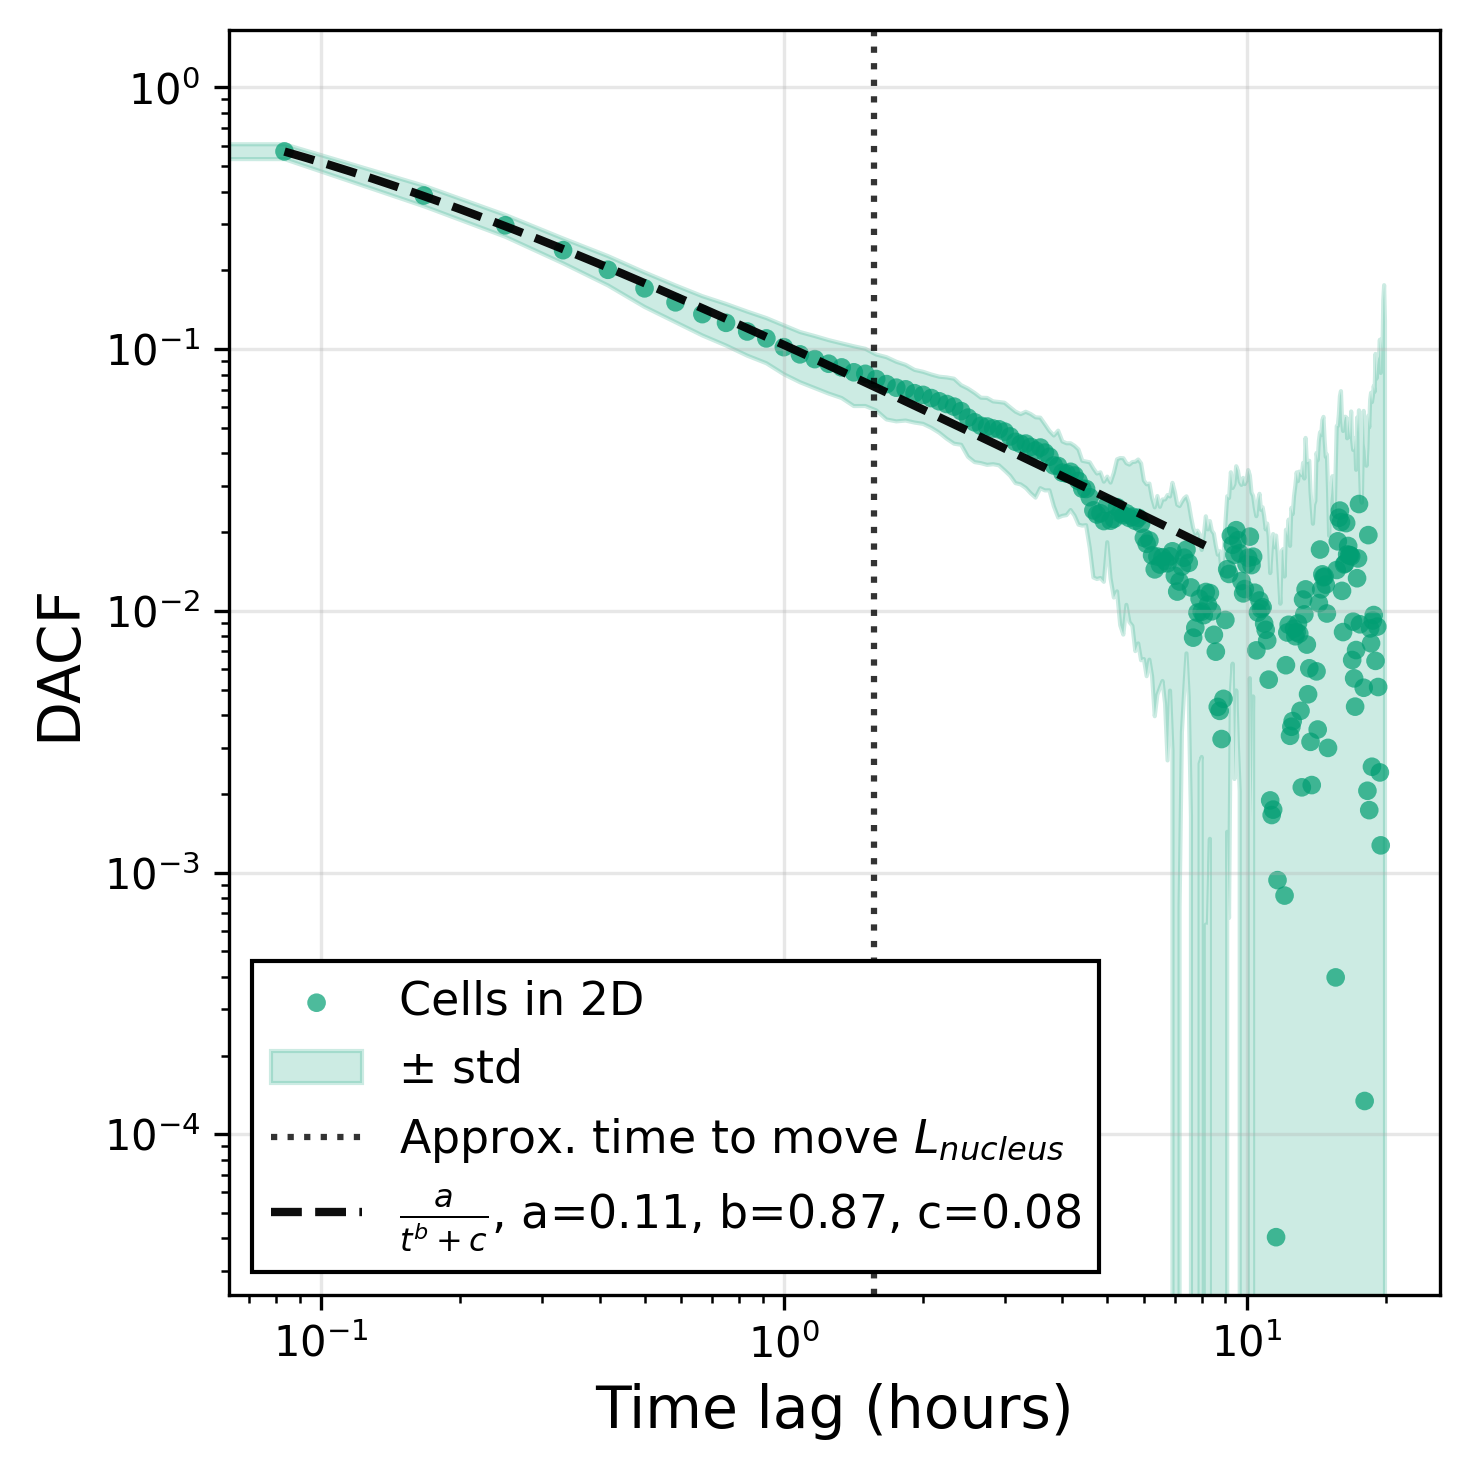

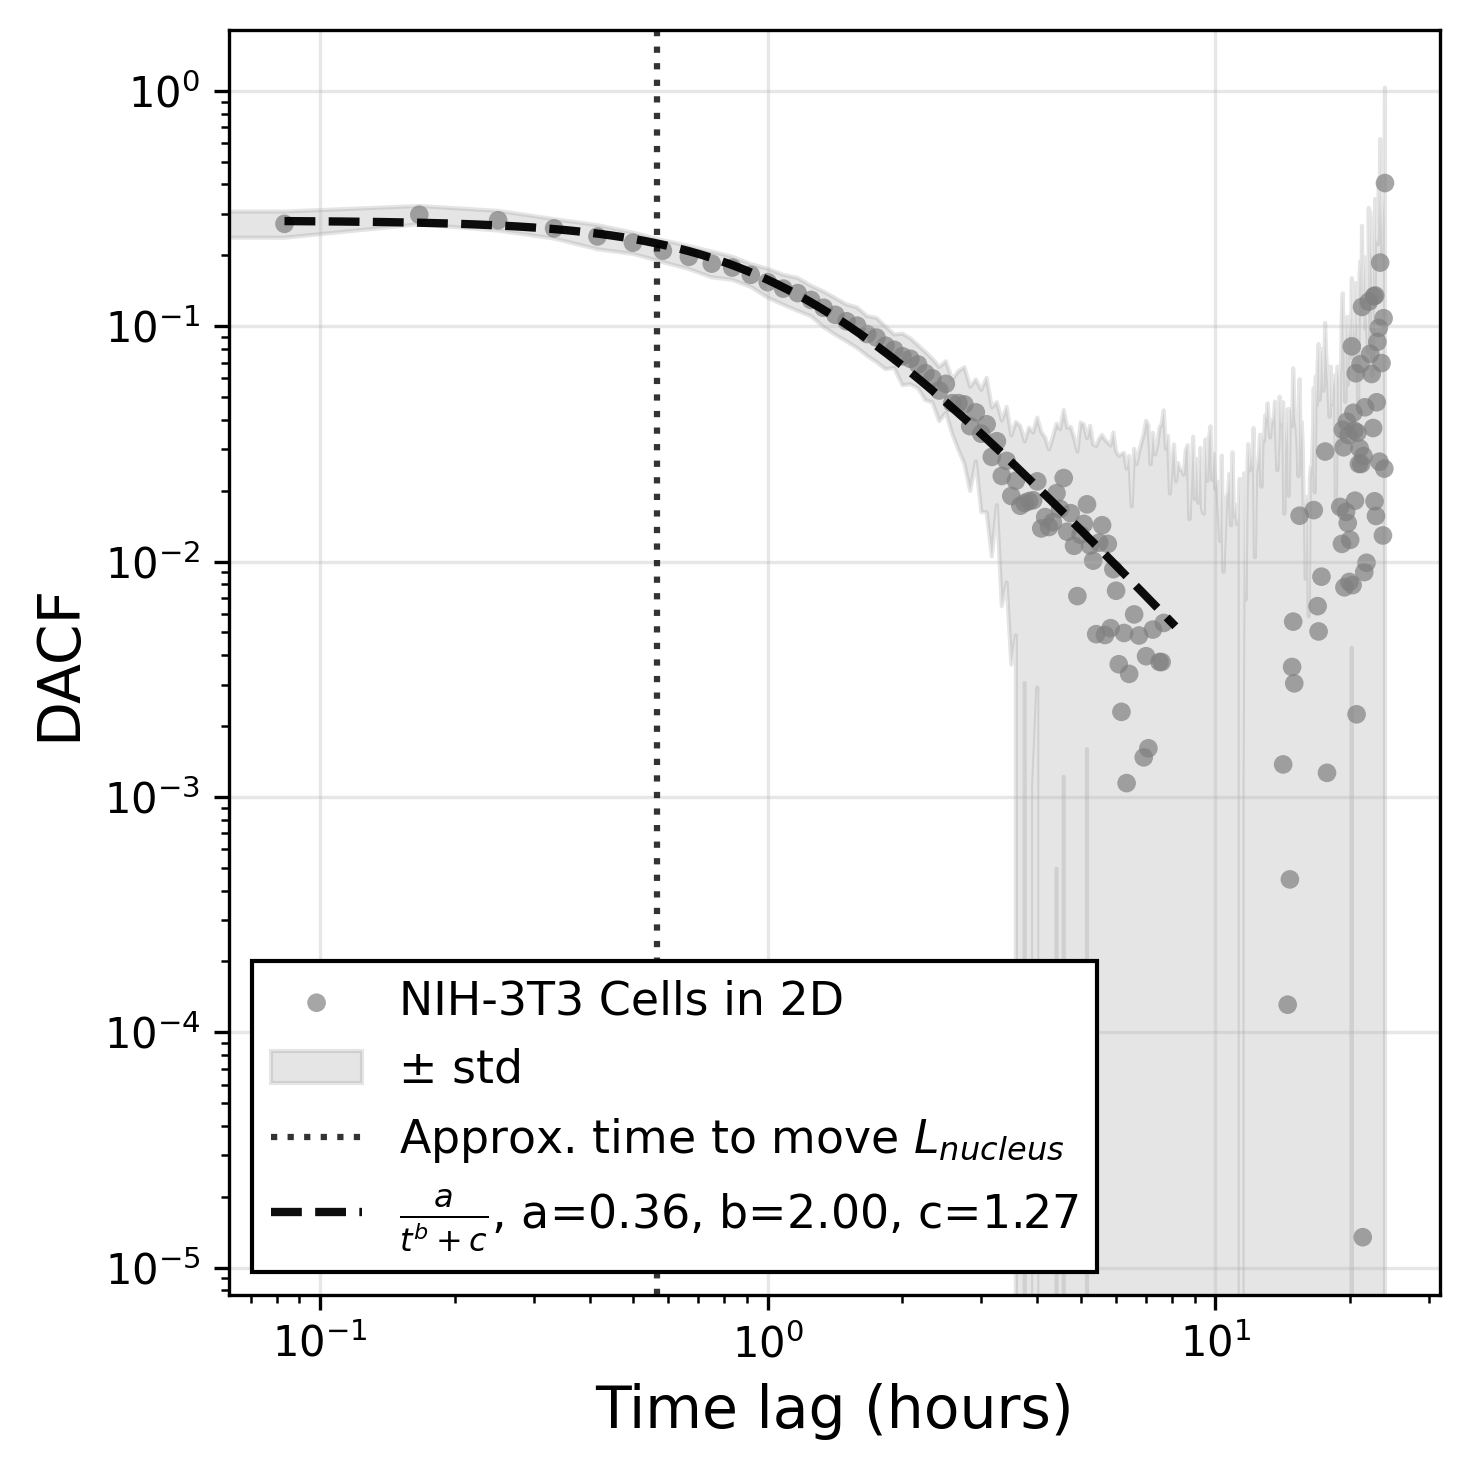

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.patheffects as pe

# datasets and fit parameter (lag units)
datasets_to_plot_dacf = [
    'btrack_tracks_df_2025_01_22_2DFACS',
    'btrack_tracks_df_2025_09_30_NIH3T3_migration_on_laminin'
]
steps_to_fit = 100  # in lag units (frames / steps)

for name in datasets_to_plot_dacf:
    acorr_df = dacf_std_from_position.get(name, None)
    short_name = dataset_metadata.get(name, {}).get('short_name', name)
    if acorr_df is None or acorr_df['dacf_mean'].isna().all():
        print(f"No DACF data for {name}")
        continue

    # interval (minutes) for this dataset (fallback to 1)
    interval_minutes = dataset_metadata.get(name, {}).get('interval_minutes', 1)
    max_dt_minutes = steps_to_fit * interval_minutes
    max_dt_hours = max_dt_minutes / 60.0

    # convert dt from minutes to hours (ensure float)
    dt_minutes = acorr_df['dt'].astype(float).values
    dt_hours = dt_minutes / 60.0

    fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
    color = dataset_metadata.get(name, {}).get('color', 'blue')

    # scatter
    ax.scatter(dt_hours, acorr_df['dacf_mean'], color=color, label=short_name,
               alpha=0.7, s=20, edgecolor='none')

    # shading for std if present (only label once per figure)
    if 'dacf_std' in acorr_df.columns:
        ax.fill_between(dt_hours,
                        acorr_df['dacf_mean'] - acorr_df['dacf_std'],
                        acorr_df['dacf_mean'] + acorr_df['dacf_std'],
                        color=color, alpha=0.2, label="± std")

    # approximate time to move one nucleus length (plot in hours)
    df = tracks_dataset.get(name, None)
    nucleus_length = dataset_metadata.get(name, {}).get('nucleus_length_microns', None)
    if nucleus_length is not None and df is not None and 'v_micron_per_hour' in df.columns:
        mean_velocity = df['v_micron_per_hour'].mean()
        if mean_velocity > 0:
            time_to_move_one_cell_hours = nucleus_length / mean_velocity  # in hours
            ax.axvline(time_to_move_one_cell_hours, color='k', linestyle=':', linewidth=1.5, alpha=0.8,
                       label=f'Approx. time to move $L_{{nucleus}}$')

    # Fit a power-law decay to the DACF using dt in hours, restricting by lag (steps_to_fit)
    # Build mask for valid values and within the allowed lag window
    valid_mask = (acorr_df['dacf_mean'] > -1) & (~acorr_df['dacf_mean'].isna()) & (dt_hours > 0)
    # Also restrict to dt <= max_dt_hours (converted from steps_to_fit)
    fit_mask = valid_mask & (dt_hours <= max_dt_hours)

    if fit_mask.sum() > 1:
        def power_law(t, a, b, c):
            return a / (t**b + c)

        try:
            x_fit = dt_hours[fit_mask]
            y_fit = acorr_df.loc[fit_mask, 'dacf_mean'].values

            popt, pcov = curve_fit(power_law, x_fit, y_fit, maxfev=10000)
            # Create smooth x for plotting the fitted curve:
            x_plot_min = np.min(x_fit)
            x_plot_max = np.max(dt_hours[np.isfinite(dt_hours)])
            x_plot = np.logspace(np.log10(x_plot_min), np.log10(x_plot_max), 200)

            fit_line = power_law(x_plot, *popt)

            # draw colored fit line only within the fitted range
            label_text = rf"$\frac{{a}}{{t^{{b}}+c}}$, a={popt[0]:.2f}, b={popt[1]:.2f}, c={popt[2]:.2f}"
            mask_fit_range = (x_plot >= x_fit.min()) & (x_plot <= x_fit.max())
            if mask_fit_range.any():
                line, = ax.plot(x_plot[mask_fit_range], fit_line[mask_fit_range],
                                linestyle='--', color='k', linewidth=2, alpha=0.95,
                                label=label_text)

        except Exception as e:
            print(f"Power-law fit failed for {name}: {e}")
    else:
        # helpful debug message when there's not enough data within steps_to_fit window
        print(f"Not enough valid points to fit for {name} within steps_to_fit={steps_to_fit} (max dt = {max_dt_hours:.2f} h)")

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Time lag (hours)', fontsize=14)
    ax.set_ylabel('DACF', fontsize=14)
    ax.legend(frameon=True, fontsize=11, edgecolor='black', fancybox=False, framealpha=1, loc='lower left')
    ax.grid(True, alpha=0.3, which='major')
    plt.tight_layout()
    plt.show()


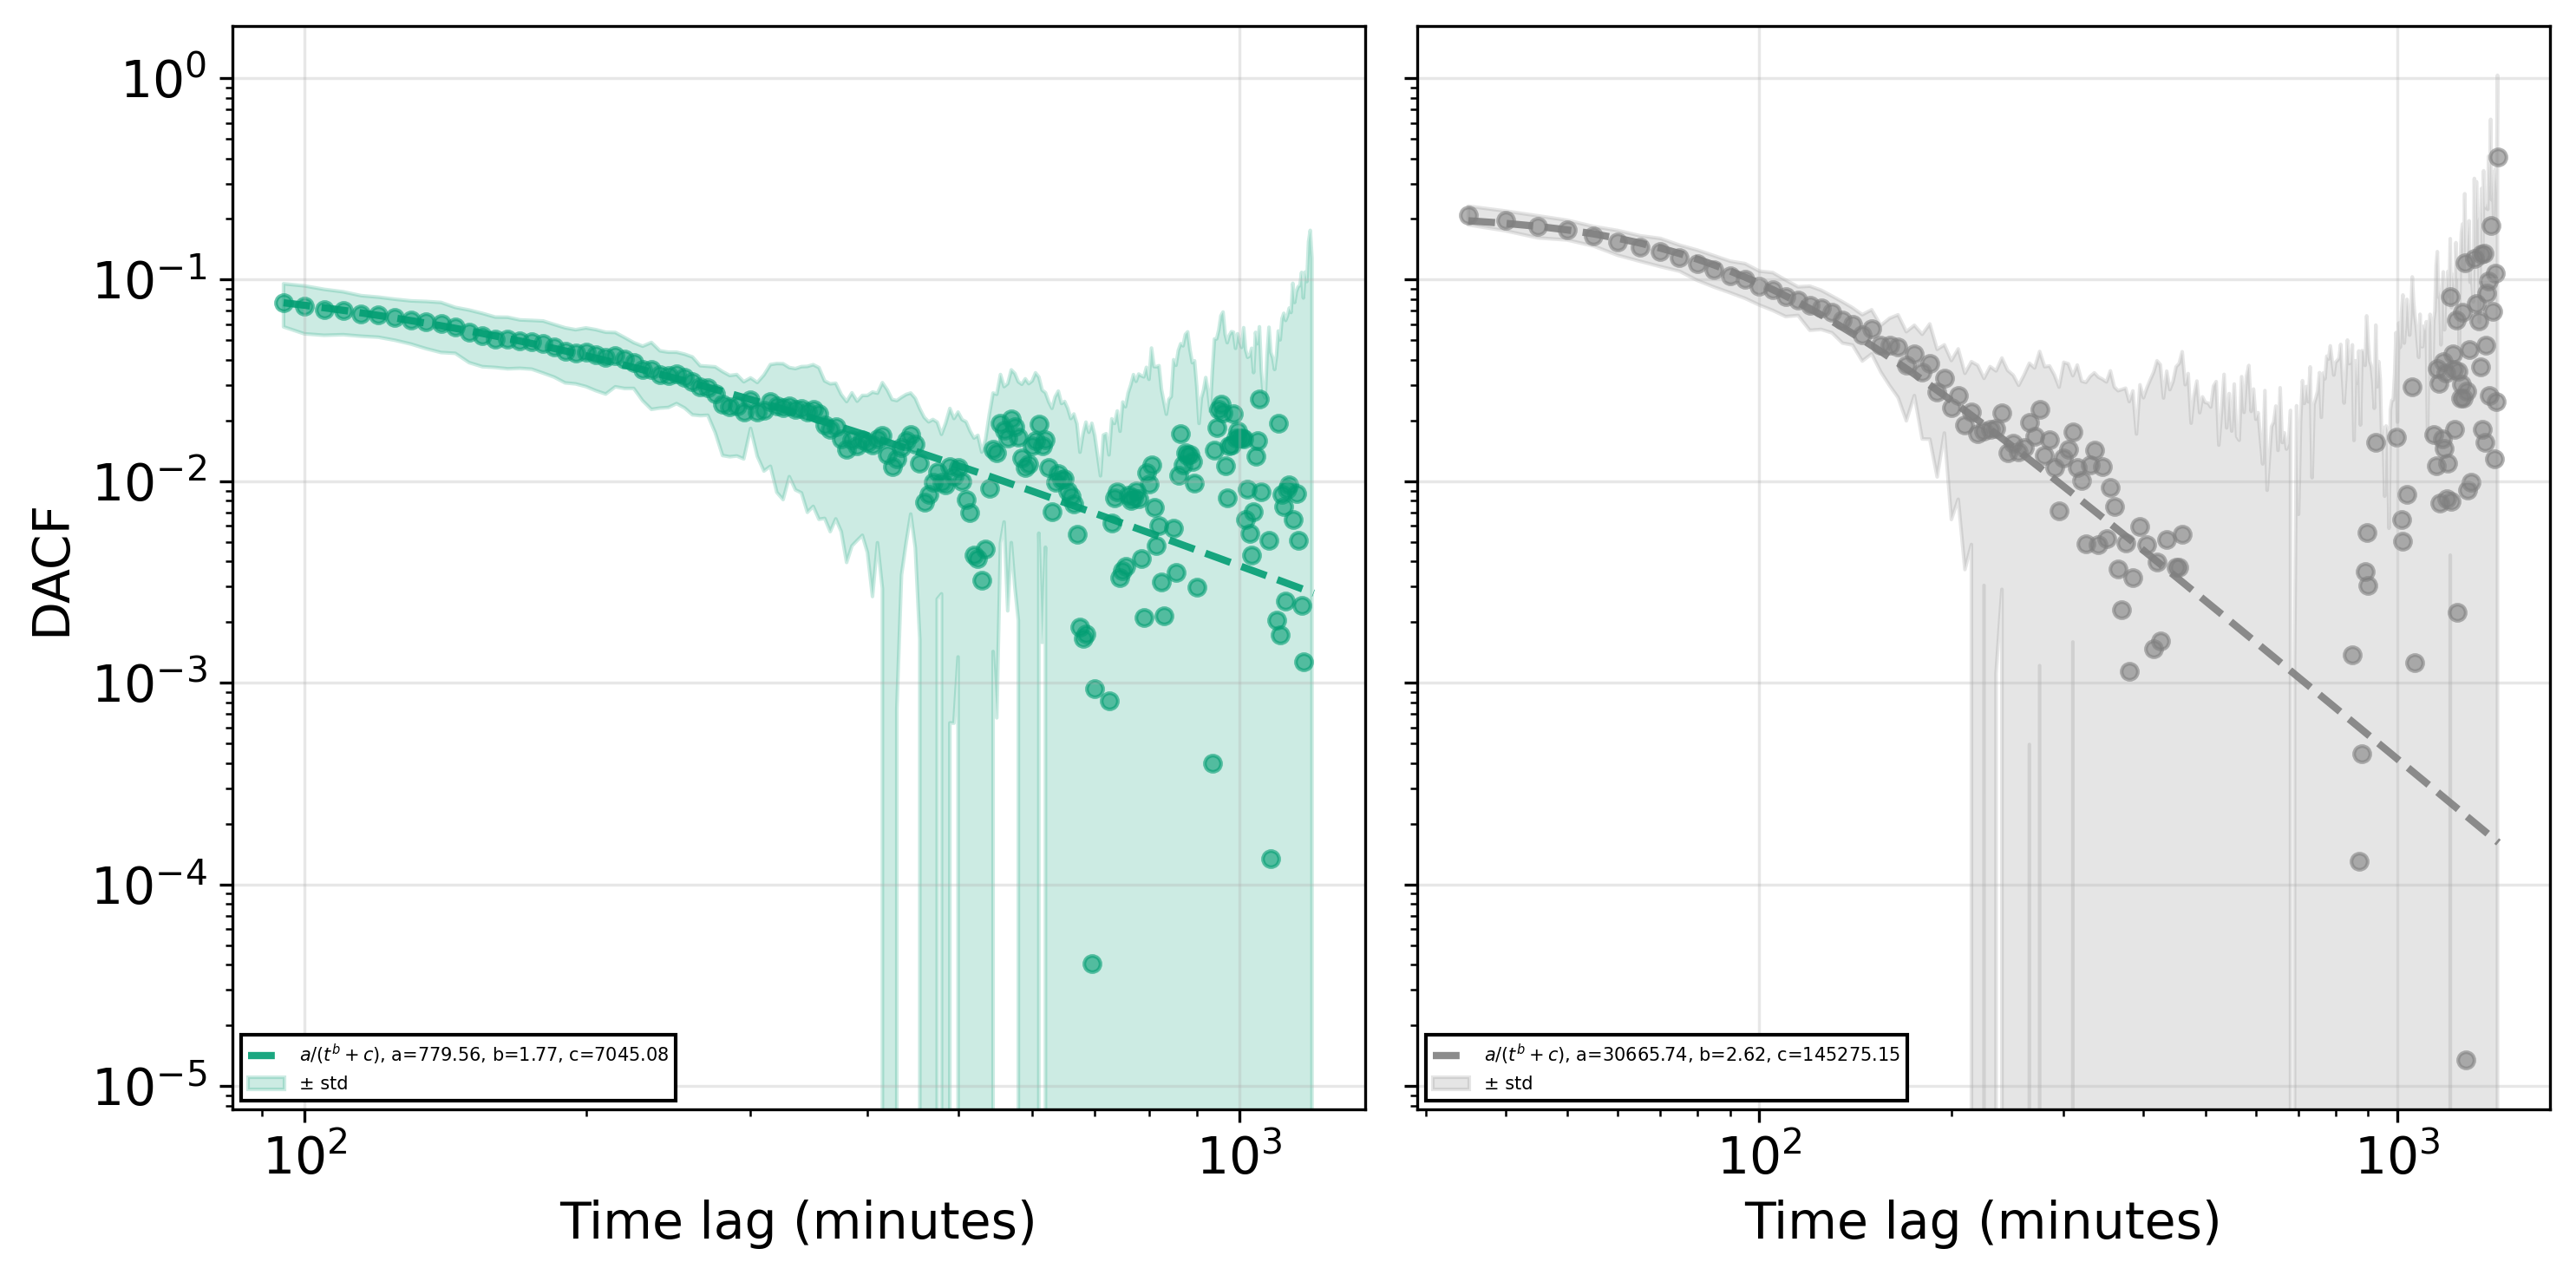

In [34]:
# make another plot, only for dacf data above aprox time to move one nucleus length
fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=300, sharey=True)
for i, name in enumerate(datasets_to_plot_dacf):
    ax = axes[i]
    acorr_df = dacf_std_from_position.get(name, None)
    short_name = dataset_metadata.get(name, {}).get('short_name', name)
    
    if acorr_df is None or acorr_df['dacf_mean'].isna().all():
        print(f"No DACF data for {name}")
        continue
    
    # get color from metadata
    color = dataset_metadata.get(name, {}).get('color', 'blue')
    
    # calculate approximate time to move one nucleus length
    df = tracks_dataset[name]
    nucleus_length = dataset_metadata.get(name, {}).get('nucleus_length_microns', None)
    if nucleus_length is not None:
        mean_velocity = df['v_micron_per_hour'].mean()
        if mean_velocity > 0:
            time_to_move_one_cell = (nucleus_length / mean_velocity) * 60  # in minutes
            # Filter data above this time
            filtered_mask = acorr_df['dt'] >= time_to_move_one_cell
            filtered_acorr_df = acorr_df[filtered_mask]
            
            # Plot mean DACF
            ax.scatter(filtered_acorr_df['dt'], filtered_acorr_df['dacf_mean'], color=color, label='', alpha=0.6, s=20)
            
            # Fit a power-law decay to the DACF
            valid_mask = (filtered_acorr_df['dacf_mean'] > -1) & (~filtered_acorr_df['dacf_mean'].isna())
            if valid_mask.sum() > 1:
                def power_law(t, a, b, c):
                    return a / (t**b + c)
                
                popt, pcov = curve_fit(power_law, filtered_acorr_df.loc[valid_mask, 'dt'], filtered_acorr_df.loc[valid_mask, 'dacf_mean'])
                fit_line = power_law(filtered_acorr_df['dt'], *popt)
                
                ax.plot(filtered_acorr_df['dt'], fit_line, linestyle='--', color=color, linewidth=2, alpha=0.9,
                        label=fr'$a/(t^{{b}}+c)$, a={popt[0]:.2f}, b={popt[1]:.2f}, c={popt[2]:.2f}')
            # add std shading
            if 'dacf_std' in filtered_acorr_df.columns:
                ax.fill_between(filtered_acorr_df['dt'], 
                                filtered_acorr_df['dacf_mean'] - filtered_acorr_df['dacf_std'], 
                                filtered_acorr_df['dacf_mean'] + filtered_acorr_df['dacf_std'],
                                color=color, alpha=0.2, label=f"± std")
    
    # Log scaling and labels
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Time lag (minutes)', fontsize=14)
    if i == 0:
        ax.set_ylabel('DACF', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=14)
    # ax.set_title(short_name, fontsize=12)
    ax.legend(frameon=True, fontsize=5, edgecolor='black', fancybox=False, framealpha=1, loc='lower left')
    ax.grid(True, alpha=0.3, which='major')

plt.tight_layout()
plt.show()

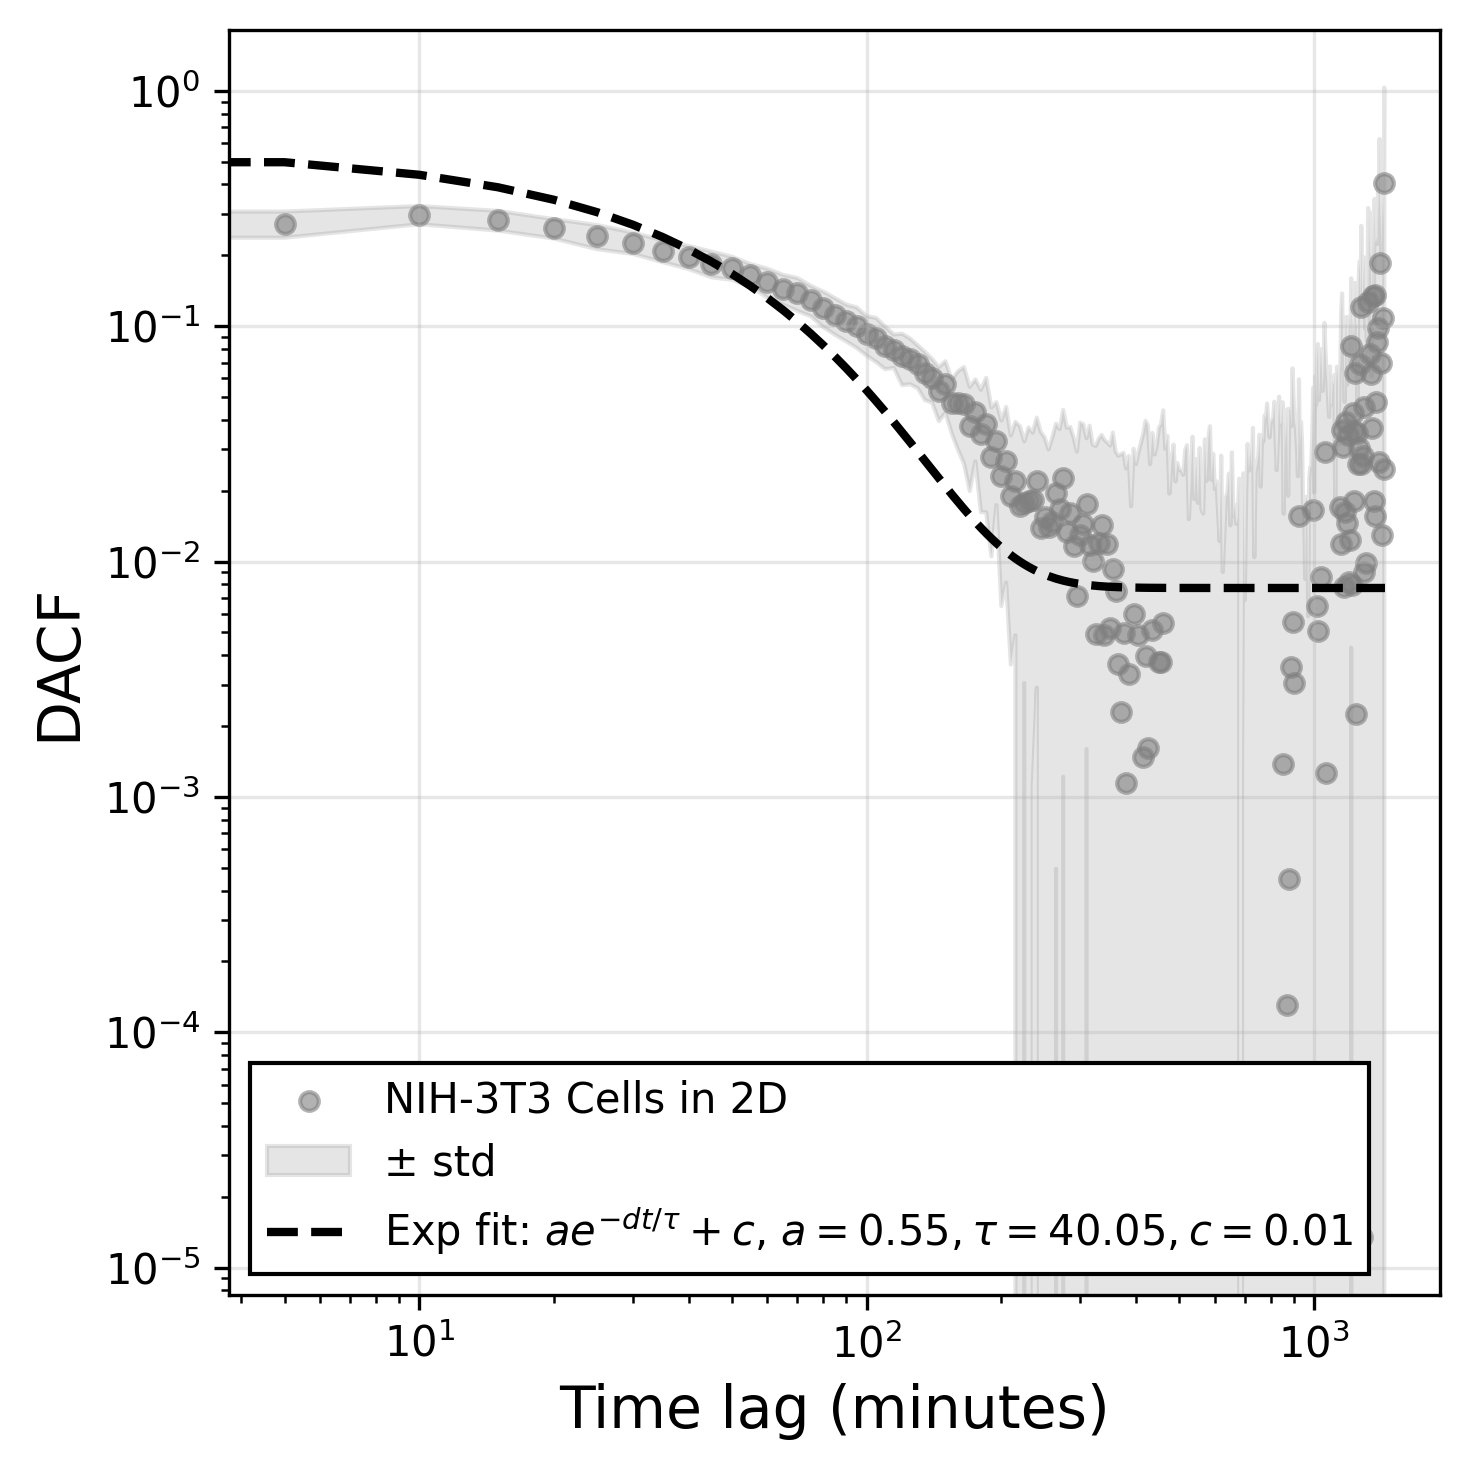

In [35]:
from scipy.optimize import curve_fit

# Select dataset
name = 'btrack_tracks_df_2025_09_30_NIH3T3_migration_on_laminin'
acorr_df = dacf_std_from_position.get(name, None)
short_name = dataset_metadata.get(name, {}).get('short_name', name)

if acorr_df is None or acorr_df['dacf_mean'].isna().all():
    print(f"No DACF data for {name}")
else:
    color = dataset_metadata.get(name, {}).get('color', 'blue')

    fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

    # Plot mean DACF
    ax.scatter(acorr_df['dt'], acorr_df['dacf_mean'], color=color, alpha=0.6, s=20, label=short_name)

    # Add std shading
    if 'dacf_std' in acorr_df.columns:
        ax.fill_between(acorr_df['dt'],
                        acorr_df['dacf_mean'] - acorr_df['dacf_std'],
                        acorr_df['dacf_mean'] + acorr_df['dacf_std'],
                        color=color, alpha=0.2, label="± std")

    # Fit exponential decay: dacf = a * exp(-dt / tau) + c
    def exp_decay(dt, a, tau, c):
        return a * np.exp(-dt / tau) + c

    valid_mask = (acorr_df['dacf_mean'] > -1) & (~acorr_df['dacf_mean'].isna())
    dt_fit = acorr_df.loc[valid_mask, 'dt']
    dacf_fit = acorr_df.loc[valid_mask, 'dacf_mean']

    try:
        popt, pcov = curve_fit(exp_decay, dt_fit, dacf_fit, p0=[1, 50, 0], maxfev=10000)
        fit_line = exp_decay(acorr_df['dt'], *popt)
        ax.plot(acorr_df['dt'], fit_line, linestyle='--', color='black', linewidth=2,
                label=fr'Exp fit: $a e^{{-dt/\tau}} + c$, ' +
                      fr'$a={popt[0]:.2f}, \tau={popt[1]:.2f}, c={popt[2]:.2f}$')
    except Exception as e:
        print(f"Exponential fit failed: {e}")

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Time lag (minutes)', fontsize=14)
    ax.set_ylabel('DACF', fontsize=14)
    ax.legend(frameon=True, fontsize=10, edgecolor='black', fancybox=False, framealpha=1)
    ax.grid(True, alpha=0.3, which='major')
    plt.tight_layout()
    plt.show()

# Additional plots

# Single tracks

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def plot_tracks_grid(tracks_dataset, dataset_names, dataset_metadata, 
                     n_rows=2, n_cols=3, n_tracks=1, 
                     scale_bar_length=20, scale_bar_unit='μm',
                     figsize=None, dpi=300, 
                     style='publication', random_seed=None):
    """
    Generate a publication-quality grid plot of cell tracks.
    
    Parameters
    ----------
    tracks_dataset : dict
        Dictionary mapping dataset names to DataFrames with columns 
        ['track_id', 'x_microns', 'y_microns']
    dataset_names : list
        List of dataset names to plot
    dataset_metadata : dict
        Metadata for each dataset including 'color' and 'short_name'
    n_rows : int, default=2
        Number of rows in the grid
    n_cols : int, default=3
        Number of columns in the grid
    n_tracks : int, default=1
        Number of tracks to plot per panel
    scale_bar_length : float, default=20
        Length of scale bar
    scale_bar_unit : str, default='μm'
        Unit for scale bar
    figsize : tuple, optional
        Figure size (width, height). If None, calculated from grid size
    dpi : int, default=300
        Resolution for publication quality
    style : str, default='publication'
        Style preset: 'publication', 'presentation', or 'minimal'
    random_seed : int, optional
        Random seed for reproducible track selection
    
    Returns
    -------
    fig : matplotlib.figure.Figure
        The figure object
    axes : array of matplotlib.axes.Axes
        Array of axes objects
    """
    
    # Set random seed for reproducibility
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # Style presets
    style_params = {
        'publication': {
            'linewidth': 1.5,
            'alpha': 0.8,
            'spine_width': 1.0,
            'tick_width': 1.0,
            'tick_length': 4,
            'title_fontsize': 10,
            'label_fontsize': 9,
            'scale_bar_width': 2,
            'scale_bar_fontsize': 8,
        },
        'presentation': {
            'linewidth': 2.5,
            'alpha': 0.9,
            'spine_width': 1.5,
            'tick_width': 1.5,
            'tick_length': 6,
            'title_fontsize': 14,
            'label_fontsize': 12,
            'scale_bar_width': 3,
            'scale_bar_fontsize': 11,
        },
        'minimal': {
            'linewidth': 1.0,
            'alpha': 0.7,
            'spine_width': 0.5,
            'tick_width': 0.5,
            'tick_length': 3,
            'title_fontsize': 9,
            'label_fontsize': 8,
            'scale_bar_width': 1.5,
            'scale_bar_fontsize': 7,
        }
    }
    
    params = style_params.get(style, style_params['publication'])
    
    # Calculate figure size if not provided
    if figsize is None:
        figsize = (3.5 * n_cols, 3.5 * n_rows)
    
    # Create figure with publication-quality settings
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['pdf.fonttype'] = 42  # TrueType fonts for PDFs
    plt.rcParams['ps.fonttype'] = 42
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, dpi=dpi)
    axes = np.atleast_1d(axes).flatten()
    
    for i, name in enumerate(dataset_names):
        if i >= n_rows * n_cols:
            break
            
        df = tracks_dataset[name]
        color = dataset_metadata.get(name, {}).get('color', '#1f77b4')
        short_name = dataset_metadata.get(name, {}).get('short_name', name)
        
        track_ids = df['track_id'].unique()
        if len(track_ids) == 0:
            continue
        
        # Select n_tracks random tracks
        n_tracks_available = min(n_tracks, len(track_ids))
        selected_track_ids = np.random.choice(track_ids, size=n_tracks_available, replace=False)
        
        ax = axes[i]
        
        # Plot each selected track
        for track_id in selected_track_ids:
            track_df = df[df['track_id'] == track_id].sort_values('t')  # Ensure temporal order
            ax.plot(track_df['x_microns'], track_df['y_microns'], 
                   color=color, lw=params['linewidth'], alpha=params['alpha'])
            
            # Optional: Mark start point
            ax.plot(track_df['x_microns'].iloc[0], track_df['y_microns'].iloc[0], 
                   'o', color=color, markersize=4, alpha=params['alpha'])
        
        # Formatting
        if n_tracks_available == 1:
            title = f"{short_name}\nTrack ID: {selected_track_ids[0]}"
        else:
            title = f"{short_name}\n{n_tracks_available} tracks"
        
        # ax.set_title(title, fontsize=params['title_fontsize'], pad=10)
        ax.set_xlabel('x (μm)', fontsize=params['label_fontsize'])
        # ax.set_ylabel('y (μm)', fontsize=params['label_fontsize'])
        # ax.axis('equal')
        
        # # Clean up spines
        # for spine in ax.spines.values():
        #     spine.set_linewidth(params['spine_width'])
        
        # # Tick parameters
        # ax.tick_params(width=params['tick_width'], length=params['tick_length'], 
        #               labelsize=params['label_fontsize']-1)
        
        # Add scale bar
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        x_range = xlim[1] - xlim[0]
        y_range = ylim[1] - ylim[0]
        
        # Position scale bar in bottom-right corner with padding
        x0 = xlim[1] - 0.1 * x_range - scale_bar_length
        y0 = ylim[0] + 0.1 * y_range
        
        ax.plot([x0, x0 + scale_bar_length], [y0, y0], 
               'k-', lw=params['scale_bar_width'], solid_capstyle='butt')
        ax.text(x0 + scale_bar_length/2, y0 + 0.03*y_range, 
               f'{scale_bar_length} {scale_bar_unit}',
               va='bottom', ha='center', fontsize=params['scale_bar_fontsize'], 
               color='k', weight='normal')
    
    # Hide unused axes
    for j in range(i+1, n_rows*n_cols):
        axes[j].axis('off')
    
    # equal aspect ratio for all axes
    for ax in axes:
        ax.axis('equal')
        
    plt.tight_layout()
    
    return fig, axes

In [44]:
chosen_dataset = tracks_dataset['btrack_tracks_df_2024_09_09']
movie_6 = chosen_dataset[chosen_dataset['file'] == '2024_09_09_tracks_06.h5']

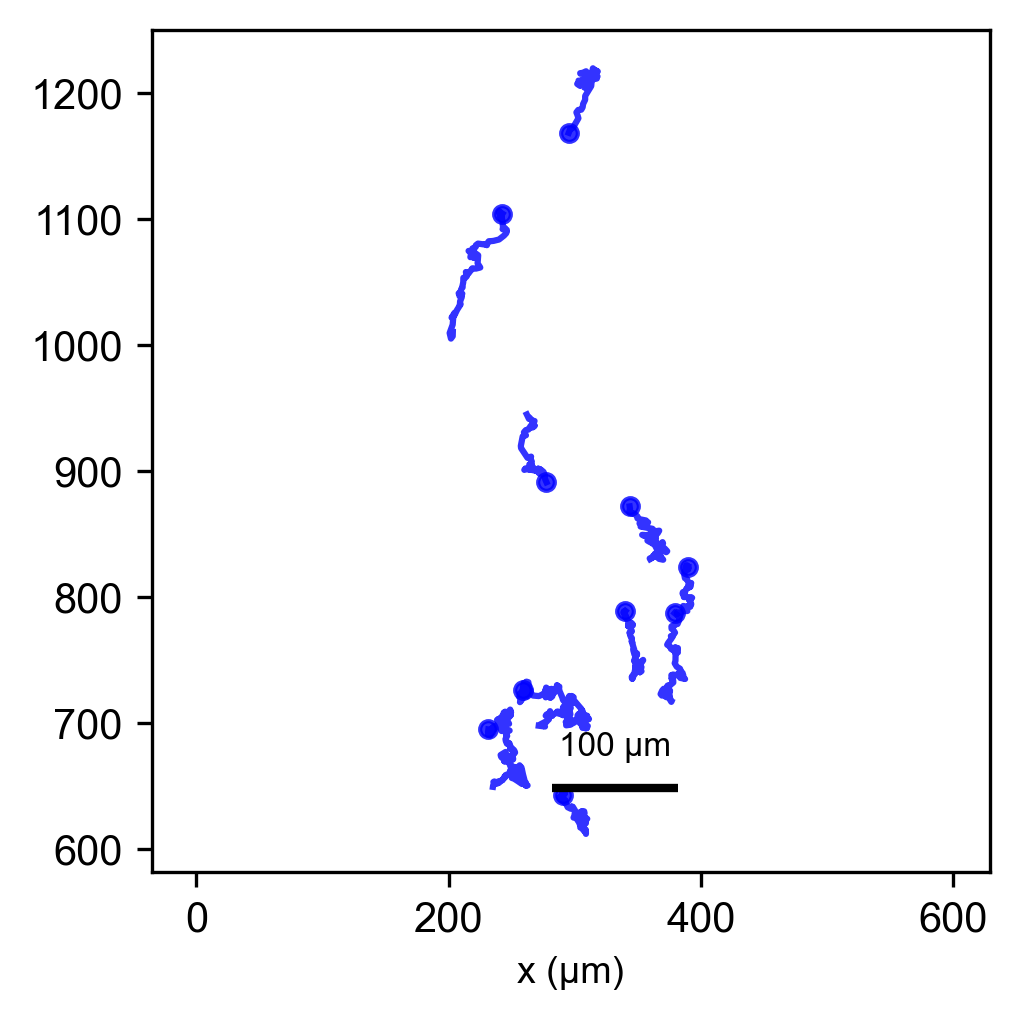

In [73]:
# plot random 3 tracks from this movie
fig, axes = plot_tracks_grid(
    tracks_dataset={'movie_6': movie_6},
    dataset_names=['movie_6'],
    dataset_metadata={'movie_6': {'color': 'blue', 'short_name': 'Movie 6'}},
    n_rows=1,
    n_cols=1,
    n_tracks=10,
    scale_bar_length=100,
    scale_bar_unit='μm',
    style='publication',
    random_seed=np.random.randint(0, 10000)
)

# plt.ylim(700, 900)

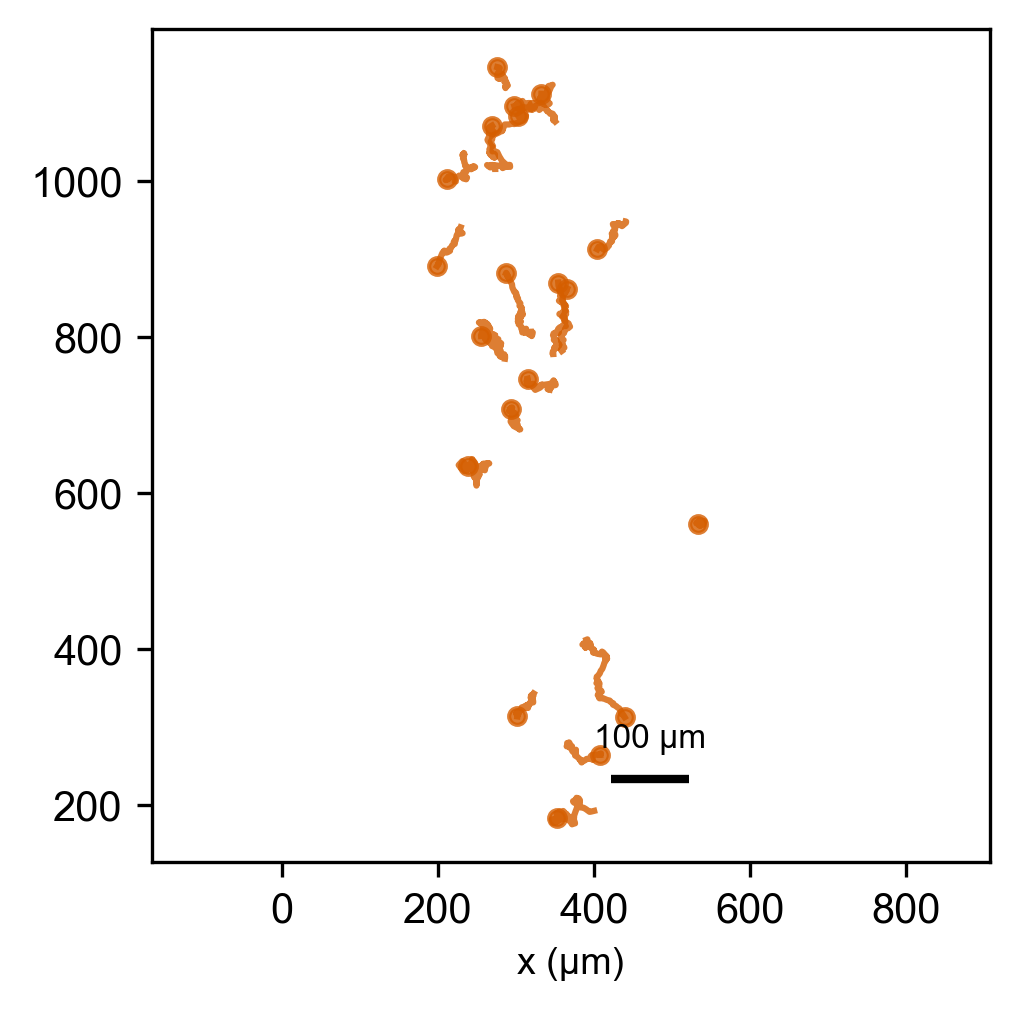

In [41]:
# Example usage:
fig, axes = plot_tracks_grid(
    tracks_dataset,
    dataset_names=["btrack_tracks_df_2024_09_09"],
    dataset_metadata=dataset_metadata,
    n_rows=1,
    n_cols=1,
    n_tracks=20,  # Plot 5 tracks per panel
    scale_bar_length=100,
    scale_bar_unit='μm',
    dpi=300,
    style='publication',
    random_seed=42  # For reproducibility
)

# Save as high-quality PDF/PNG
# fig.savefig('tracks_figure.pdf', dpi=300, bbox_inches='tight')
# fig.savefig('tracks_figure.png', dpi=300, bbox_inches='tight')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

C:\Users\davidzi\AppData\Local\Temp\ipykernel_29844\1215890945.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.06, 1, 1])  # leave room at bottom for scale bar inset


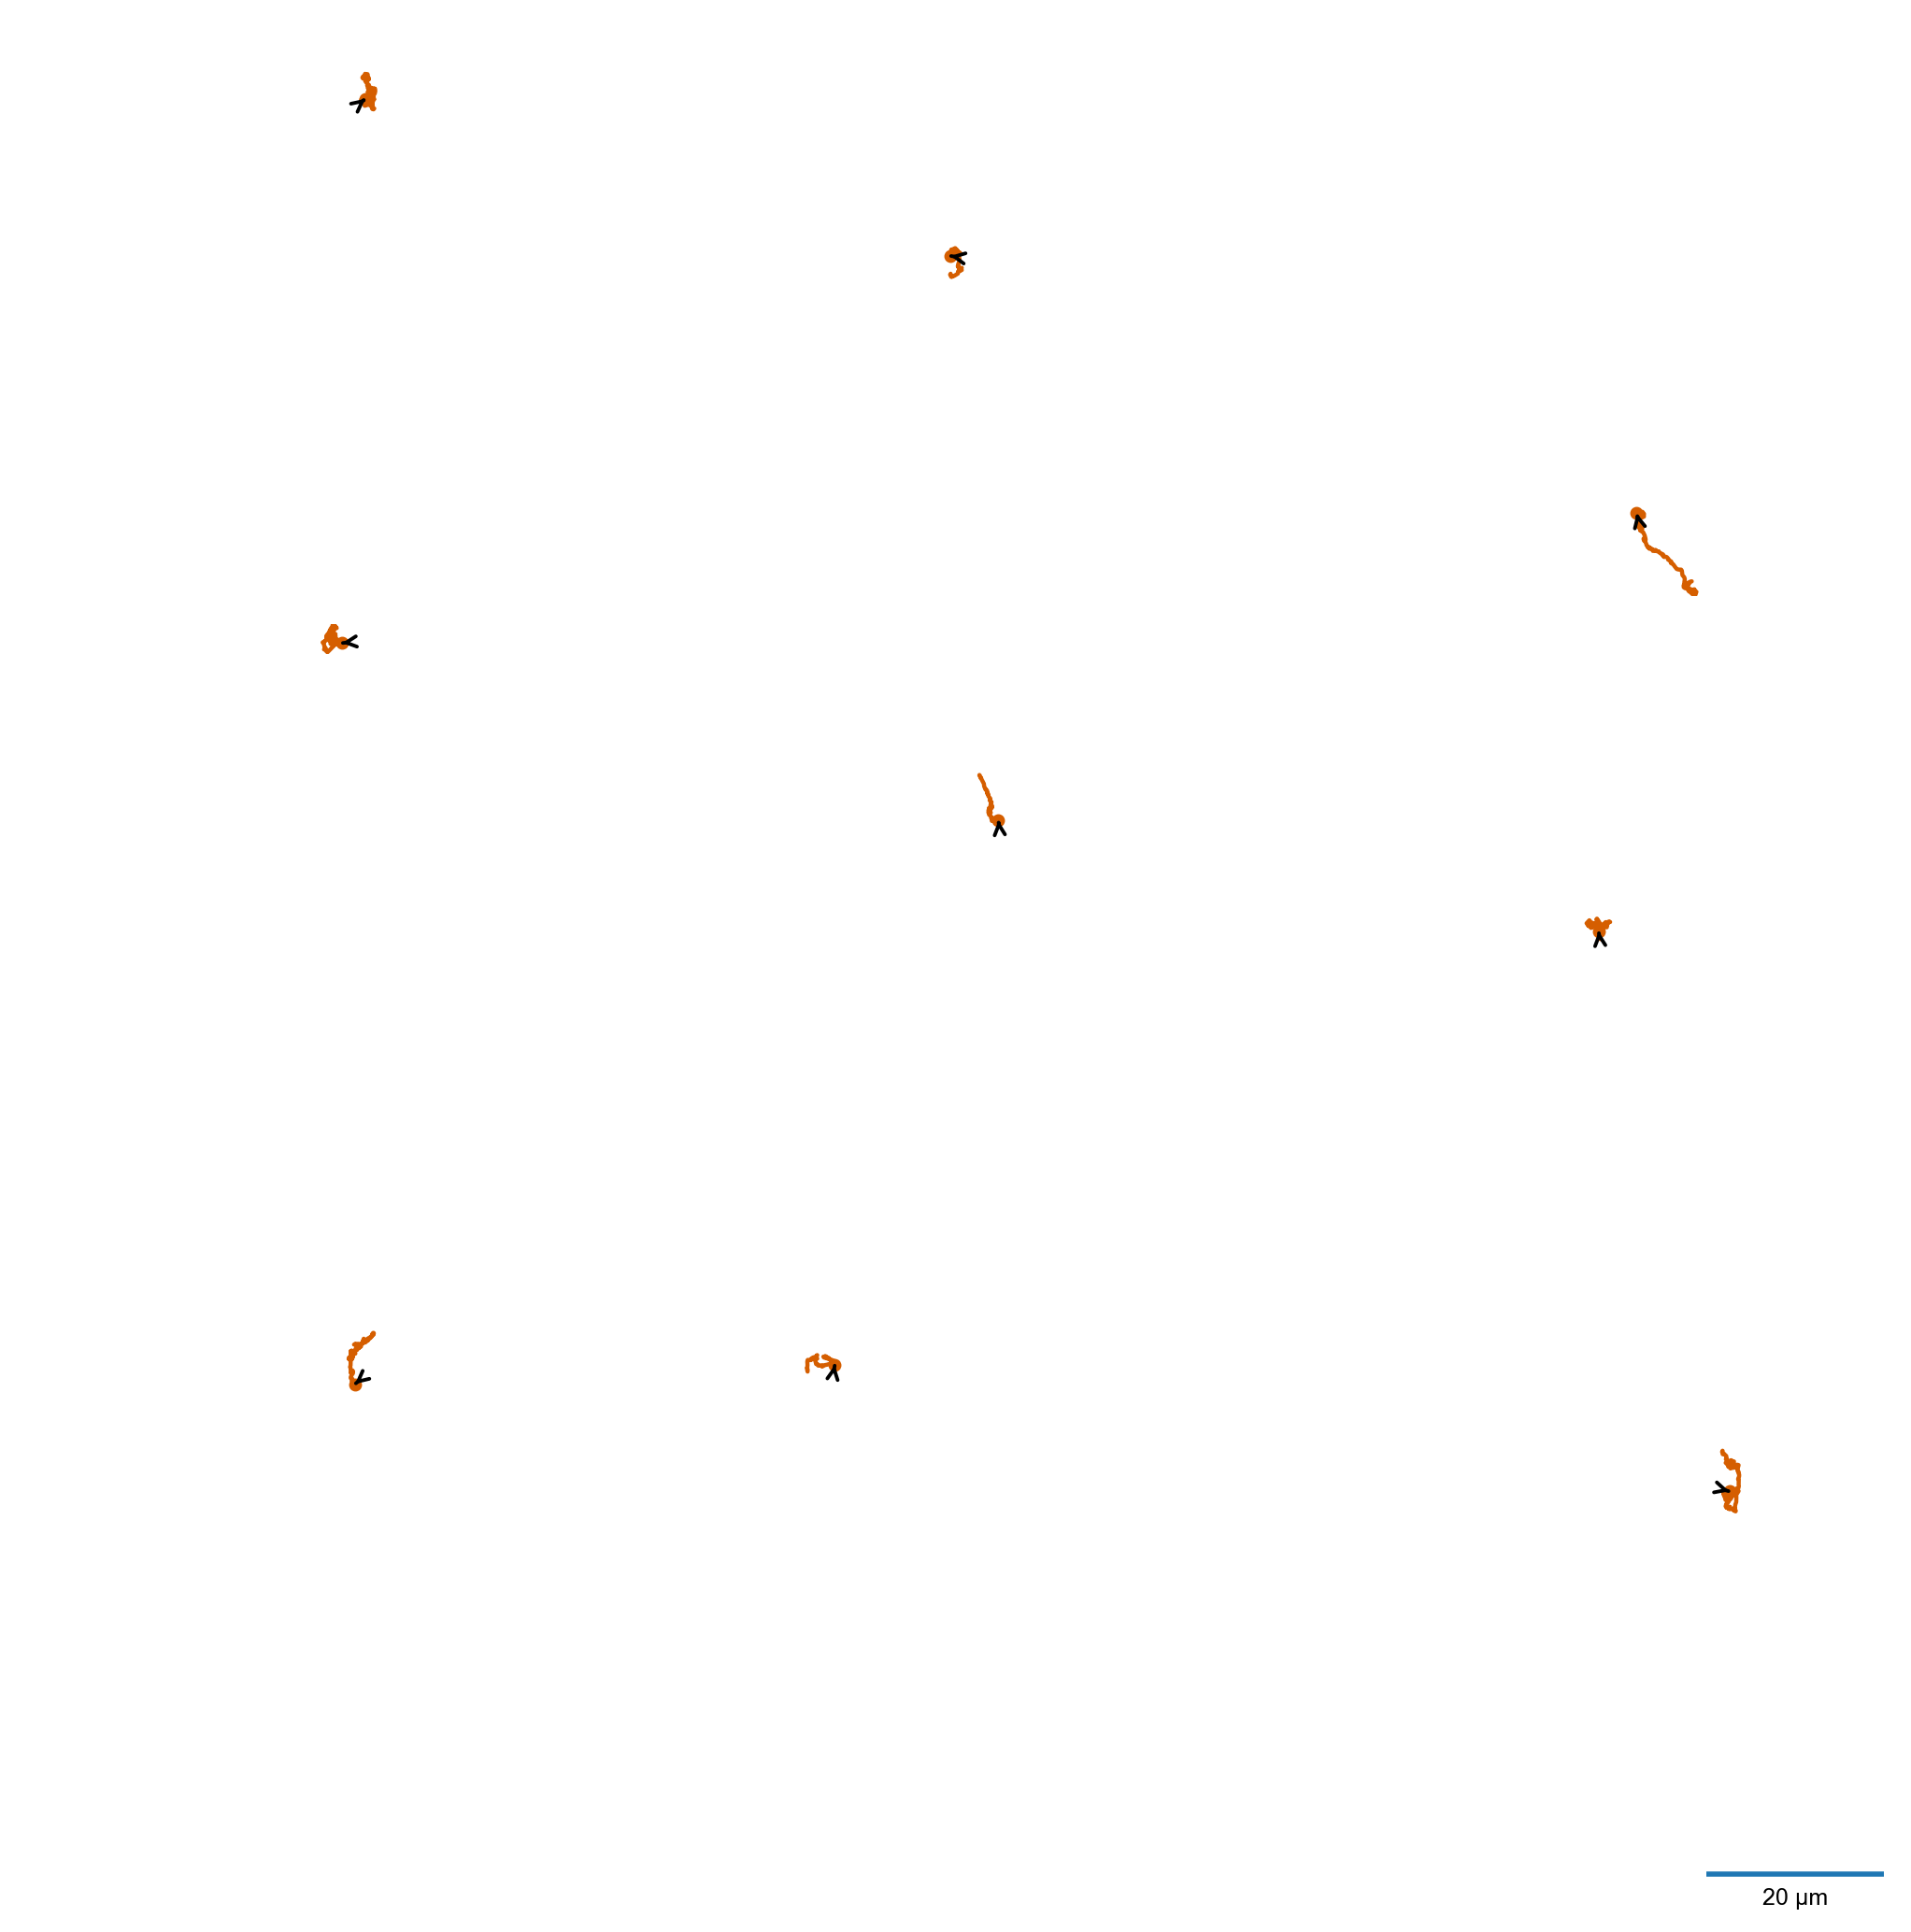

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

# ---------------- user parameters ----------------
dataset_name = 'btrack_tracks_df_2024_09_09'  # dataset key
n_rows, n_cols = 3, 3
random_seed = 42

# length filter in microns (set min only, or also set max_track_length)
min_track_steps = 100.0   # keep tracks with total path length >= this (microns)
# -------------------------------------------------

df = tracks_dataset[dataset_name]
all_track_ids = np.array(df['track_id'].unique())

# filter tracks by amount of steps
filtered_ids = [tid for tid in all_track_ids if len(df[df['track_id'] == tid]) >= min_track_steps]

if len(filtered_ids) == 0:
    raise ValueError(f"No tracks passed the length filter (min={min_track_steps}, max={max_track_steps}).")

np.random.seed(random_seed)
n_panels = n_rows * n_cols
n_plots = min(n_panels, len(filtered_ids))
selected = np.random.choice(filtered_ids, size=n_plots, replace=False)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(3.5 * n_cols, 3.5 * n_rows), dpi=200)
axes = axes.flatten()

color_base = dataset_metadata.get(dataset_name, {}).get('color', 'tab:blue')

# choose a "nice" scale (1,2,5 * 10^k) roughly ~20% of provided span
def choose_nice_scale(span):
    target = span * 0.2 if span > 0 else 1.0
    nice_bases = np.array([1, 2, 5])
    exponent = int(np.floor(np.log10(max(target, 1e-12))))
    candidates = []
    for e in [exponent - 1, exponent, exponent + 1]:
        candidates.extend((nice_bases * (10 ** int(e))).astype(float))
    candidates = np.array(sorted(set(candidates)))
    diffs = np.abs(candidates - target)
    return float(candidates[np.argmin(diffs)])

# compute a global span across the selected tracks (used to pick scale bar length)
global_spans = []
for tid in selected:
    tdf = df[df['track_id'] == tid]
    dx = tdf['x_microns'].max() - tdf['x_microns'].min()
    dy = tdf['y_microns'].max() - tdf['y_microns'].min()
    global_spans.append(max(dx if dx>0 else 1.0, dy if dy>0 else 1.0))
global_span = max(global_spans) if len(global_spans) > 0 else 1.0
scale_len = choose_nice_scale(global_span)
# round scale label nicely (integer if close to int)
scale_label = f"{int(scale_len)} µm" if abs(scale_len - round(scale_len)) < 1e-6 else f"{scale_len:g} µm"

# Compute a global extent for all selected tracks (same normalization)
global_xmin = df[df['track_id'].isin(selected)]['x_microns'].min()
global_xmax = df[df['track_id'].isin(selected)]['x_microns'].max()
global_ymin = df[df['track_id'].isin(selected)]['y_microns'].min()
global_ymax = df[df['track_id'].isin(selected)]['y_microns'].max()

global_span_x = global_xmax - global_xmin
global_span_y = global_ymax - global_ymin
global_half_span = 0.5 * max(global_span_x, global_span_y)

for ax_idx, ax in enumerate(axes):
    ax.clear()
    if ax_idx < n_plots:
        tid = selected[ax_idx]
        track_df = df[df['track_id'] == tid].sort_values('t')
        xs = track_df['x_microns'].values
        ys = track_df['y_microns'].values
        n_steps = len(xs)

        # plot single-color track
        if n_steps > 1:
            ax.plot(xs, ys, linewidth=1.6, solid_capstyle='round', color=color_base)
        else:
            ax.plot(xs, ys, 'o', markersize=3, color=color_base)

        # start and end markers (optional) - small and subtle
        # ax.plot(xs[0], ys[0], 'o', color='green', markersize=4)
        ax.plot(xs[-1], ys[-1], 'o', color=color_base, markersize=4)

        # draw arrow showing direction (from penultimate -> last). If only 1 point, no arrow.
        if n_steps > 1:
            x_prev, y_prev = xs[-2], ys[-2]
            x_last, y_last = xs[-1], ys[-1]
            # annotate draws arrow in data coordinates
            ax.annotate('', xy=(x_last, y_last), xytext=(x_prev, y_prev),
                        arrowprops=dict(arrowstyle='->', lw=1.4, shrinkA=0, shrinkB=0),
                        annotation_clip=False)

        # compute ranges and make the axes square (equal x/y span centered)
        x_min, x_max = xs.min(), xs.max()
        y_min, y_max = ys.min(), ys.max()

        dx = (x_max - x_min) if (x_max > x_min) else 1.0
        dy = (y_max - y_min) if (y_max > y_min) else 1.0
        span = max(dx, dy)
        pad = 0.07 * span  # small padding

        xmid = 0.5 * (x_min + x_max)
        ymid = 0.5 * (y_min + y_max)
        half_span = 0.5 * span + pad

        ax.set_xlim(global_xmin + global_span_x/2 - global_half_span,
            global_xmin + global_span_x/2 + global_half_span)
        ax.set_ylim(global_ymin + global_span_y/2 - global_half_span,
                    global_ymin + global_span_y/2 + global_half_span)
        ax.set_aspect('equal', adjustable='box')
        # remove axes, ticks, spines — keep only track (and arrow/markers)
        ax.set_xticks([])
        ax.set_yticks([])
        for spine in ax.spines.values():
            spine.set_visible(False)

    else:
        ax.axis('off')

# ---- add a single global scale bar in the figure corner (outside panels) ----
# we create a small inset axes in figure coordinates to host the bar + label
# position: near lower-right; adjust [x0, y0, width, height] as you like
cax = fig.add_axes([0.88, 0.02, 0.1, 0.04], frameon=False)
cax.set_xticks([])
cax.set_yticks([])
cax.spines['top'].set_visible(False)
cax.spines['right'].set_visible(False)
cax.spines['left'].set_visible(False)
cax.spines['bottom'].set_visible(False)

# draw a horizontal line (in cax coordinates) and label it
cax.plot([0.05, 0.95], [0.45, 0.45], lw=2, solid_capstyle='butt')
cax.text(0.5, 0.05, scale_label, ha='center', va='bottom', fontsize=9, transform=cax.transAxes)

plt.tight_layout(rect=[0, 0.06, 1, 1])  # leave room at bottom for scale bar inset
plt.show()


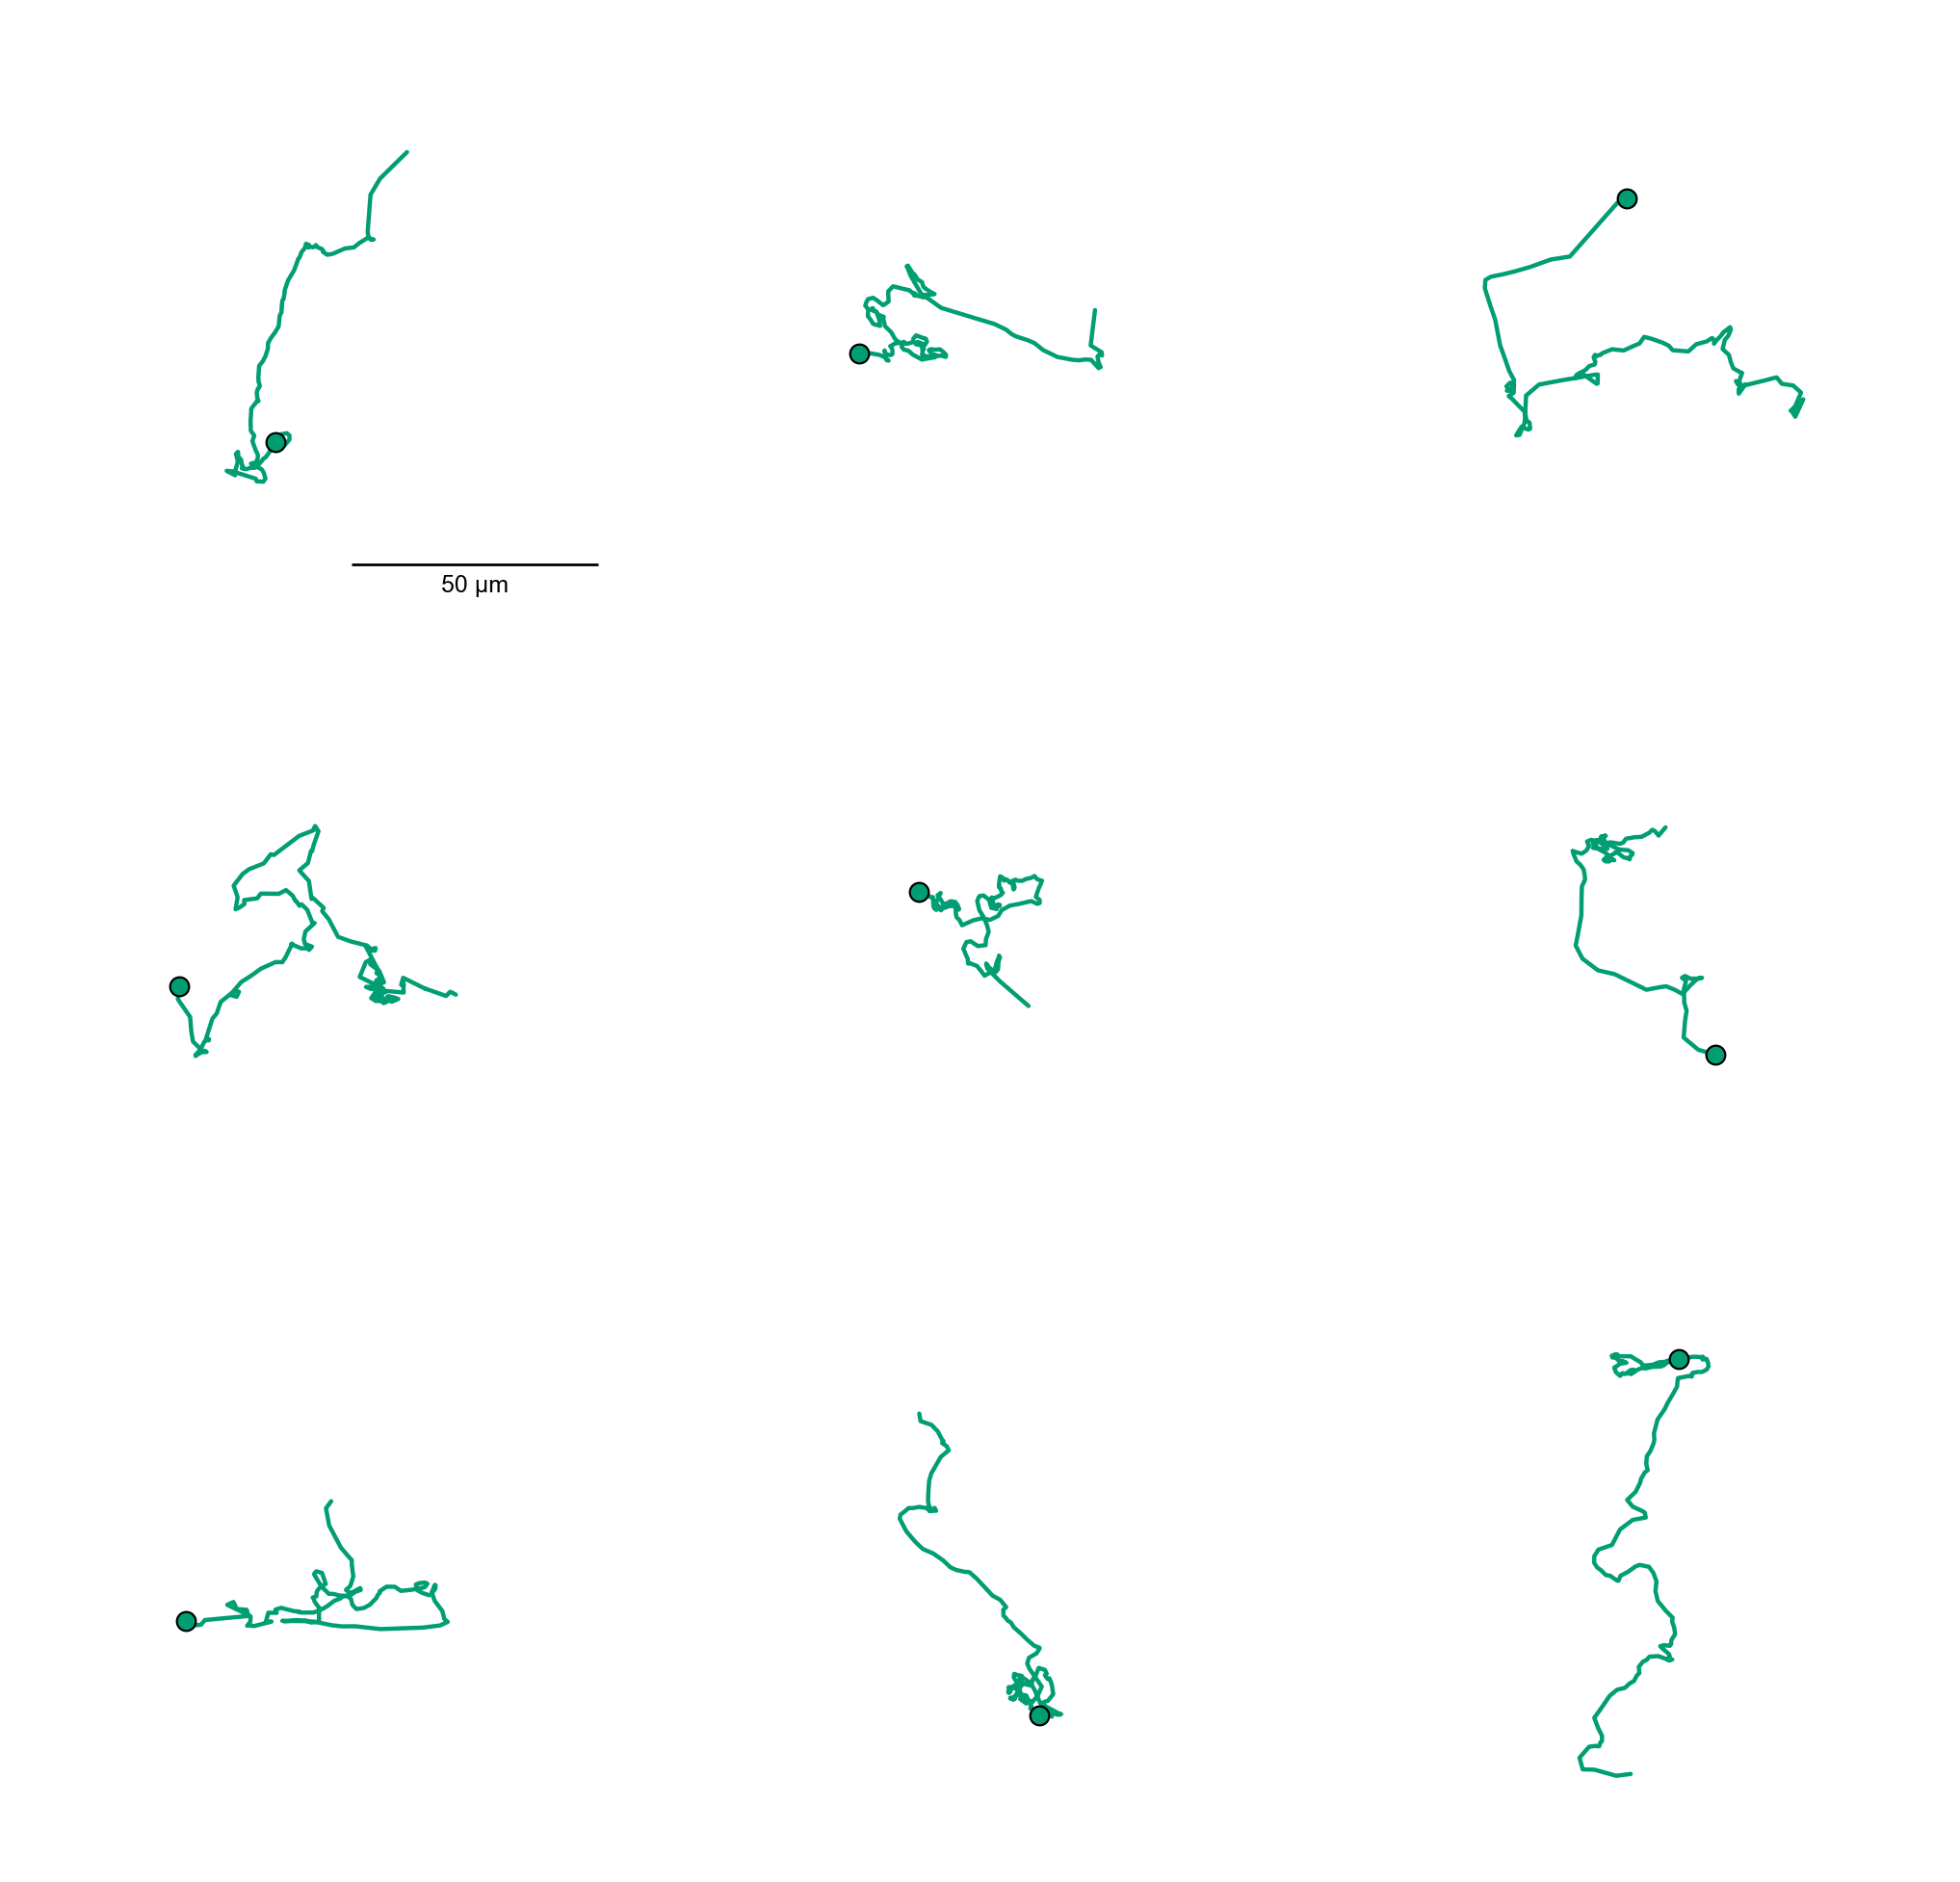

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

# ---------------- user parameters ----------------
dataset_name = 'btrack_tracks_df_2025_01_22_2DFACS'  # dataset key
n_rows, n_cols = 3, 3
random_seed = 42

# filter by number of steps (use int)
min_track_steps = 100  # minimum number of points in a track to keep
# Choose display strategy: either set a fixed display span (recommended) OR use percentile-based robust span
display_span_um = 110.0    # if not None -> show +/- display_span_um/2 around each track (same for all panels)
use_percentile_span = True
percentile_for_span = 75  # used only if use_percentile_span=True
# -------------------------------------------------

df = tracks_dataset[dataset_name]
all_track_ids = np.array(df['track_id'].unique())

# Filter by number of steps
filtered_ids = [tid for tid in all_track_ids if len(df[df['track_id'] == tid]) >= min_track_steps]

if len(filtered_ids) == 0:
    raise ValueError(f"No tracks passed the step filter (min_track_steps={min_track_steps}).")

np.random.seed(random_seed)
n_panels = n_rows * n_cols
n_plots = min(n_panels, len(filtered_ids))
selected = np.random.choice(filtered_ids, size=n_plots, replace=False)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(3.5 * n_cols, 3.5 * n_rows), dpi=200)
axes = axes.flatten()

color_base = dataset_metadata.get(dataset_name, {}).get('color', 'tab:blue')

# compute per-track spans (max of dx,dy) for robustness
per_track_spans = []
for tid in selected:
    tdf = df[df['track_id'] == tid]
    dx = tdf['x_microns'].max() - tdf['x_microns'].min()
    dy = tdf['y_microns'].max() - tdf['y_microns'].min()
    per_track_spans.append(max(dx if dx > 0 else 0.0, dy if dy > 0 else 0.0))

# Decide display_span (same for all panels) using chosen strategy
if display_span_um is not None:
    display_span = float(display_span_um)
else:
    if use_percentile_span:
        display_span = float(np.percentile(per_track_spans, percentile_for_span))
        if display_span == 0:
            display_span = max(per_track_spans) if len(per_track_spans) else 1.0
    else:
        # fallback to median-based span
        display_span = float(np.median(per_track_spans))
        if display_span == 0:
            display_span = max(per_track_spans) if len(per_track_spans) else 1.0

# ensure display_span is nonzero and add a little padding
display_span = max(display_span, 1.0)
display_span *= 1.1  # small extra padding
half_display = 0.5 * display_span

# choose a "nice" scale (1,2,5 * 10^k) roughly ~20% of display_span
def choose_nice_scale(span):
    target = span * 0.2 if span > 0 else 1.0
    nice_bases = np.array([1, 2, 5])
    exponent = int(np.floor(np.log10(max(target, 1e-12))))
    candidates = []
    for e in [exponent - 1, exponent, exponent + 1]:
        candidates.extend((nice_bases * (10 ** int(e))).astype(float))
    candidates = np.array(sorted(set(candidates)))
    diffs = np.abs(candidates - target)
    return float(candidates[np.argmin(diffs)])

scale_len = 50# choose_nice_scale(display_span)
scale_label = f"{int(scale_len)} µm" if abs(scale_len - round(scale_len)) < 1e-6 else f"{scale_len:g} µm"

for ax_idx, ax in enumerate(axes):
    ax.clear()
    if ax_idx < n_plots:
        tid = selected[ax_idx]
        track_df = df[df['track_id'] == tid].sort_values('t')
        xs = track_df['x_microns'].values
        ys = track_df['y_microns'].values
        n_steps = len(xs)

        # plot track
        if n_steps > 1:
            ax.plot(xs, ys, linewidth=1.6, solid_capstyle='round', color=color_base)
        else:
            ax.plot(xs, ys, 'o', markersize=3, color=color_base)

        # end marker and arrow
        ax.scatter(xs[-1], ys[-1], s=50, facecolor=color_base, edgecolor='k', linewidth=0.8, zorder=5,)
        # ax.plot(xs[-1], ys[-1], 'o', color=color_base, markersize=6, 
        # if n_steps > 1:
        #     x_prev, y_prev = xs[-2], ys[-2]
        #     x_last, y_last = xs[-1], ys[-1]
        #     ax.annotate('', xy=(x_last, y_last), xytext=(x_prev, y_prev),
        #                 arrowprops=dict(arrowstyle='->', lw=1.4, shrinkA=0, shrinkB=0),
        #                 annotation_clip=False)

        # CENTER each panel on the track but use the SAME display span (so scale is identical)
        x_mid = 0.5 * (xs.min() + xs.max())
        y_mid = 0.5 * (ys.min() + ys.max())

        # if track is a single point, center on that point
        if np.isnan(x_mid) or np.isnan(y_mid):
            x_mid, y_mid = 0.0, 0.0

        ax.set_xlim(x_mid - half_display, x_mid + half_display)
        ax.set_ylim(y_mid - half_display, y_mid + half_display)
        ax.set_aspect('equal', adjustable='box')

        # remove axes, ticks, spines
        ax.set_xticks([])
        ax.set_yticks([])
        for spine in ax.spines.values():
            spine.set_visible(False)
    else:
        ax.axis('off')

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
fontprops = fm.FontProperties(size=9)

# attach to the last plotted axis (or pick axes[0] or another)
anchor_ax = axes[0]  # choose any panel axis that exists
scalebar = AnchoredSizeBar(anchor_ax.transData,
                           scale_len,        # length in data units (µm)
                           scale_label,
                           loc='lower right',
                           pad=0.3,
                           borderpad=0.4,
                           sep=4,
                           prop=fontprops,
                           frameon=False)
anchor_ax.add_artist(scalebar)
# # add single global scale bar (outside panels)
# cax = fig.add_axes([0.88, 0.02, 0.1, 0.04], frameon=False)
# cax.set_xticks([])
# cax.set_yticks([])
# for s in cax.spines.values():
#     s.set_visible(False)
# cax.plot([0.05, 0.95], [0.45, 0.45], lw=2, solid_capstyle='butt')
# cax.text(0.5, 0.05, scale_label, ha='center', va='bottom', fontsize=9, transform=cax.transAxes)

plt.tight_layout(rect=[0, 0.06, 1, 1])
plt.show()


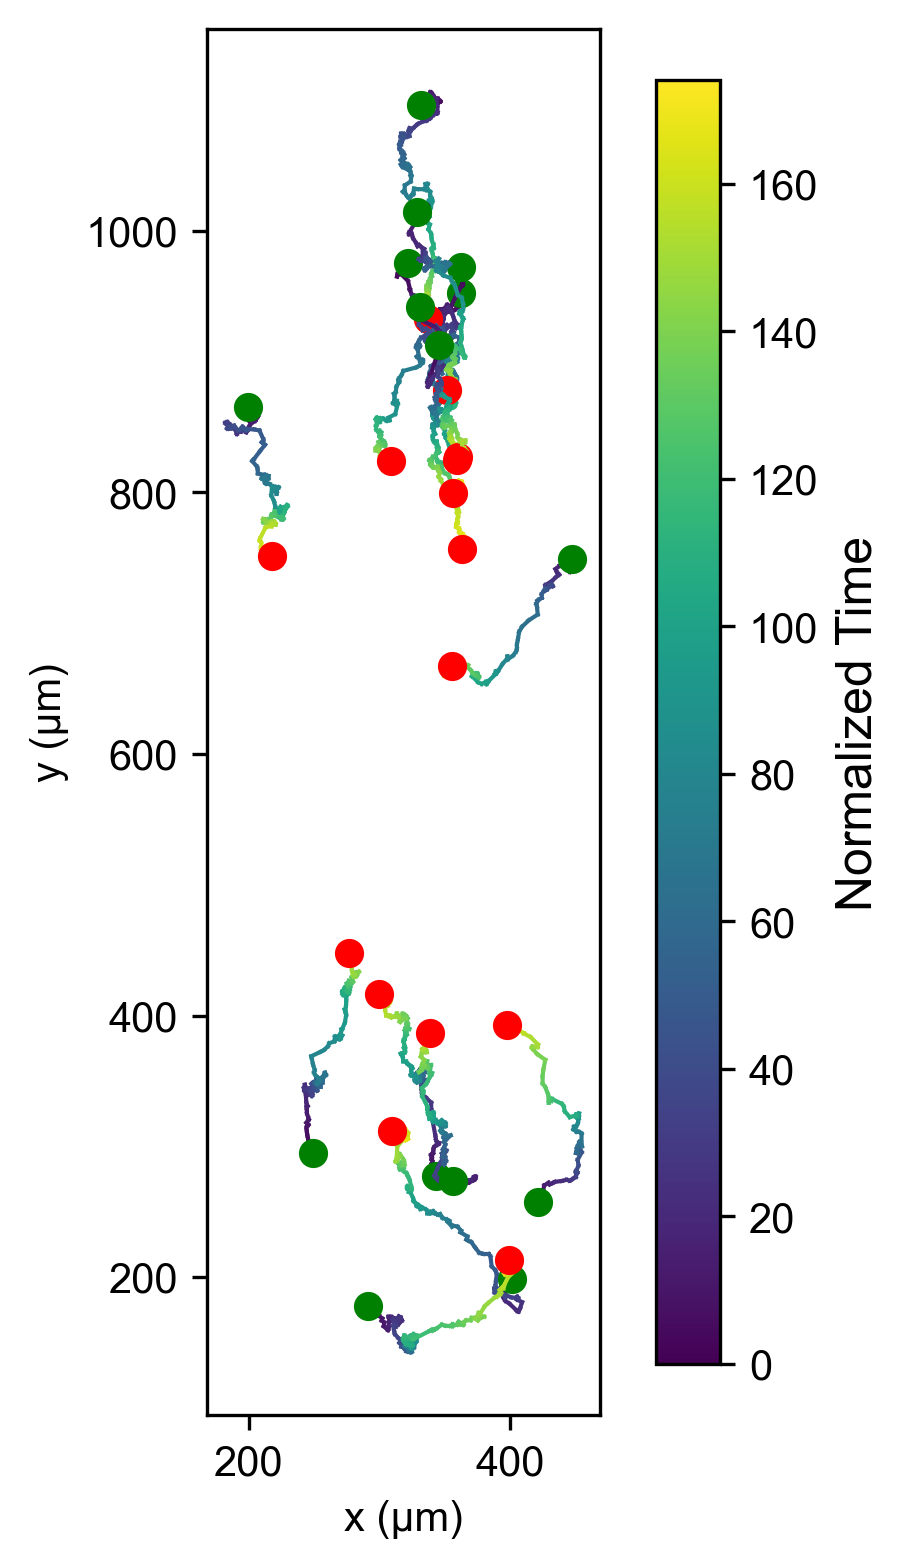

In [82]:
dataset = tracks_dataset["btrack_tracks_df_2024_09_09"]
# longest tracks by displacement
dataset['displacement'] = np.sqrt((dataset['x_microns'] - dataset.groupby('track_id')['x_microns'].transform('first'))**2 +
                                  (dataset['y_microns'] - dataset.groupby('track_id')['y_microns'].transform('first'))**2)
longest_tracks = dataset.groupby('track_id')['displacement'].max().nlargest(15).index.tolist()
for track_id in longest_tracks:
    track_df = dataset[dataset['track_id'] == track_id].sort_values('t')

# plot longest tracks in one plot, colored by relative step
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)
for track_id in longest_tracks:
    track_df = dataset[dataset['track_id'] == track_id].sort_values('t')
    n_steps = len(track_df)
    colors = plt.cm.viridis(np.linspace(0, 1, n_steps))
    for i in range(n_steps - 1):
        ax.plot(track_df['x_microns'].iloc[i:i+2], track_df['y_microns'].iloc[i:i+2],
                color=colors[i], linewidth=1)
    # Mark start and end points
    ax.plot(track_df['x_microns'].iloc[0], track_df['y_microns'].iloc[0], 'o', color='green', label='Start' if track_id == longest_tracks[0] else "")
    ax.plot(track_df['x_microns'].iloc[-1], track_df['y_microns'].iloc[-1], 'o', color='red', label='End' if track_id == longest_tracks[0] else "")

# add colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=n_steps-1))
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Normalized Time', fontsize=12)

ax.set_xlabel('x (μm)')
ax.set_ylabel('y (μm)')
ax.set_aspect('equal', adjustable='box')

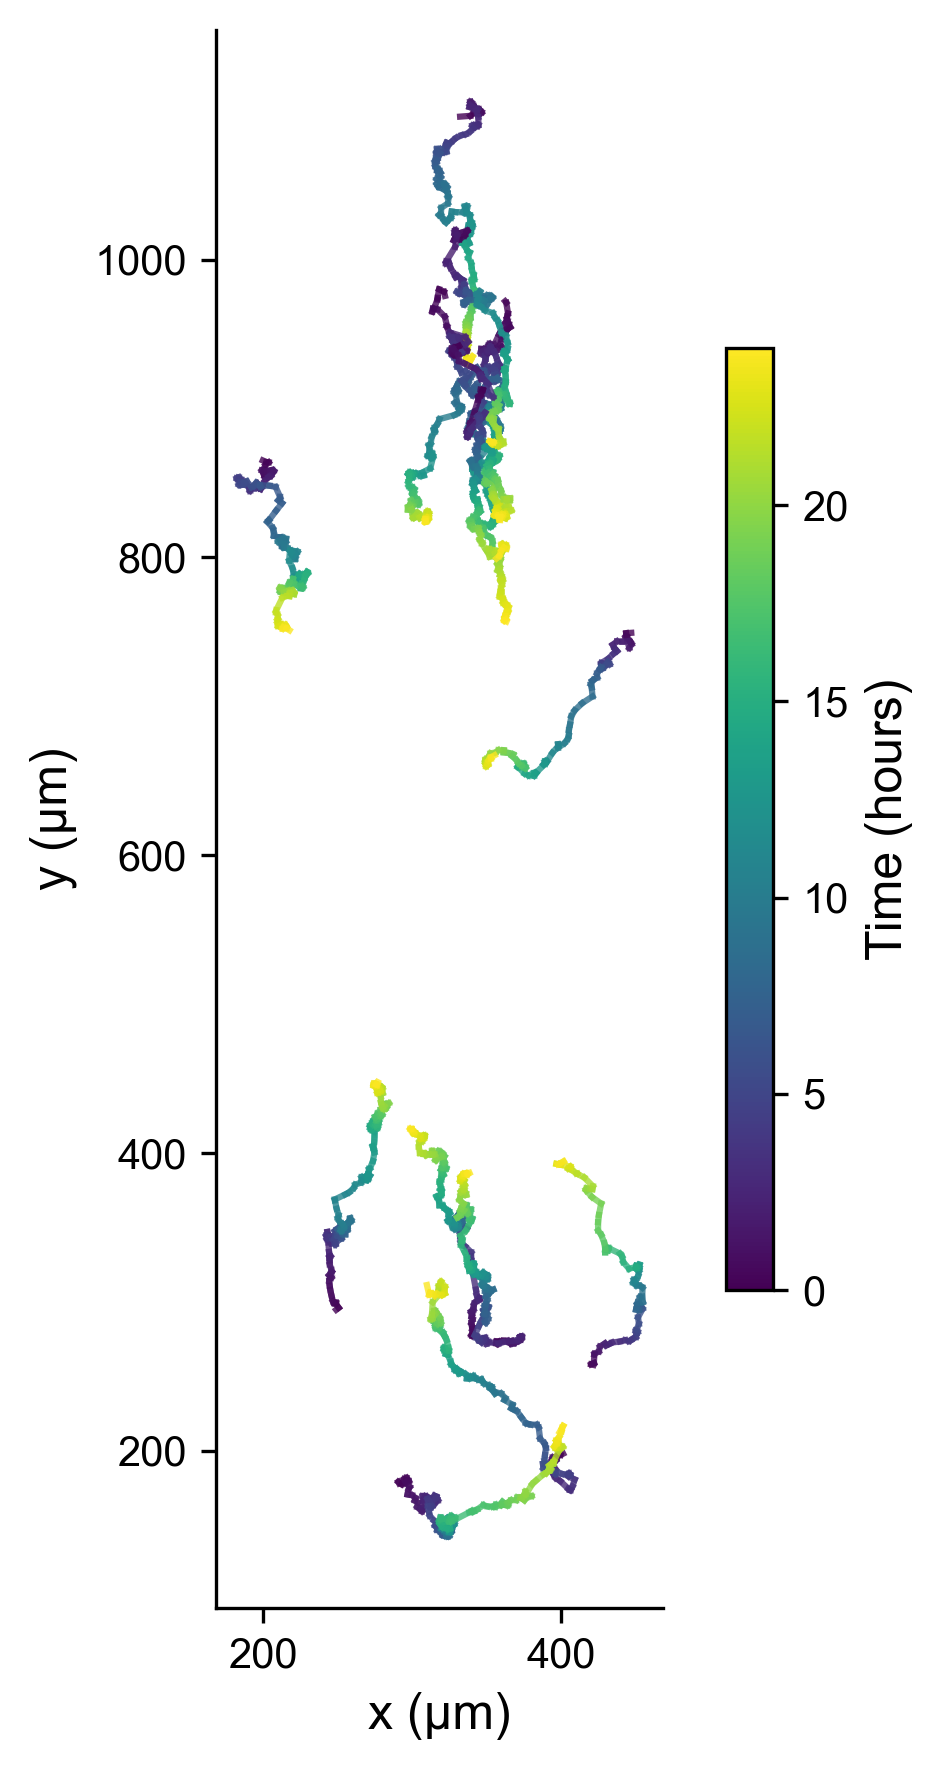

In [ ]:
dataset = tracks_dataset["btrack_tracks_df_2024_09_09"]

# Calculate displacement for each track
dataset['displacement'] = np.sqrt(
    (dataset['x_microns'] - dataset.groupby('track_id')['x_microns'].transform('first'))**2 +
    (dataset['y_microns'] - dataset.groupby('track_id')['y_microns'].transform('first'))**2
)

# Get 15 longest tracks by displacement
longest_tracks = dataset.groupby('track_id')['displacement'].max().nlargest(15).index.tolist()

# Find maximum track duration for normalization
max_duration_hours = 0
for track_id in longest_tracks:
    track_df = dataset[dataset['track_id'] == track_id].sort_values('t')
    duration_hours = (len(track_df) - 1) * 5 / 60  # Convert steps to hours
    max_duration_hours = max(max_duration_hours, duration_hours)

# Create publication-quality plot
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

for track_id in longest_tracks:
    track_df = dataset[dataset['track_id'] == track_id].sort_values('t')
    n_steps = len(track_df)
    
    # Create normalized time array (0 to 1)
    time_normalized = np.linspace(0, 1, n_steps)
    colors = plt.cm.viridis(time_normalized)
    
    # Plot track segments
    for i in range(n_steps - 1):
        ax.plot(track_df['x_microns'].iloc[i:i+2], 
                track_df['y_microns'].iloc[i:i+2],
                color=colors[i], linewidth=1.5, alpha=0.8)
    
    # Mark start and end points (only label once)
    # if track_id == longest_tracks[0]:
    #     ax.plot(track_df['x_microns'].iloc[0], track_df['y_microns'].iloc[0], 
    #             'o', color='green', markersize=6, label='Start', zorder=10)
    #     ax.plot(track_df['x_microns'].iloc[-1], track_df['y_microns'].iloc[-1], 
    #             'o', color='red', markersize=6, label='End', zorder=10)
    # else:
    #     ax.plot(track_df['x_microns'].iloc[0], track_df['y_microns'].iloc[0], 
    #             'o', color='green', markersize=6, zorder=10)
    #     ax.plot(track_df['x_microns'].iloc[-1], track_df['y_microns'].iloc[-1], 
    #             'o', color='red', markersize=6, zorder=10)

# Add colorbar with time in hours
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=max_duration_hours))
cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Time (hours)', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Format axes
ax.set_xlabel('x (μm)', fontsize=12)
ax.set_ylabel('y (μm)', fontsize=12)
ax.tick_params(labelsize=10)
ax.set_aspect('equal', adjustable='box')
# ax.legend(fontsize=10, frameon=True, loc='best', edgecolor='black', fancybox=False, framealpha=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()